# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Arthur Matos
- Brian Pina
- Gabriel Sabanai
- Guilherme Marques
- Luiz Henrique Zamprogno
- Luiz Pettengill
- Matheus Blanco
- Pedro Féo
- Saleh Kader
- Victor Buendia


### LIBRARIES

In [228]:
# Deal with data
import pandas as pd
import numpy as np
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from random import randint

### GRAPH SETTINGS

In [229]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [230]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

In [231]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [232]:
repos_language

{'Eccoar_Complaint': 'ts',
 'eccoar_frontend': 'ts',
 'Eccoar_Gateway': 'ts',
 'Eccoar_Mailer': 'ts',
 'Eccoar_Reports': 'ts',
 'Eccoar_Users': 'ts'}

##### Path to the folder with all your jsons

In [233]:
jsons = glob('**/*.json') # add the path here
jsons

['users/fga-eps-mds-2020_2-Eccoar_Users-08-05-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-23-03-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-03-05-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-10-05-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-23-04-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-17-05-2021-00:00.json',
 'users/fga-eps-mds-2020_2-Eccoar_Users-12-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-17-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-17-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-23-03-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-27-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-21-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-26-04-2021-00:00.json',
 'front/fga-eps-mds-2020_2-eccoar_frontend-12-04-2021-00:00.json',
 'front/fga-eps-

In [234]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [235]:
base_component_df = create_base_component_df(jsons)

In [236]:
base_component_df.head(10)

metric value bestValue  \
371  duplicated_lines_density   0.0      True   
372                 functions    42       NaN   
373       test_execution_time    70       NaN   
374           security_rating   1.0      True   
375                     tests    21       NaN   
376                     files    19       NaN   
377                complexity    60       NaN   
378                     ncloc   626       NaN   
379                  coverage  68.2     False   
380        reliability_rating   1.0      True   

                                              filename        repository  \
371  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
372  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
373  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
374  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
375  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
376  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
377  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
378  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
379  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   
380  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...  Eccoar_Complaint   

              version  
371  01-05-2021-00:00  
372  01-05-2021-00:00  
373  01-05-2021-00:00  
374  01-05-2021-00:00  
375  01-05-2021-00:00  
376  01-05-2021-00:00  
377  01-05-2021-00:00  
378  01-05-2021-00:00  
379  01-05-2021-00:00  
380  01-05-2021-00:00

#### Create dataframe per file

In [237]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [238]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [239]:
file_component_df = create_file_df(jsons)

In [240]:
file_component_df.head(10)

path functions complexity  \
499  src/migration/1618526567509-CreateComplaint.ts         2          2   
500       src/migration/1618529825437-CreateVote.ts         2          2   
501                           src/utils/Category.ts         0          0   
502                         src/entity/Complaint.ts         0          0   
503         src/repositories/ComplaintRepository.ts         7          7   
504                    src/utils/ComplaintUpvote.ts         1          3   
505                      src/utils/ComplaintVote.ts         0          0   
506             src/utils/ComplaintVoteConfirmed.ts         1          3   
507                  src/utils/ComplaintWithVote.ts         0          0   
508          src/controllers/ControllerComplaint.ts        13         24   

    comment_lines_density duplicated_lines_density coverage ncloc  \
499                   0.0                      0.0      0.0    76   
500                   0.0                      0.0      0.0    38   
501                   0.0                      0.0    100.0     5   
502                   0.0                      0.0    100.0    36   
503                   0.0                      0.0     61.3    80   
504                   0.0                      0.0     63.6    16   
505                   0.0                      0.0      NaN     9   
506                   0.0                      0.0     92.3    18   
507                   0.0                      0.0      NaN    18   
508                   0.0                      0.0     90.3   170   

    security_rating tests test_success_density test_execution_time  \
499             1.0   NaN                100.0                 NaN   
500             1.0   NaN                100.0                 NaN   
501             1.0   NaN                100.0                 NaN   
502             1.0   NaN                100.0                 NaN   
503             1.0   NaN                100.0                 NaN   
504             1.0   NaN                100.0                 NaN   
505             1.0   NaN                100.0                 NaN   
506             1.0   NaN                100.0                 NaN   
507             1.0   NaN                100.0                 NaN   
508             1.0   NaN                100.0                 NaN   

    reliability_rating                                           filename  \
499                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
500                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
501                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
502                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
503                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
504                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
505                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
506                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
507                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   
508                1.0  fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...   

           repository           version  
499  Eccoar_Complaint  01-05-2021-00:00  
500  Eccoar_Complaint  01-05-2021-00:00  
501  Eccoar_Complaint  01-05-2021-00:00  
502  Eccoar_Complaint  01-05-2021-00:00  
503  Eccoar_Complaint  01-05-2021-00:00  
504  Eccoar_Complaint  01-05-2021-00:00  
505  Eccoar_Complaint  01-05-2021-00:00  
506  Eccoar_Complaint  01-05-2021-00:00  
507  Eccoar_Complaint  01-05-2021-00:00  
508  Eccoar_Complaint  01-05-2021-00:00

In [241]:
file_component_df.to_excel('data/data.xlsx', index = False)

In [242]:
file_component_df.repository.unique()

array(['Eccoar_Complaint', 'Eccoar_Gateway', 'Eccoar_Mailer',
       'Eccoar_Reports', 'Eccoar_Users', 'eccoar_frontend'], dtype=object)

#### Create dataframe per repository

In [243]:
repository_dataframes = {} 

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df
    
repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [244]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']
...

Ellipsis

In [245]:
repository_dataframes["Eccoar_Complaint"]

path functions complexity  \
499  src/migration/1618526567509-CreateComplaint.ts         2          2   
500       src/migration/1618529825437-CreateVote.ts         2          2   
501                           src/utils/Category.ts         0          0   
502                         src/entity/Complaint.ts         0          0   
503         src/repositories/ComplaintRepository.ts         7          7   
504                    src/utils/ComplaintUpvote.ts         1          3   
505                      src/utils/ComplaintVote.ts         0          0   
506             src/utils/ComplaintVoteConfirmed.ts         1          3   
507                  src/utils/ComplaintWithVote.ts         0          0   
508          src/controllers/ControllerComplaint.ts        13         24   
509                                       src/db.ts         3          5   
510                                   src/routes.ts         7          7   
511                       src/services/S3Service.ts         2          2   
512                             src/utils/sentry.ts         0          0   
513                                   src/server.ts         1          2   
514                             src/utils/Status.ts         0          0   
515                             src/entity/Votes.ts         0          0   
516             src/repositories/VotesRepository.ts         3          3   
517                           src/utils/VoteType.ts         0          0   
533  src/migration/1618526567509-CreateComplaint.ts         2          2   
534       src/migration/1618529825437-CreateVote.ts         2          2   
535                           src/utils/Category.ts         0          0   
536                         src/entity/Complaint.ts         0          0   
537         src/repositories/ComplaintRepository.ts         7          7   
538                    src/utils/ComplaintUpvote.ts         1          3   
539                      src/utils/ComplaintVote.ts         0          0   
540             src/utils/ComplaintVoteConfirmed.ts         1          3   
541                  src/utils/ComplaintWithVote.ts         0          0   
542          src/controllers/ControllerComplaint.ts        13         24   
543                                       src/db.ts         3          5   
544                                   src/routes.ts         7          7   
545                       src/services/S3Service.ts         2          2   
546                             src/utils/sentry.ts         0          0   
547                                   src/server.ts         1          2   
548                             src/utils/Status.ts         0          0   
549                             src/entity/Votes.ts         0          0   
550             src/repositories/VotesRepository.ts         3          3   
551                           src/utils/VoteType.ts         0          0   
464  src/migration/1618526567509-CreateComplaint.ts         2          2   
465       src/migration/1618529825437-CreateVote.ts         2          2   
466    src/migration/1620151058075-DeleteCascade.ts         2          2   
467                           src/utils/Category.ts         0          0   
468                         src/entity/Complaint.ts         2          2   
469         src/repositories/ComplaintRepository.ts         8          8   
470                    src/utils/ComplaintUpvote.ts         1          3   
471                      src/utils/ComplaintVote.ts         0          0   
472             src/utils/ComplaintVoteConfirmed.ts         1          3   
473                  src/utils/ComplaintWithVote.ts         0          0   
474          src/controllers/ControllerComplaint.ts        14         26   
475                                       src/db.ts         3          5   
476                                   src/routes.ts         8          8   
477                       src/services/S3Service.ts         2          2   
478                

### Metric calculations

##### COMPLEXITY

In [246]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [247]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [248]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

### NCLOC

In [249]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)
    
    return ncloc

##### PRODUCTIVITY

#### RESOLVED ISSUES' THROUGHPUT

In [250]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

#### ISSUE TYPE IN A TIMEFRAME

In [251]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [252]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }
    
    soma = 0
    
    for i in issue_densities:
        soma += issue_densities[i][0]
    
    issue_density = soma/12.0
    
    return issue_density
    

#### BUGS RATIO

In [253]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [254]:
TAGS = {
    'HOTFIX': 15,
    'DOCS': 121,
    'FEATURE': 32,
    'ARQ': 15,
    'DEVOPS': 12,
    'ANALYTICS': 23,
    'US': 19,
    'EASY': 28,
    'MEDIUM': 22,
    'HARD': 7,
    'EPS': 61,
    'MDS': 41
}
NUMBER_OF_ISSUES_RESOLVED=201
NUMBER_OF_ISSUES=236

In [255]:
df = pd.read_csv('result.csv')

In [256]:
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

85.17

In [257]:
m8(TAGS, NUMBER_OF_ISSUES)

13.983333333333333

In [258]:
m9(TAGS, NUMBER_OF_ISSUES)

86.02

### Calculate m1, m2, m3, m7, m8, m9 for each repository

In [259]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m7_list = []
    m9_list = []
    repository_list = []
    version_list = []
    ncloc_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m7_list.append(m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES))
        m9_list.append(m9(TAGS, NUMBER_OF_ISSUES))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        ncloc_list.append(_ncloc(version_df))
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list, 
                               'm7': m7_list,
                               'm9': m9_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list
                              })
    
    metrics_df.to_csv('result.csv')
        
    return metrics_df

In [260]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():   
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [261]:
eccoar_gateway_metrics = create_metrics_df(eccoar_gateway_df)
eccoar_complaint_metrics = create_metrics_df(eccoar_complaint_df)
eccoar_frontend_metrics = create_metrics_df(eccoar_frontend_df)
eccoar_mailer_metrics = create_metrics_df(eccoar_mailer_df)
eccoar_reports_metrics = create_metrics_df(eccoar_reports_df)
eccoar_users_metrics = create_metrics_df(eccoar_users_df)
file_component_metrics = create_metrics_df(file_component_df)

In [296]:
def calculate_ac(df):
    df['asc1'] = (df['m1'] + df['m2'] + df['m3']) / 3
    df['ac1'] = df['asc1']
    df['TOTALac1'] = df['asc1']

    df['asc2'] = (df['m7'] + df['m9']) / 2
    df['ac2'] = df['asc2']
    df['TOTALac2'] = [ randint(0,10)  for k in df.index]
    return df

In [297]:
eccoar_gateway_metrics = calculate_ac(eccoar_gateway_metrics)
eccoar_complaint_metrics = calculate_ac(eccoar_complaint_metrics)
eccoar_frontend_metrics = calculate_ac(eccoar_frontend_metrics)
eccoar_mailer_metrics = calculate_ac(eccoar_mailer_metrics)
eccoar_reports_metrics = calculate_ac(eccoar_reports_metrics)
eccoar_users_metrics = calculate_ac(eccoar_users_metrics)
file_component_metrics = calculate_ac(file_component_metrics)

In [298]:
def plot_linear_regression(df):
    sns.regplot(x=df["TOTALac1"], y=df["TOTALac2"], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.show()

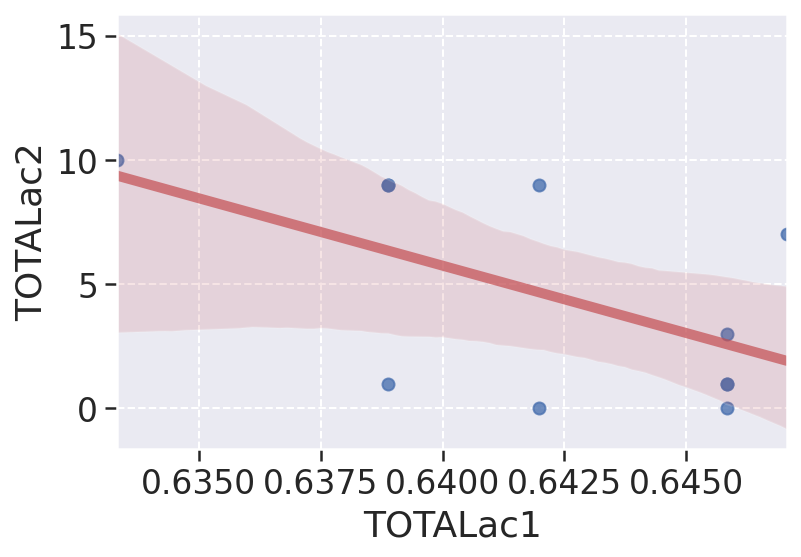

In [299]:
plot_linear_regression(eccoar_frontend_metrics)

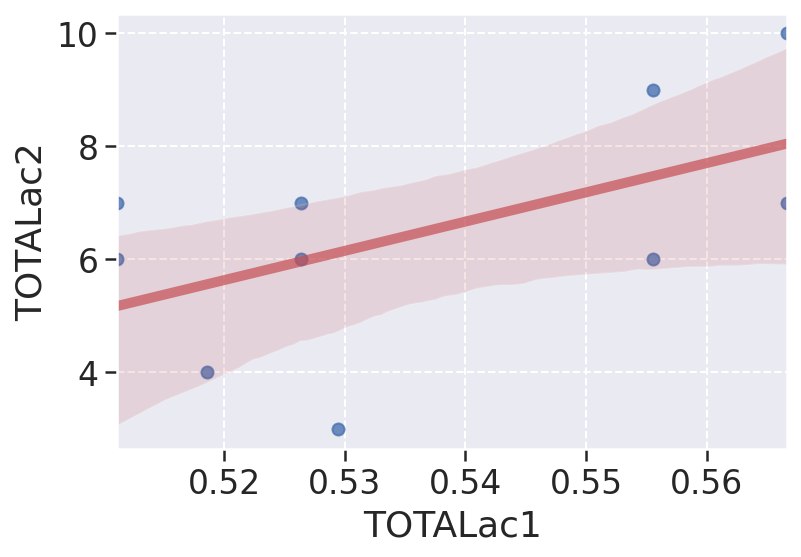

In [300]:
plot_linear_regression(eccoar_complaint_metrics)

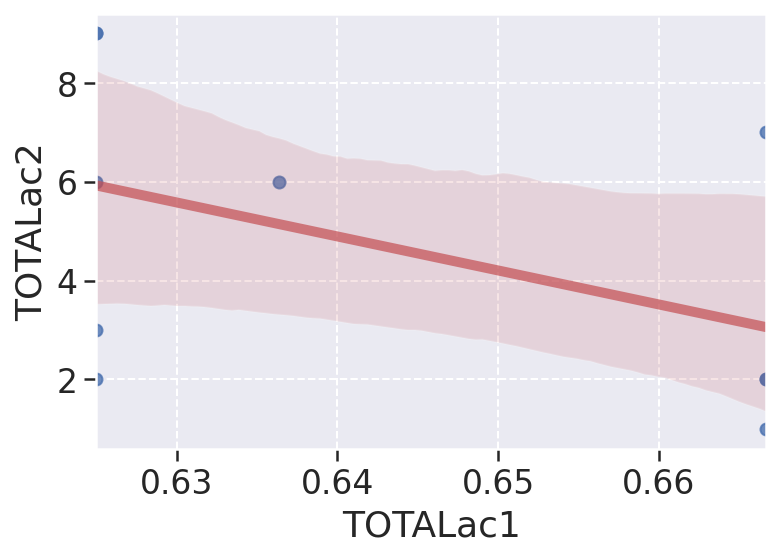

In [301]:
plot_linear_regression(eccoar_gateway_metrics)

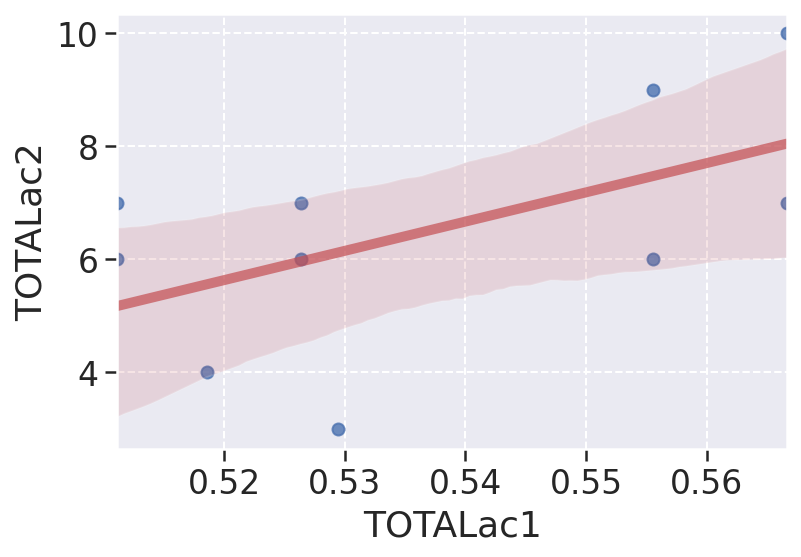

In [302]:
plot_linear_regression(eccoar_complaint_metrics)

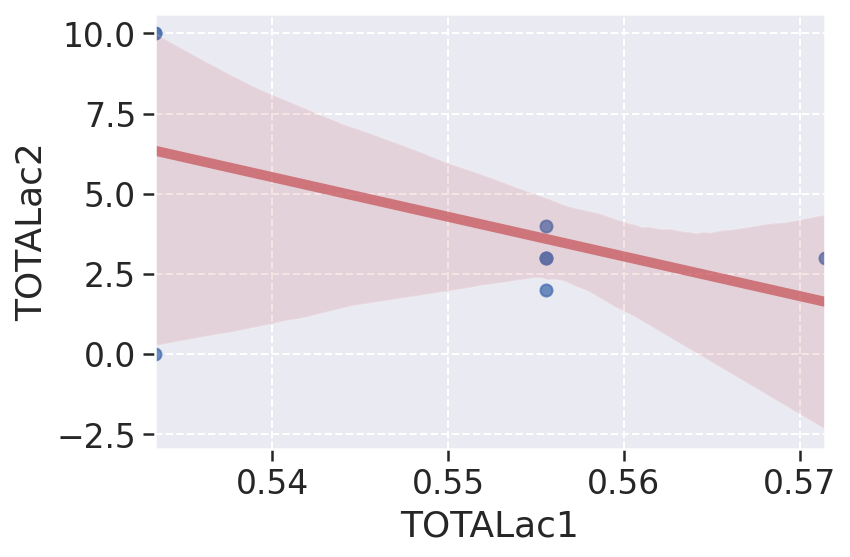

In [303]:
plot_linear_regression(eccoar_mailer_metrics)

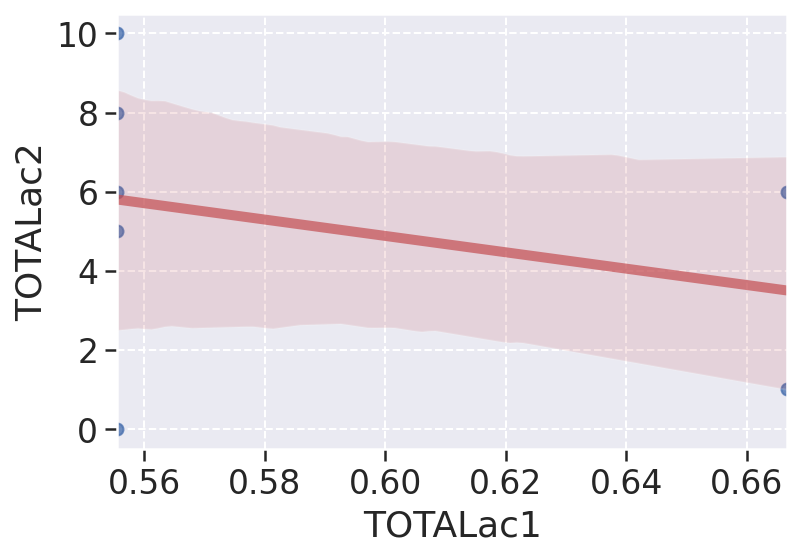

In [304]:
plot_linear_regression(eccoar_users_metrics)

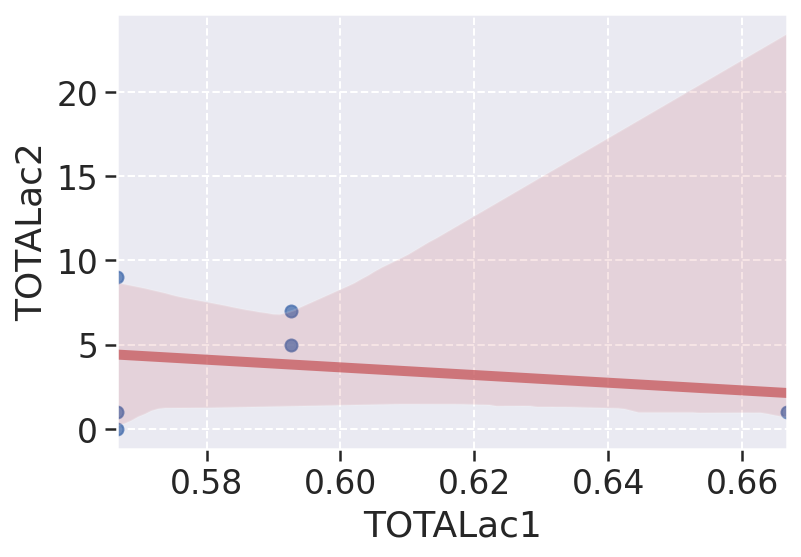

In [305]:
plot_linear_regression(eccoar_reports_metrics)

# Descriptive Statistic Analysis

- Realizes the calculation of statistic data such as mean, median, mode, min, max, standard deviation and variance.

In [266]:
def descriptive_statistics(df):
    
    metrics = df.describe()
    variance = df.var()
    variance_df = pd.DataFrame(variance, columns=["var"])
    variance_df = variance_df.T
    return metrics.append(variance_df).T

In [267]:
descriptive_statistics(eccoar_complaint_metrics)

count        mean           std         min         25%         50%  \
m1         10.0    0.610169  6.645293e-02    0.533333    0.561404    0.583591   
m2         10.0    0.000000  0.000000e+00    0.000000    0.000000    0.000000   
m3         10.0    1.000000  0.000000e+00    1.000000    1.000000    1.000000   
m7         10.0   85.170000  1.497956e-14   85.170000   85.170000   85.170000   
m9         10.0   86.020000  0.000000e+00   86.020000   86.020000   86.020000   
ncloc      10.0  577.100000  1.898242e+02  163.000000  479.500000  606.500000   
asc1       10.0    0.536723  2.215098e-02    0.511111    0.520468    0.527864   
ac1        10.0    0.536723  2.215098e-02    0.511111    0.520468    0.527864   
TOTALac1   10.0    0.536723  2.215098e-02    0.511111    0.520468    0.527864   
asc2       10.0   85.595000  0.000000e+00   85.595000   85.595000   85.595000   
ac2        10.0   85.595000  0.000000e+00   85.595000   85.595000   85.595000   
TOTALac2   10.0    4.600000  3.062316e+00    1.000000    2.000000    4.500000   

                 75%         max           var  
m1          0.666667    0.700000  4.415992e-03  
m2          0.000000    0.000000  0.000000e+00  
m3          1.000000    1.000000  0.000000e+00  
m7         85.170000   85.170000  2.243871e-28  
m9         86.020000   86.020000  0.000000e+00  
ncloc     689.750000  832.000000  3.603321e+04  
asc1        0.555556    0.566667  4.906657e-04  
ac1         0.555556    0.566667  4.906657e-04  
TOTALac1    0.555556    0.566667  4.906657e-04  
asc2       85.595000   85.595000  0.000000e+00  
ac2        85.595000   85.595000  0.000000e+00  
TOTALac2    5.750000   10.000000  9.377778e+00

In [268]:
descriptive_statistics(eccoar_gateway_metrics)

count        mean           std      min      25%         50%  \
m1         10.0    0.928409  6.248278e-02    0.875    0.875    0.892045   
m2         10.0    0.000000  0.000000e+00    0.000    0.000    0.000000   
m3         10.0    1.000000  0.000000e+00    1.000    1.000    1.000000   
m7         10.0   85.170000  1.497956e-14   85.170   85.170   85.170000   
m9         10.0   86.020000  0.000000e+00   86.020   86.020   86.020000   
ncloc      10.0  295.700000  9.455868e+01  110.000  258.750  305.000000   
asc1       10.0    0.642803  2.082759e-02    0.625    0.625    0.630682   
ac1        10.0    0.642803  2.082759e-02    0.625    0.625    0.630682   
TOTALac1   10.0    0.642803  2.082759e-02    0.625    0.625    0.630682   
asc2       10.0   85.595000  0.000000e+00   85.595   85.595   85.595000   
ac2        10.0   85.595000  0.000000e+00   85.595   85.595   85.595000   
TOTALac2   10.0    5.400000  2.913570e+00    1.000    4.250    5.000000   

                 75%         max           var  
m1          1.000000    1.000000  3.904098e-03  
m2          0.000000    0.000000  0.000000e+00  
m3          1.000000    1.000000  0.000000e+00  
m7         85.170000   85.170000  2.243871e-28  
m9         86.020000   86.020000  0.000000e+00  
ncloc     317.000000  494.000000  8.941344e+03  
asc1        0.666667    0.666667  4.337886e-04  
ac1         0.666667    0.666667  4.337886e-04  
TOTALac1    0.666667    0.666667  4.337886e-04  
asc2       85.595000   85.595000  0.000000e+00  
ac2        85.595000   85.595000  0.000000e+00  
TOTALac2    7.750000    9.000000  8.488889e+00

In [269]:
descriptive_statistics(eccoar_frontend_metrics)

count         mean           std         min          25%  \
m1         11.0     0.889958  1.951257e-02    0.850000     0.875000   
m2         11.0     0.036681  6.504189e-03    0.029412     0.031250   
m3         11.0     1.000000  0.000000e+00    1.000000     1.000000   
m7         11.0    85.170000  1.490447e-14   85.170000    85.170000   
m9         11.0    86.020000  0.000000e+00   86.020000    86.020000   
ncloc      11.0  1369.909091  3.820585e+02  657.000000  1100.000000   
asc1       11.0     0.642213  4.336126e-03    0.633333     0.638889   
ac1        11.0     0.642213  4.336126e-03    0.633333     0.638889   
TOTALac1   11.0     0.642213  4.336126e-03    0.633333     0.638889   
asc2       11.0    85.595000  1.490447e-14   85.595000    85.595000   
ac2        11.0    85.595000  1.490447e-14   85.595000    85.595000   
TOTALac2   11.0     4.090909  3.144982e+00    0.000000     1.500000   

                  50%          75%          max           var  
m1           0.888889     0.906250     0.911765  3.807403e-04  
m2           0.037037     0.041667     0.050000  4.230447e-05  
m3           1.000000     1.000000     1.000000  0.000000e+00  
m7          85.170000    85.170000    85.170000  2.221432e-28  
m9          86.020000    86.020000    86.020000  0.000000e+00  
ncloc     1280.000000  1618.000000  1996.000000  1.459687e+05  
asc1         0.641975     0.645833     0.647059  1.880199e-05  
ac1          0.641975     0.645833     0.647059  1.880199e-05  
TOTALac1     0.641975     0.645833     0.647059  1.880199e-05  
asc2        85.595000    85.595000    85.595000  2.221432e-28  
ac2         85.595000    85.595000    85.595000  2.221432e-28  
TOTALac2     3.000000     6.500000     9.000000  9.890909e+00

In [270]:
descriptive_statistics(eccoar_reports_metrics)

count        mean           std        min         25%         50%  \
m1          6.0    0.775926  1.161984e-01   0.700000    0.700000    0.738889   
m2          6.0    0.000000  0.000000e+00   0.000000    0.000000    0.000000   
m3          6.0    1.000000  0.000000e+00   1.000000    1.000000    1.000000   
m7          6.0   85.170000  0.000000e+00  85.170000   85.170000   85.170000   
m9          6.0   86.020000  0.000000e+00  86.020000   86.020000   86.020000   
ncloc       6.0  197.333333  8.365325e+01  28.000000  218.000000  229.000000   
asc1        6.0    0.591975  3.873278e-02   0.566667    0.566667    0.579630   
ac1         6.0    0.591975  3.873278e-02   0.566667    0.566667    0.579630   
TOTALac1    6.0    0.591975  3.873278e-02   0.566667    0.566667    0.579630   
asc2        6.0   85.595000  1.556721e-14  85.595000   85.595000   85.595000   
ac2         6.0   85.595000  1.556721e-14  85.595000   85.595000   85.595000   
TOTALac2    6.0    4.500000  3.885872e+00   0.000000    1.000000    5.000000   

                 75%         max           var  
m1          0.777778    1.000000  1.350206e-02  
m2          0.000000    0.000000  0.000000e+00  
m3          1.000000    1.000000  0.000000e+00  
m7         85.170000   85.170000  0.000000e+00  
m9         86.020000   86.020000  0.000000e+00  
ncloc     240.000000  240.000000  6.997867e+03  
asc1        0.592593    0.666667  1.500229e-03  
ac1         0.592593    0.666667  1.500229e-03  
TOTALac1    0.592593    0.666667  1.500229e-03  
asc2       85.595000   85.595000  2.423381e-28  
ac2        85.595000   85.595000  2.423381e-28  
TOTALac2    7.500000    9.000000  1.510000e+01

In [271]:
descriptive_statistics(eccoar_users_metrics)

count        mean           std         min         25%         50%  \
m1          7.0    0.761905  1.626500e-01    0.666667    0.666667    0.666667   
m2          7.0    0.000000  0.000000e+00    0.000000    0.000000    0.000000   
m3          7.0    1.000000  0.000000e+00    1.000000    1.000000    1.000000   
m7          7.0   85.170000  0.000000e+00   85.170000   85.170000   85.170000   
m9          7.0   86.020000  0.000000e+00   86.020000   86.020000   86.020000   
ncloc       7.0  193.428571  7.173529e+01  117.000000  148.500000  180.000000   
asc1        7.0    0.587302  5.421667e-02    0.555556    0.555556    0.555556   
ac1         7.0    0.587302  5.421667e-02    0.555556    0.555556    0.555556   
TOTALac1    7.0    0.587302  5.421667e-02    0.555556    0.555556    0.555556   
asc2        7.0   85.595000  1.534948e-14   85.595000   85.595000   85.595000   
ac2         7.0   85.595000  1.534948e-14   85.595000   85.595000   85.595000   
TOTALac2    7.0    5.285714  3.251373e+00    2.000000    2.500000    5.000000   

                 75%         max           var  
m1          0.833333    1.000000  2.645503e-02  
m2          0.000000    0.000000  0.000000e+00  
m3          1.000000    1.000000  0.000000e+00  
m7         85.170000   85.170000  0.000000e+00  
m9         86.020000   86.020000  0.000000e+00  
ncloc     235.000000  290.000000  5.145952e+03  
asc1        0.611111    0.666667  2.939447e-03  
ac1         0.611111    0.666667  2.939447e-03  
TOTALac1    0.611111    0.666667  2.939447e-03  
asc2       85.595000   85.595000  2.356065e-28  
ac2        85.595000   85.595000  2.356065e-28  
TOTALac2    7.500000   10.000000  1.057143e+01

In [272]:
descriptive_statistics(eccoar_mailer_metrics)

count        mean        std         min         25%         50%  \
m1          8.0    0.647619   0.042592    0.600000    0.600000    0.666667   
m2          8.0    0.000000   0.000000    0.000000    0.000000    0.000000   
m3          8.0    1.000000   0.000000    1.000000    1.000000    1.000000   
m7          8.0   85.170000   0.000000   85.170000   85.170000   85.170000   
m9          8.0   86.020000   0.000000   86.020000   86.020000   86.020000   
ncloc       8.0  203.625000  30.302935  132.000000  205.750000  208.000000   
asc1        8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
ac1         8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
TOTALac1    8.0    0.549206   0.014197    0.533333    0.533333    0.555556   
asc2        8.0   85.595000   0.000000   85.595000   85.595000   85.595000   
ac2         8.0   85.595000   0.000000   85.595000   85.595000   85.595000   
TOTALac2    8.0    5.000000   3.741657    0.000000    2.000000    4.500000   

                 75%         max         var  
m1          0.666667    0.714286    0.001814  
m2          0.000000    0.000000    0.000000  
m3          1.000000    1.000000    0.000000  
m7         85.170000   85.170000    0.000000  
m9         86.020000   86.020000    0.000000  
ncloc     224.000000  224.000000  918.267857  
asc1        0.555556    0.571429    0.000202  
ac1         0.555556    0.571429    0.000202  
TOTALac1    0.555556    0.571429    0.000202  
asc2       85.595000   85.595000    0.000000  
ac2        85.595000   85.595000    0.000000  
TOTALac2    8.250000   10.000000   14.000000

In [273]:
descriptive_statistics(file_component_metrics)

count         mean           std         min          25%  \
m1         15.0     0.784716  6.725945e-02    0.666667     0.750000   
m2         15.0     0.013631  1.070811e-02    0.000000     0.005263   
m3         15.0     1.000000  0.000000e+00    1.000000     1.000000   
m7         15.0    85.170000  0.000000e+00   85.170000    85.170000   
m9         15.0    86.020000  0.000000e+00   86.020000    86.020000   
ncloc      15.0  1864.266667  1.093455e+03  207.000000  1119.500000   
asc1       15.0     0.599449  2.470104e-02    0.555556     0.586418   
ac1        15.0     0.599449  2.470104e-02    0.555556     0.586418   
TOTALac1   15.0     0.599449  2.470104e-02    0.555556     0.586418   
asc2       15.0    85.595000  1.470963e-14   85.595000    85.595000   
ac2        15.0    85.595000  1.470963e-14   85.595000    85.595000   
TOTALac2   15.0     5.533333  3.502380e+00    0.000000     2.500000   

                  50%          75%          max           var  
m1           0.778947     0.836538     0.888889  4.523834e-03  
m2           0.014286     0.019231     0.037037  1.146636e-04  
m3           1.000000     1.000000     1.000000  0.000000e+00  
m7          85.170000    85.170000    85.170000  0.000000e+00  
m9          86.020000    86.020000    86.020000  0.000000e+00  
ncloc     1825.000000  2493.500000  4076.000000  1.195643e+06  
asc1         0.596491     0.618590     0.641975  6.101416e-04  
ac1          0.596491     0.618590     0.641975  6.101416e-04  
TOTALac1     0.596491     0.618590     0.641975  6.101416e-04  
asc2        85.595000    85.595000    85.595000  2.163733e-28  
ac2         85.595000    85.595000    85.595000  2.163733e-28  
TOTALac2     7.000000     8.000000    10.000000  1.226667e+01

### Data visualization

- You must do this for each of your repositories

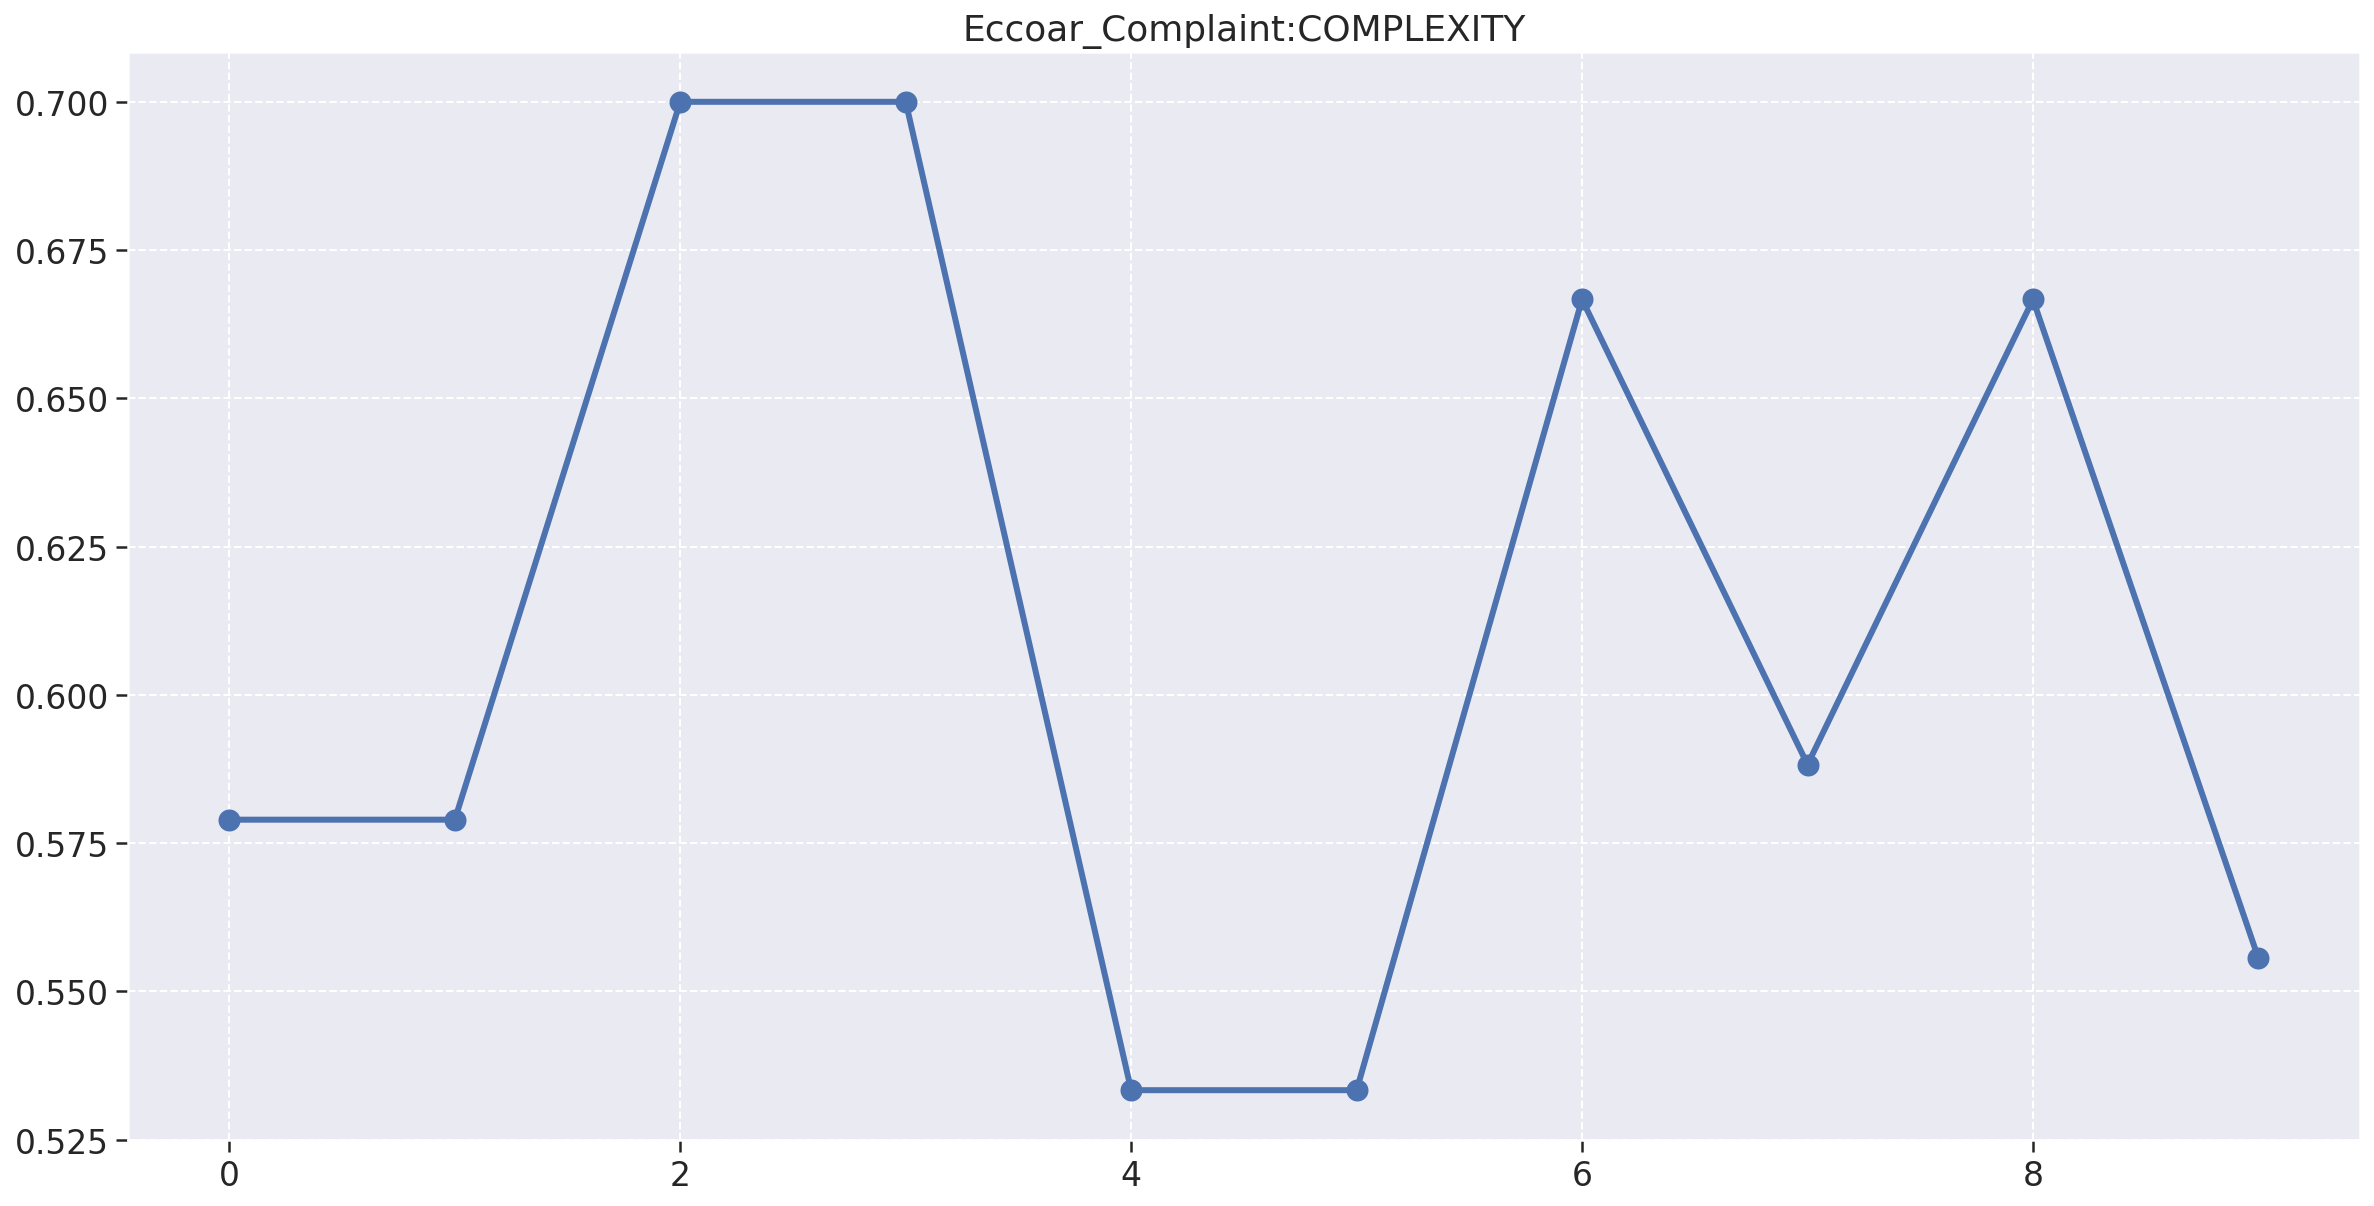

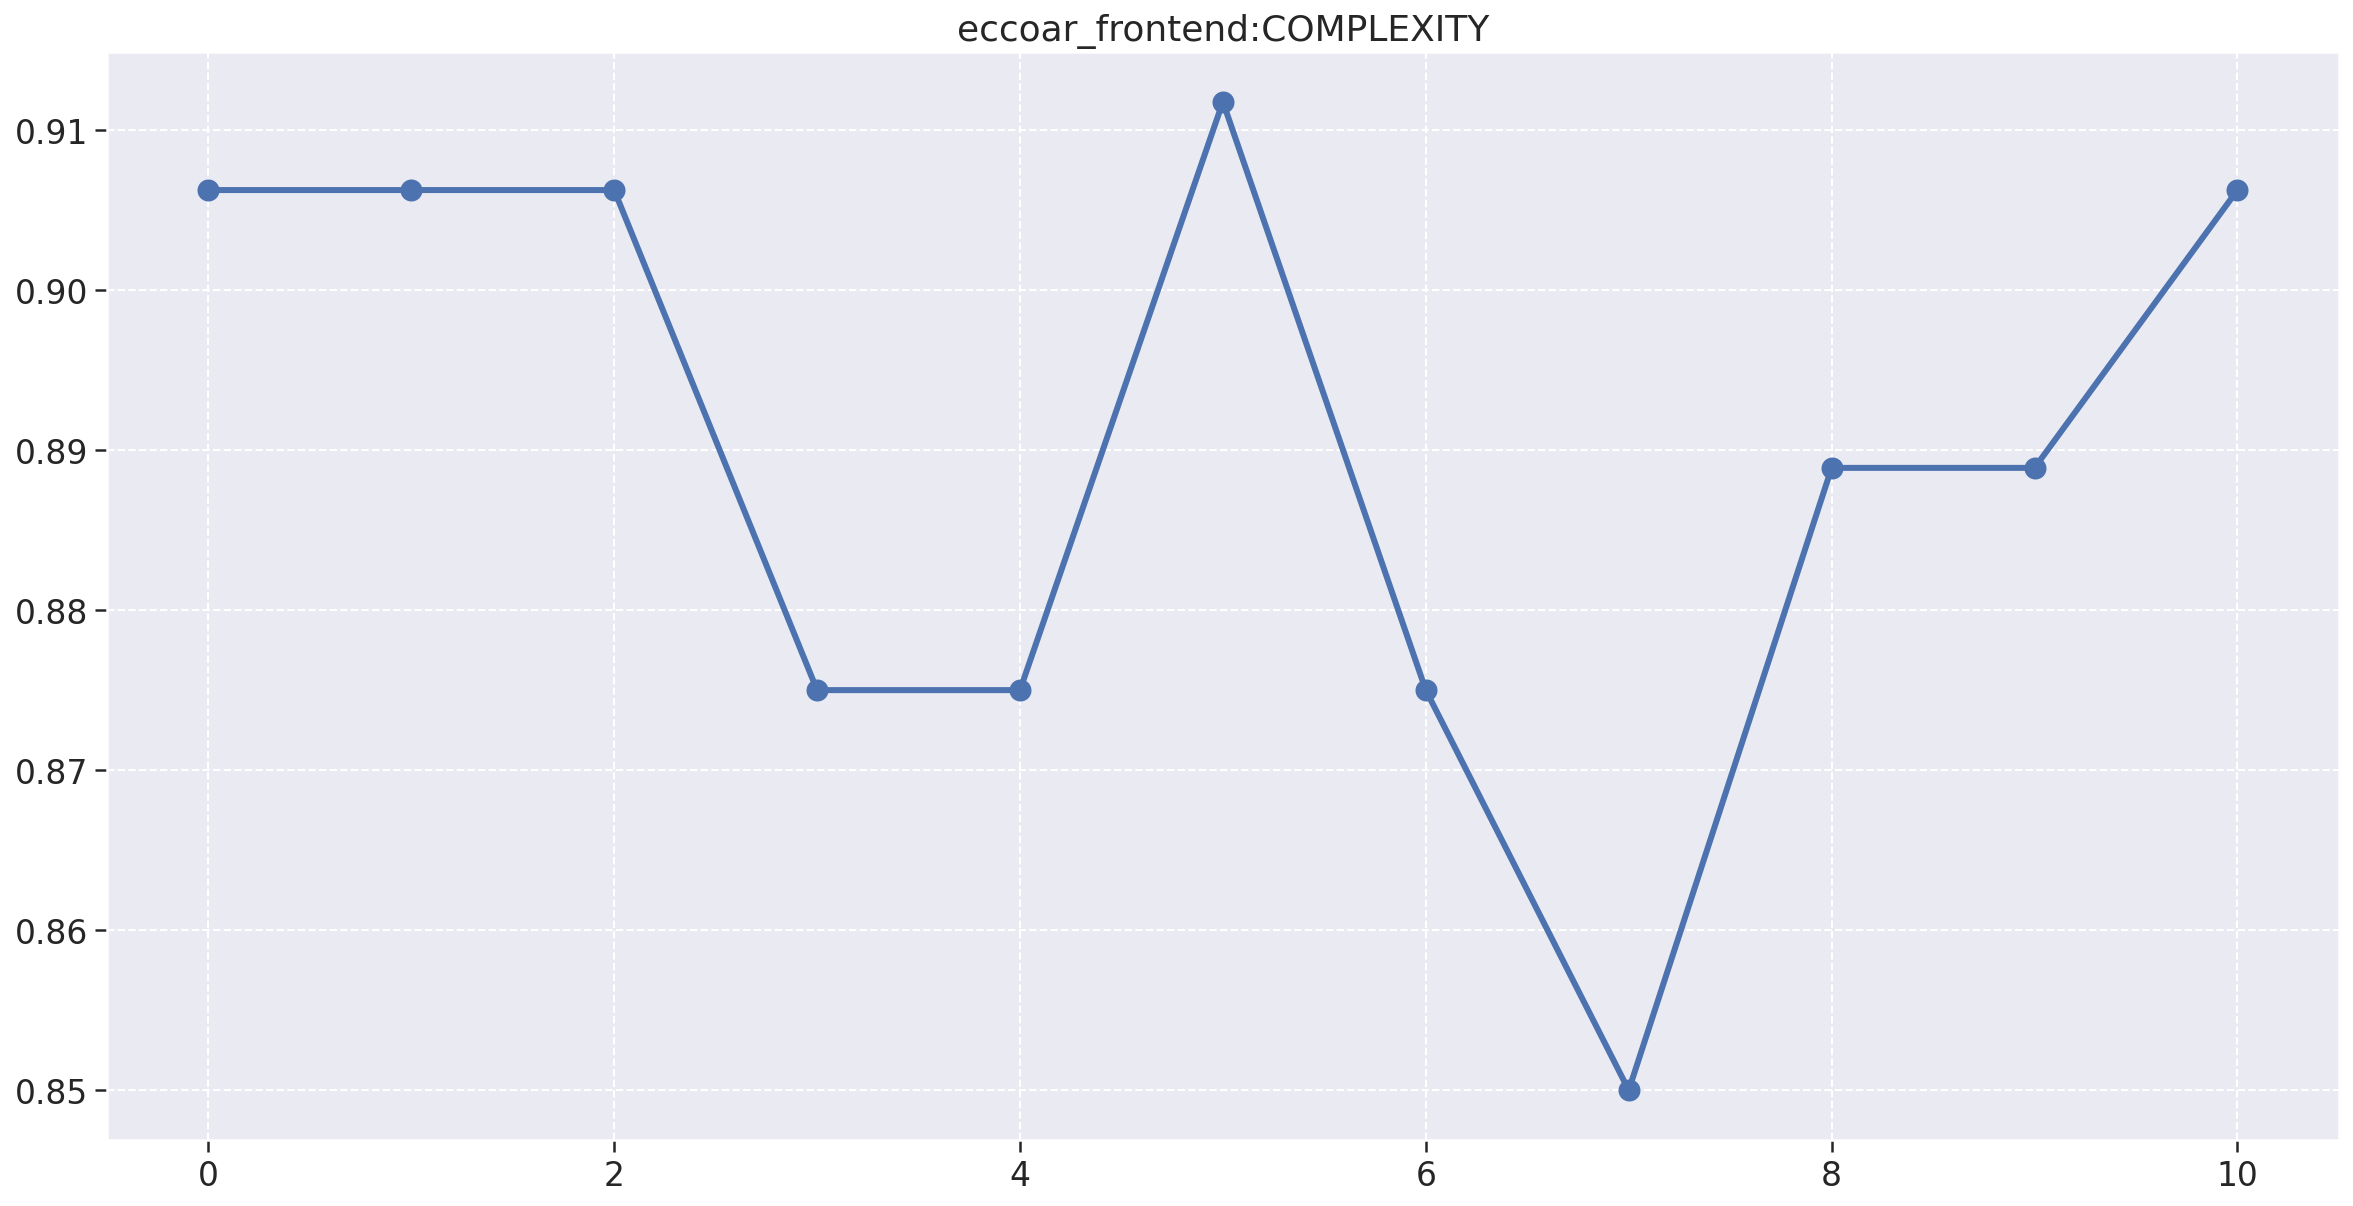

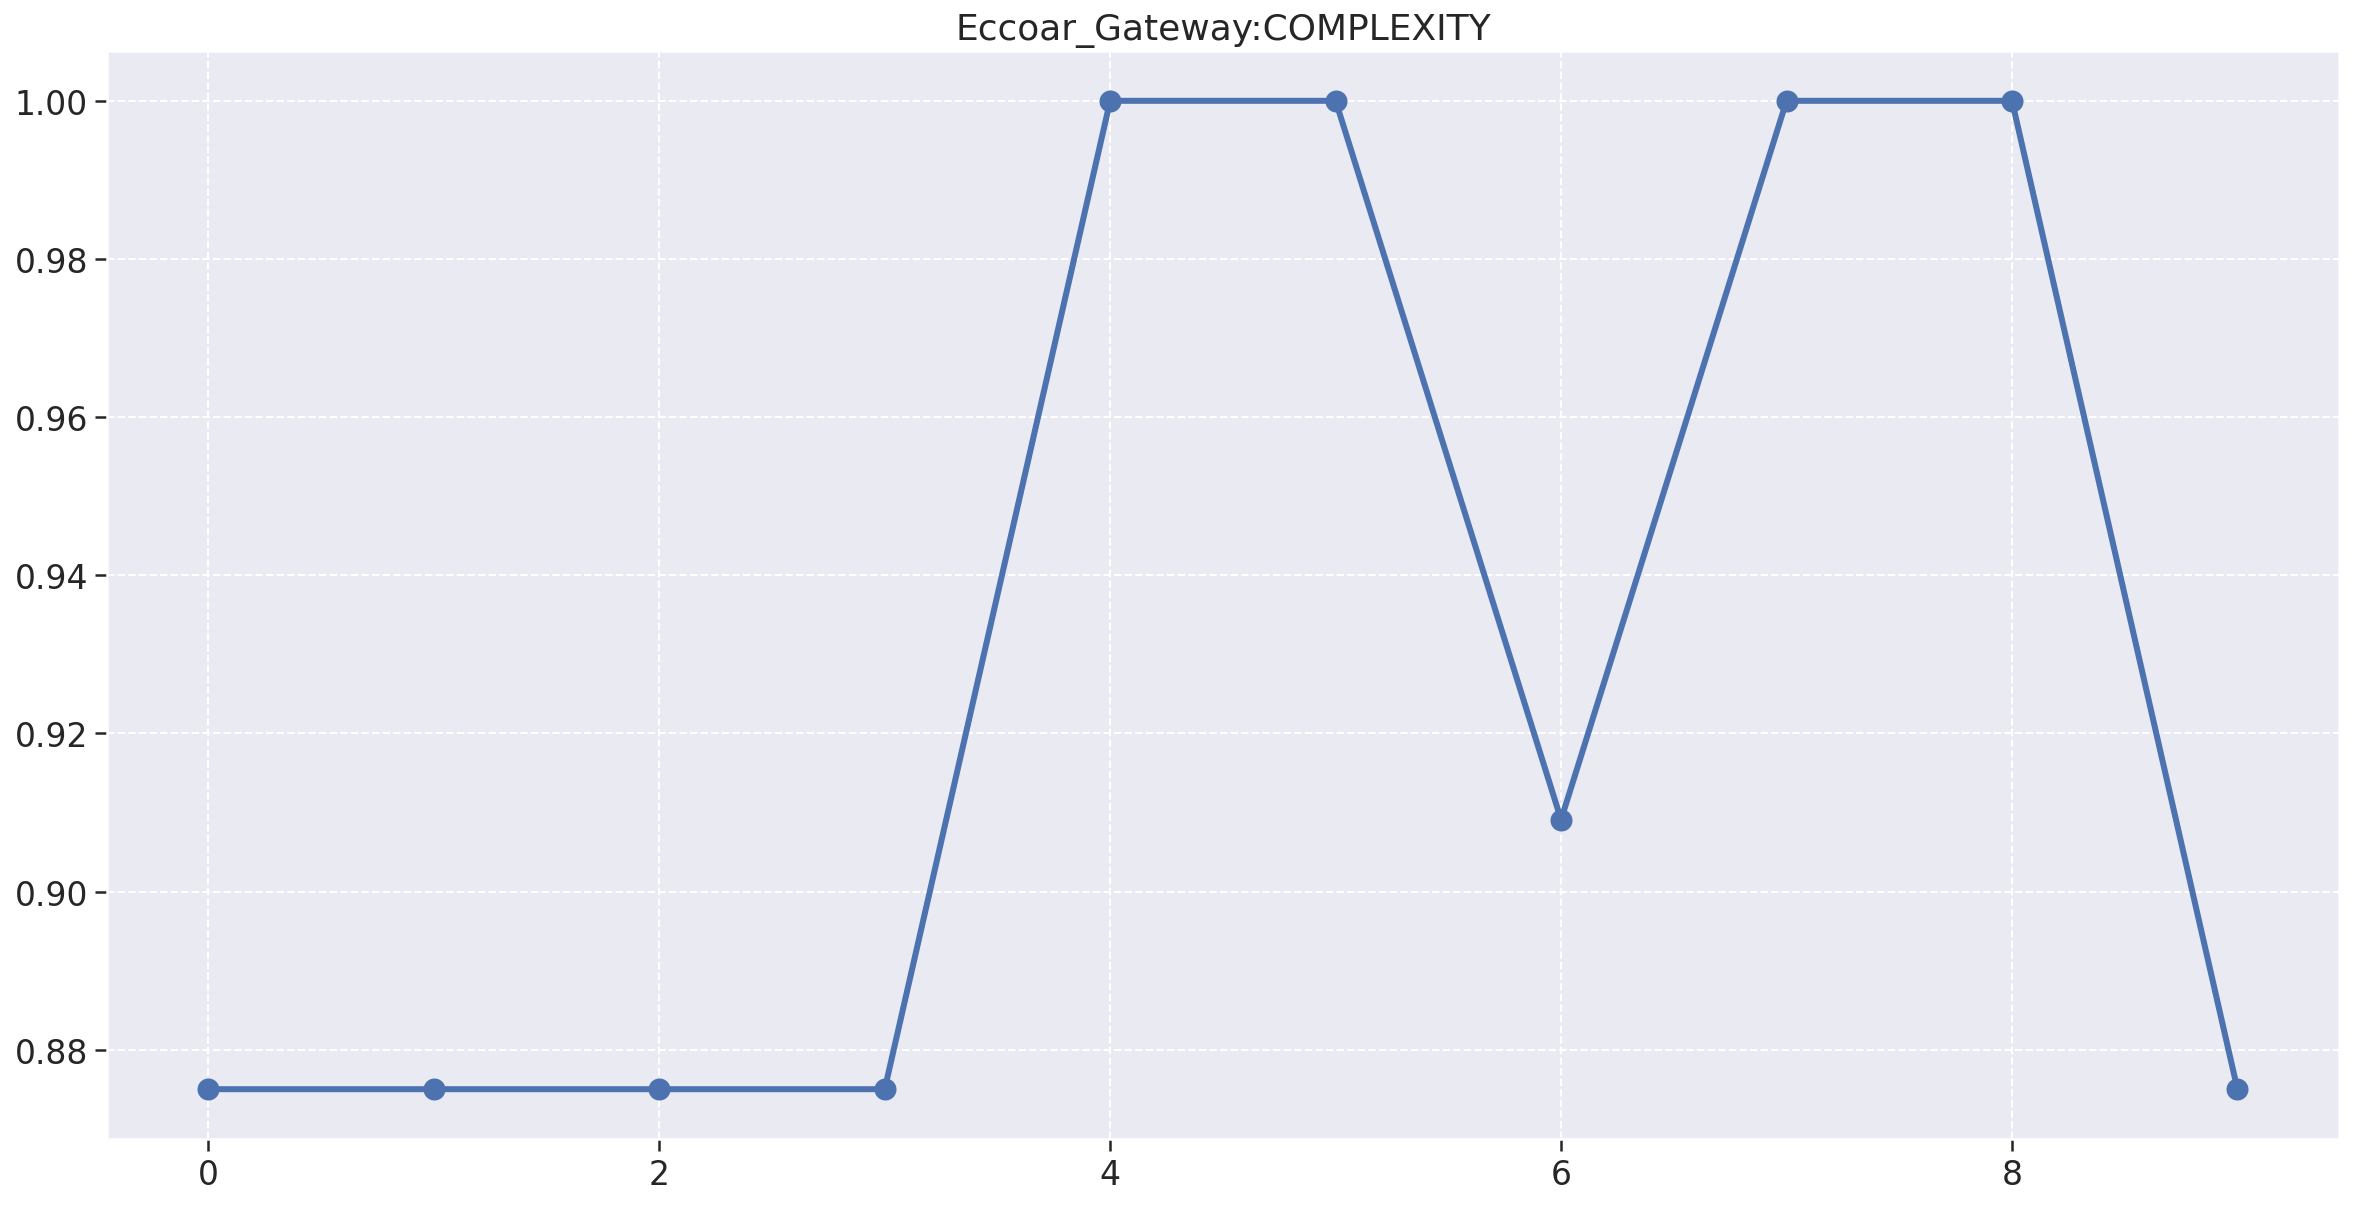

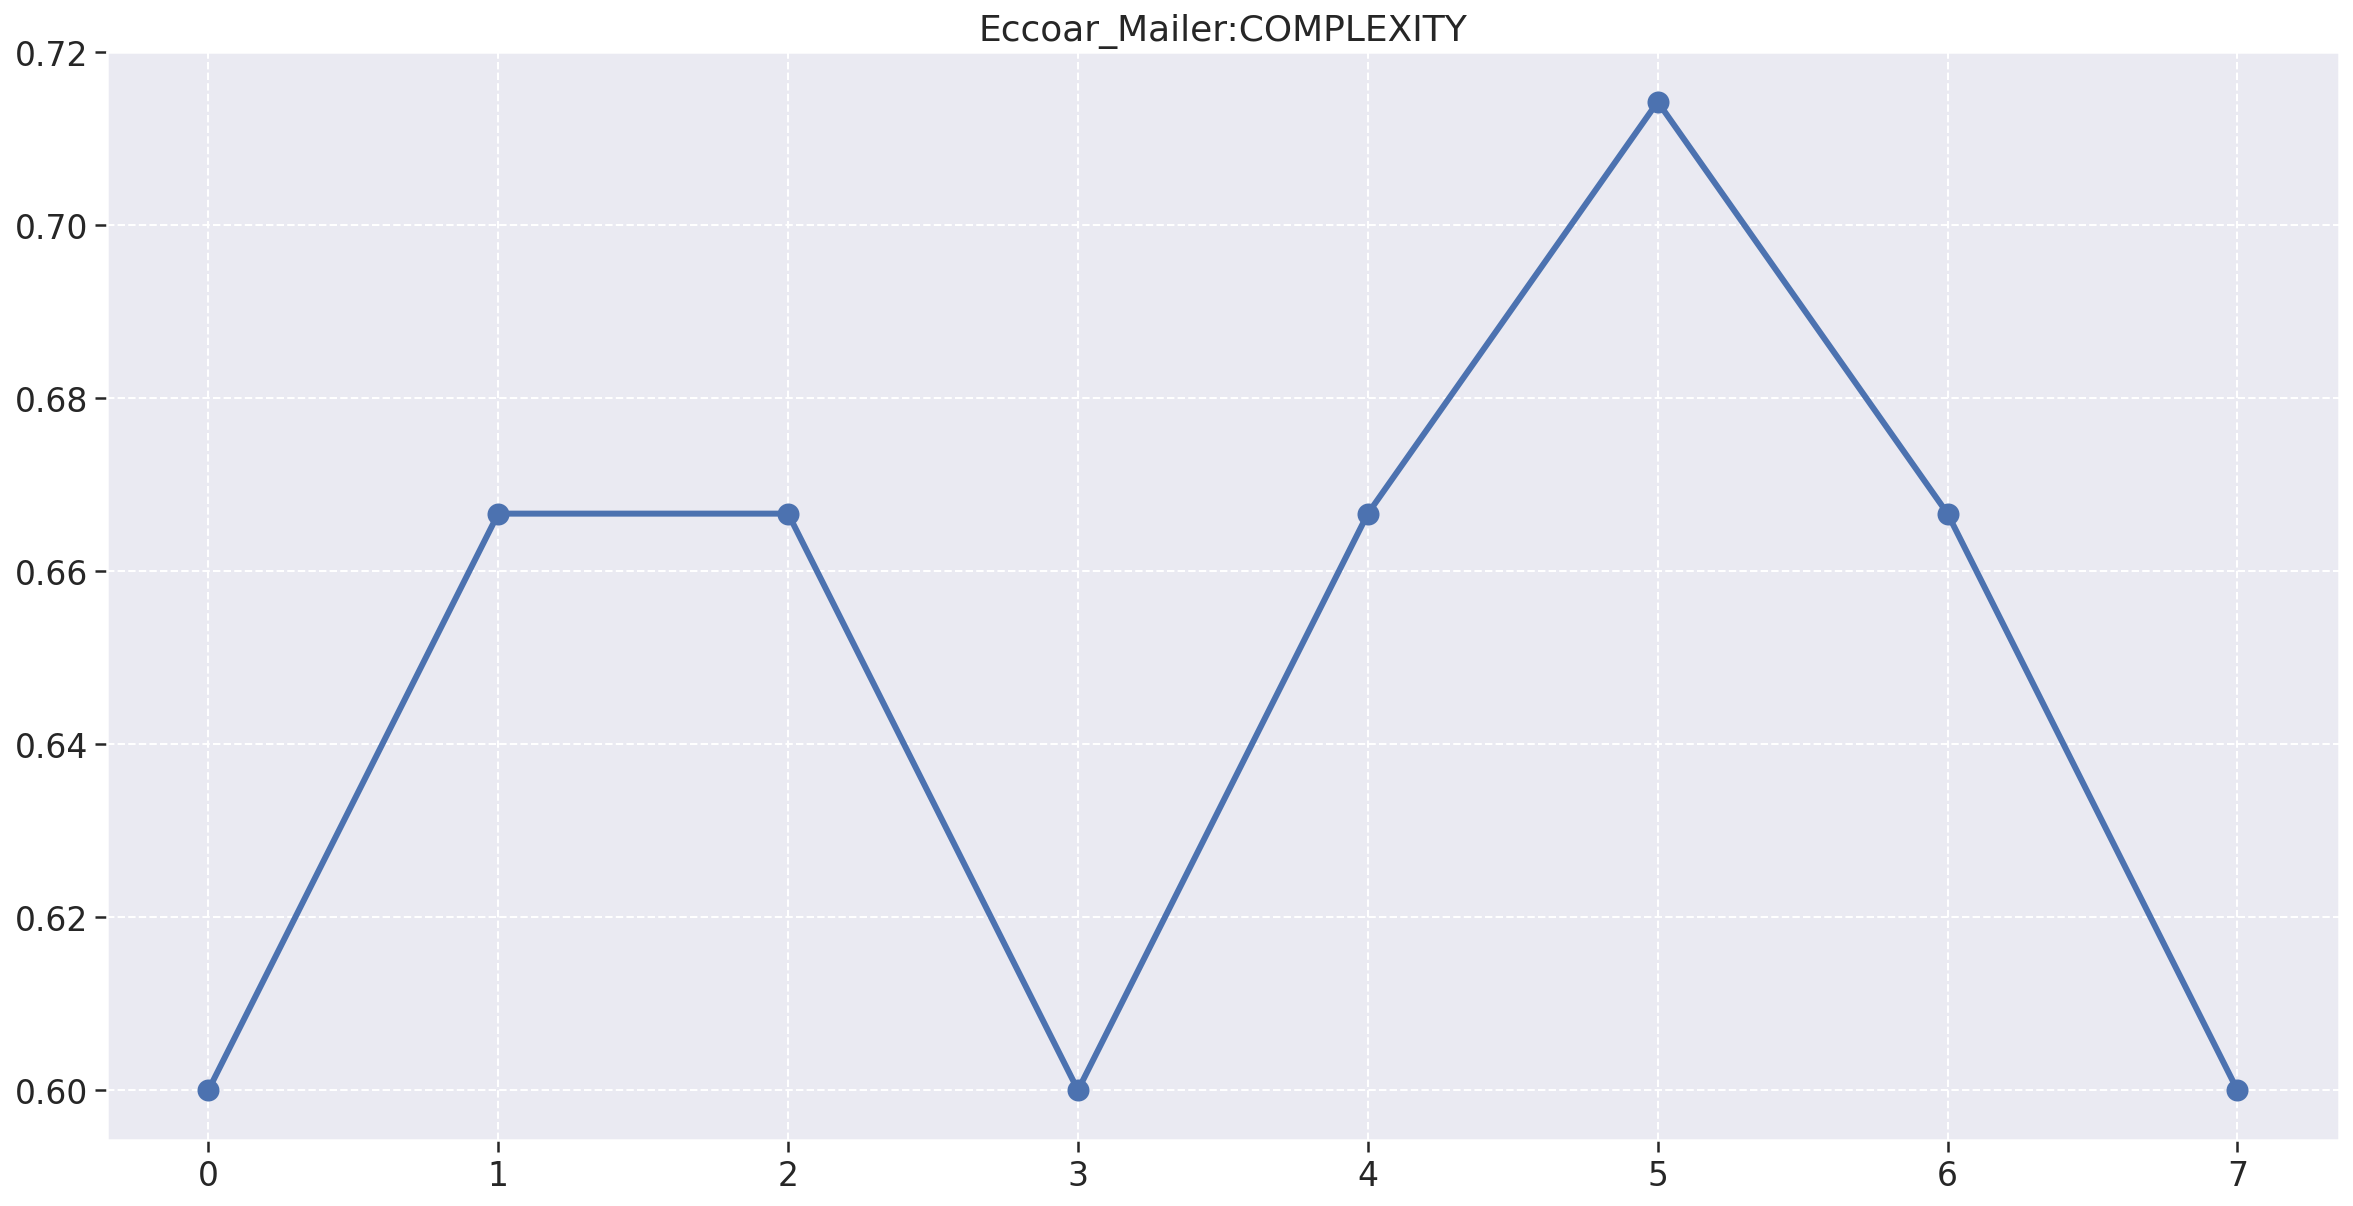

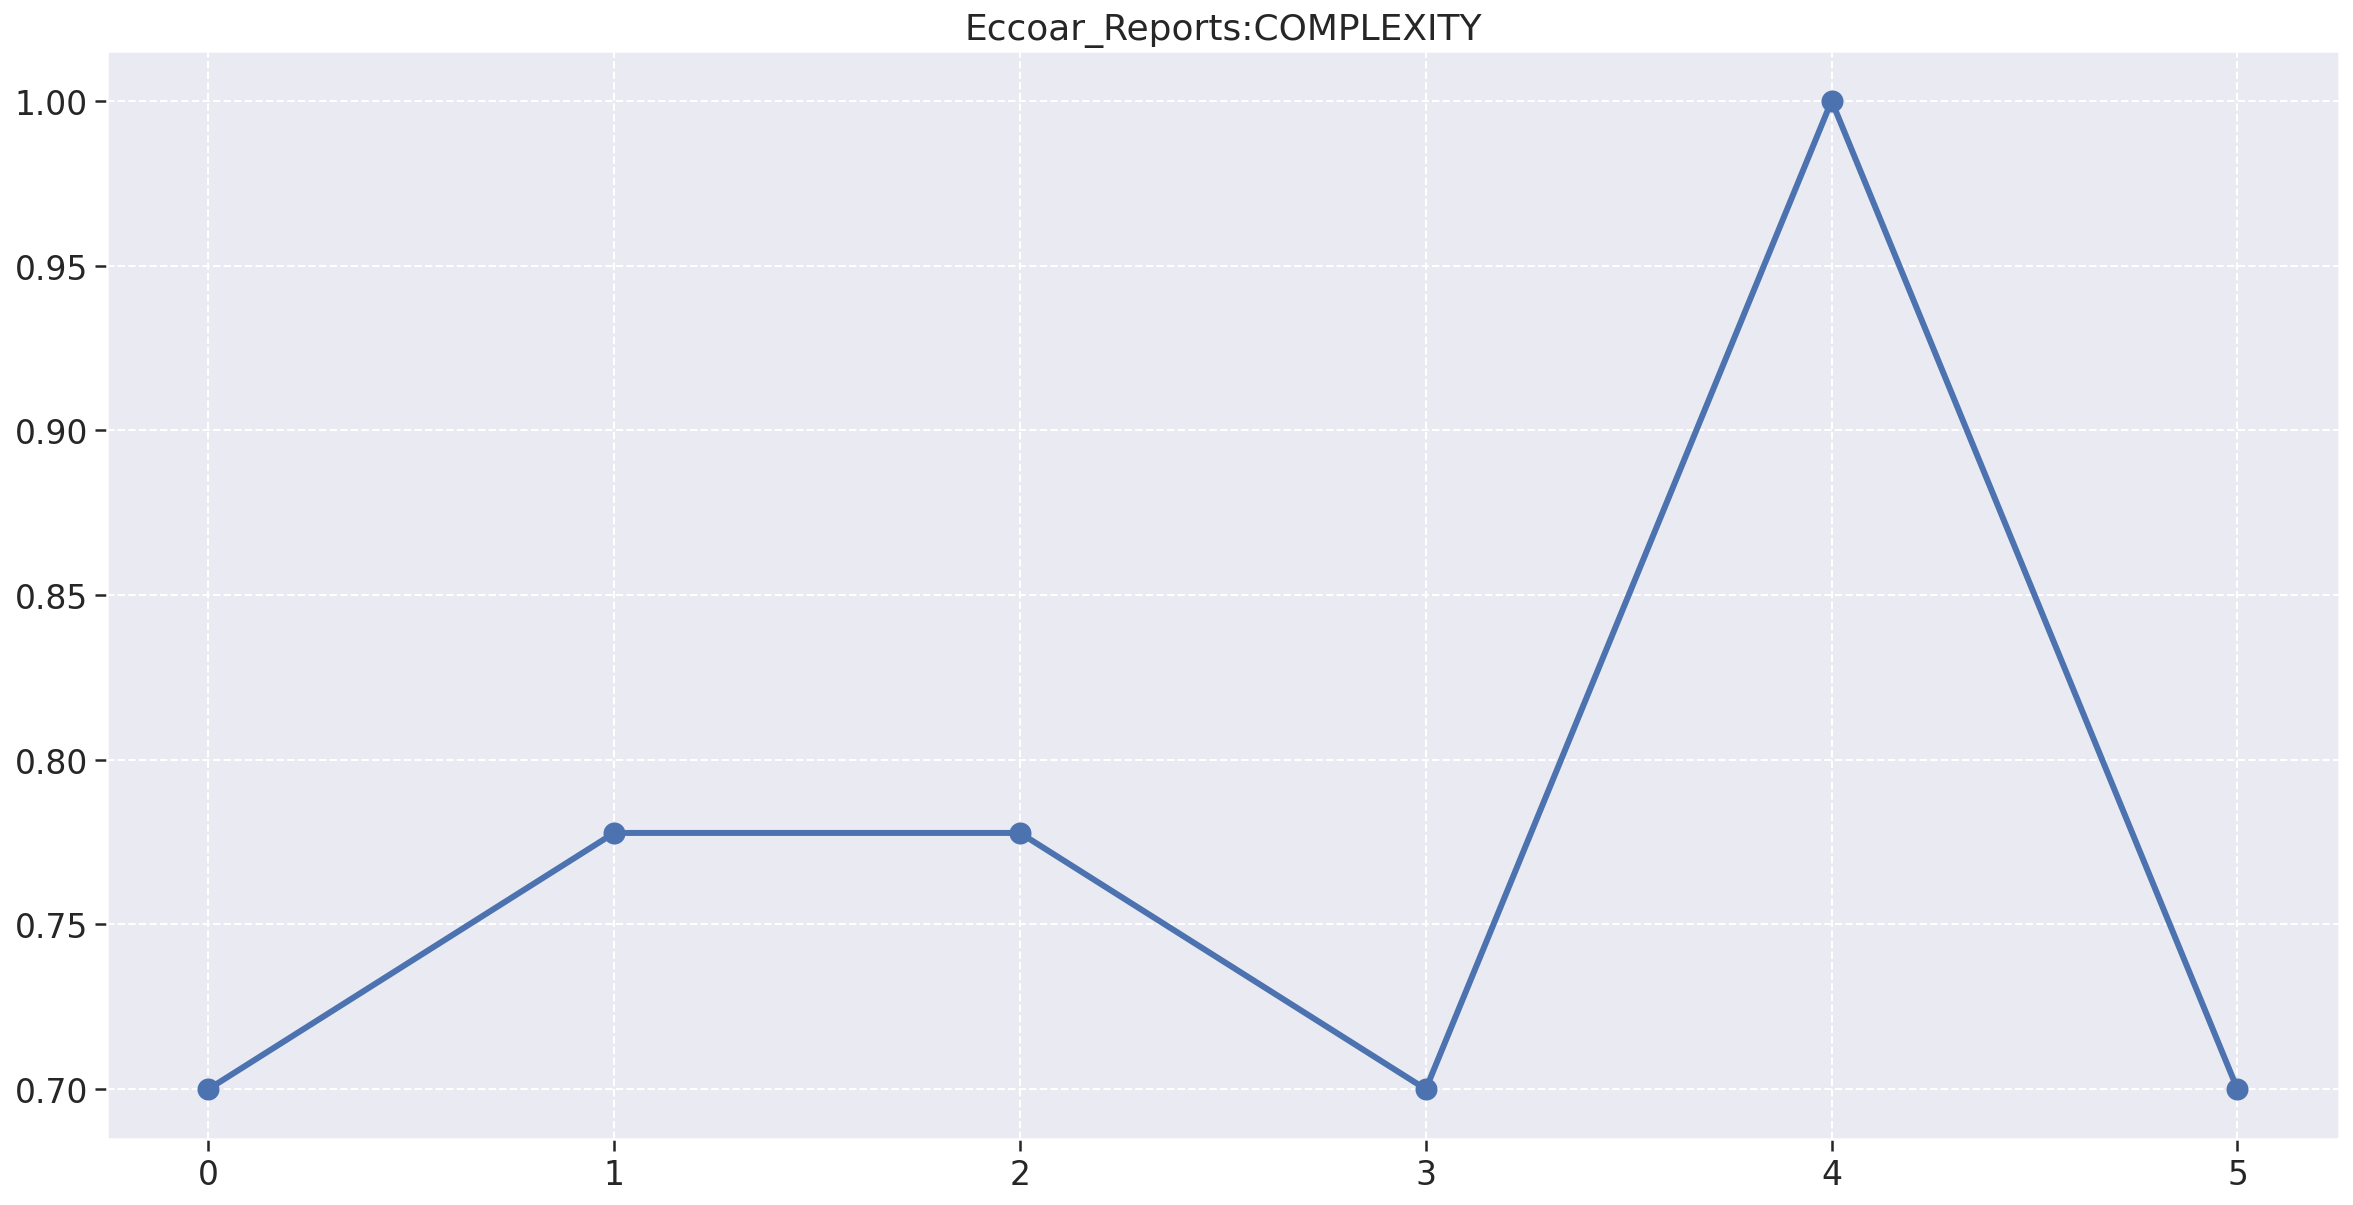

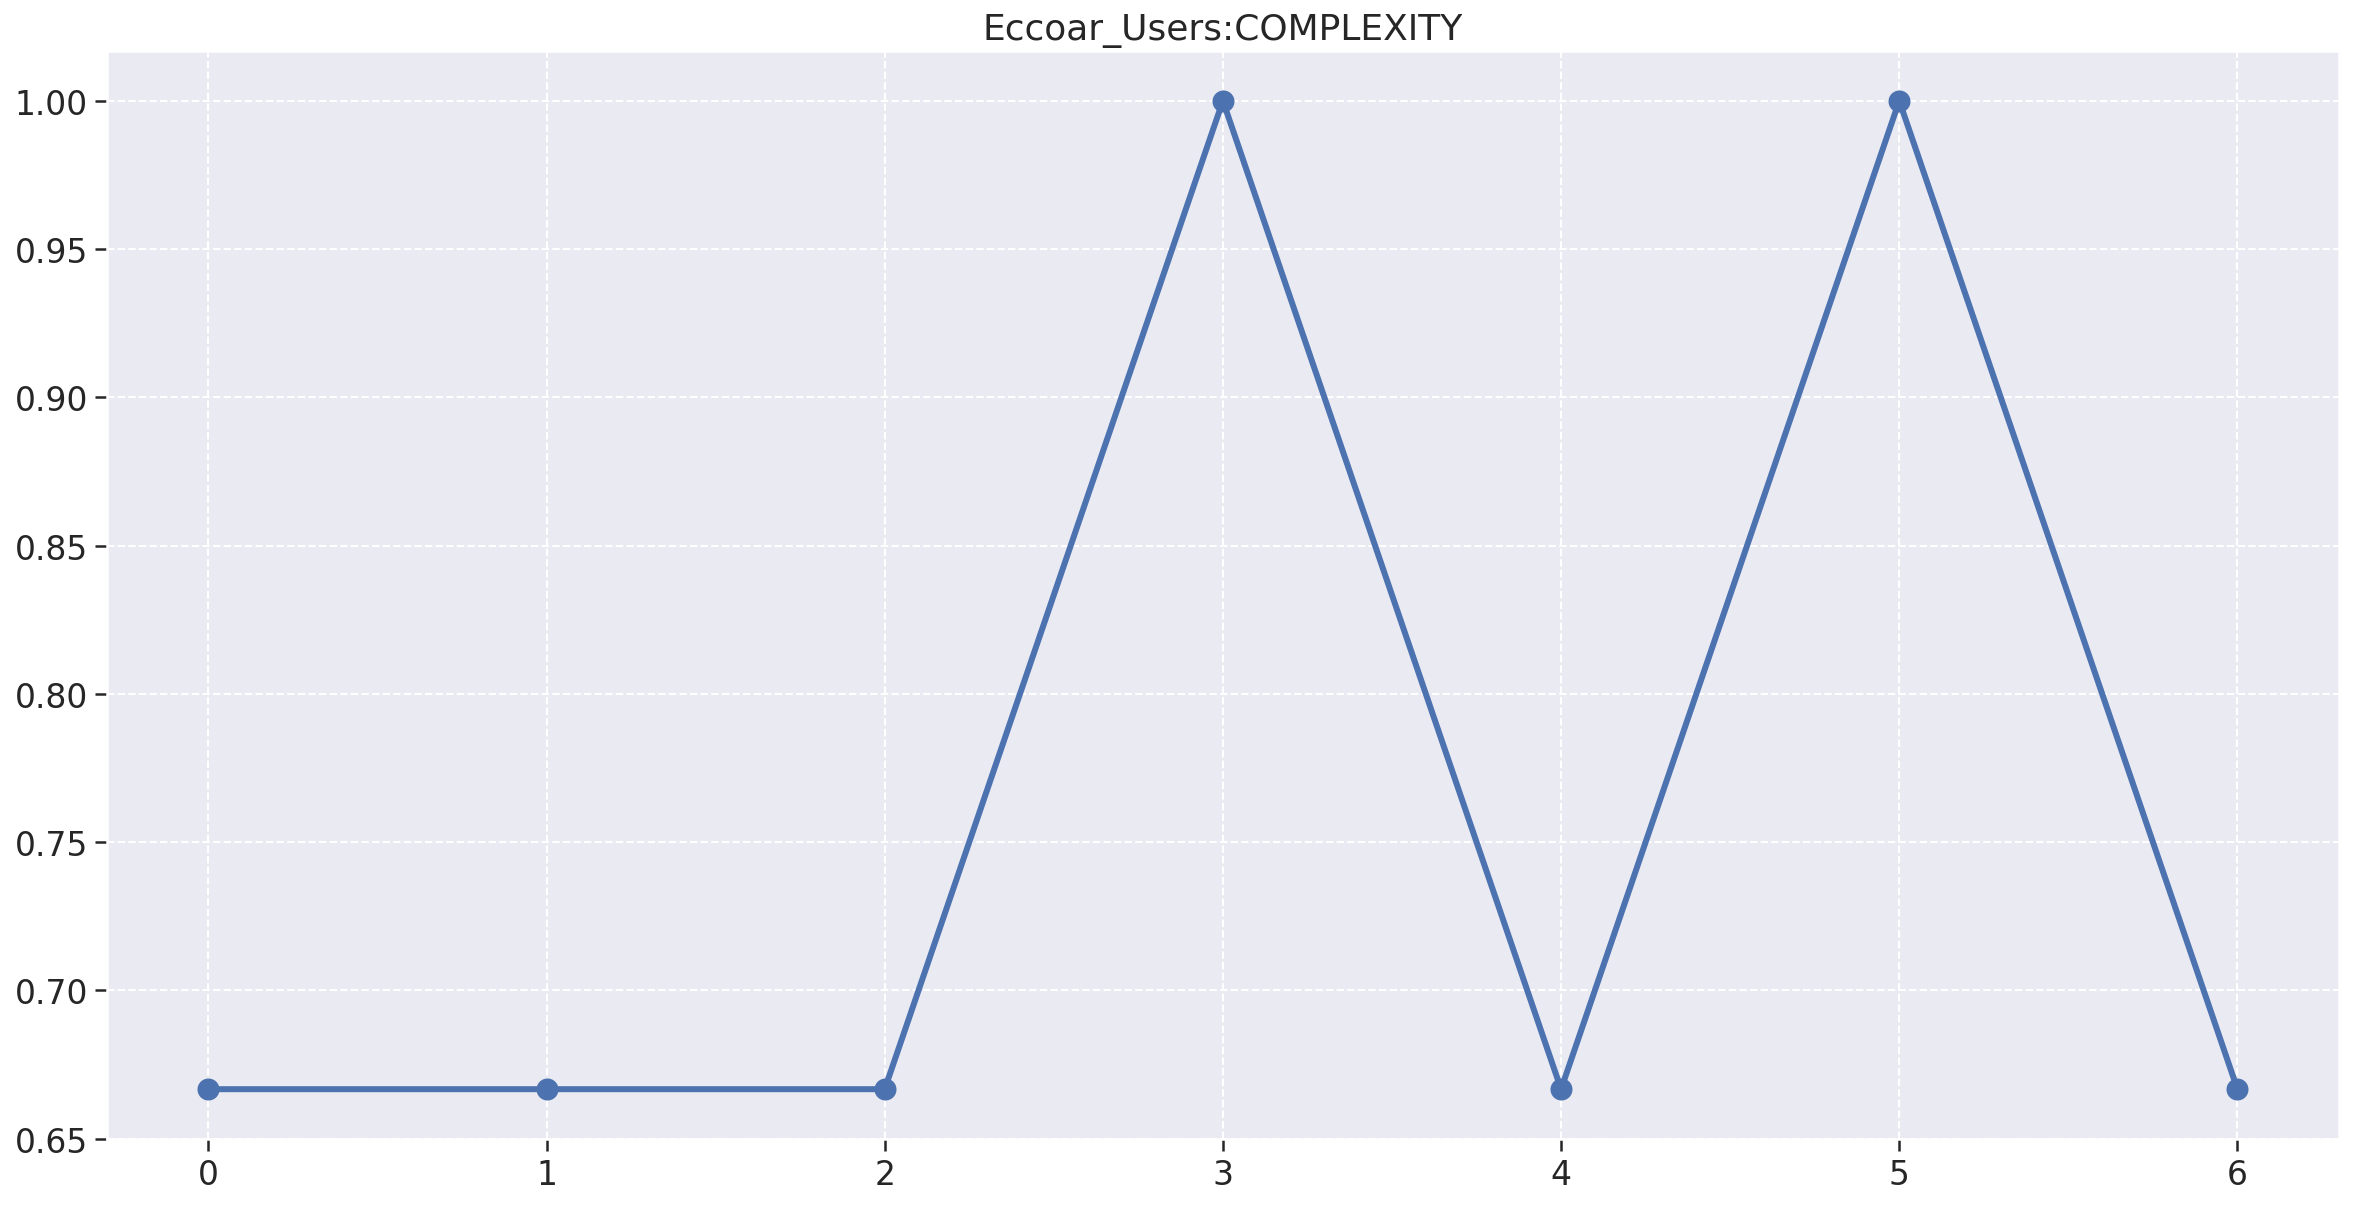

In [274]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)

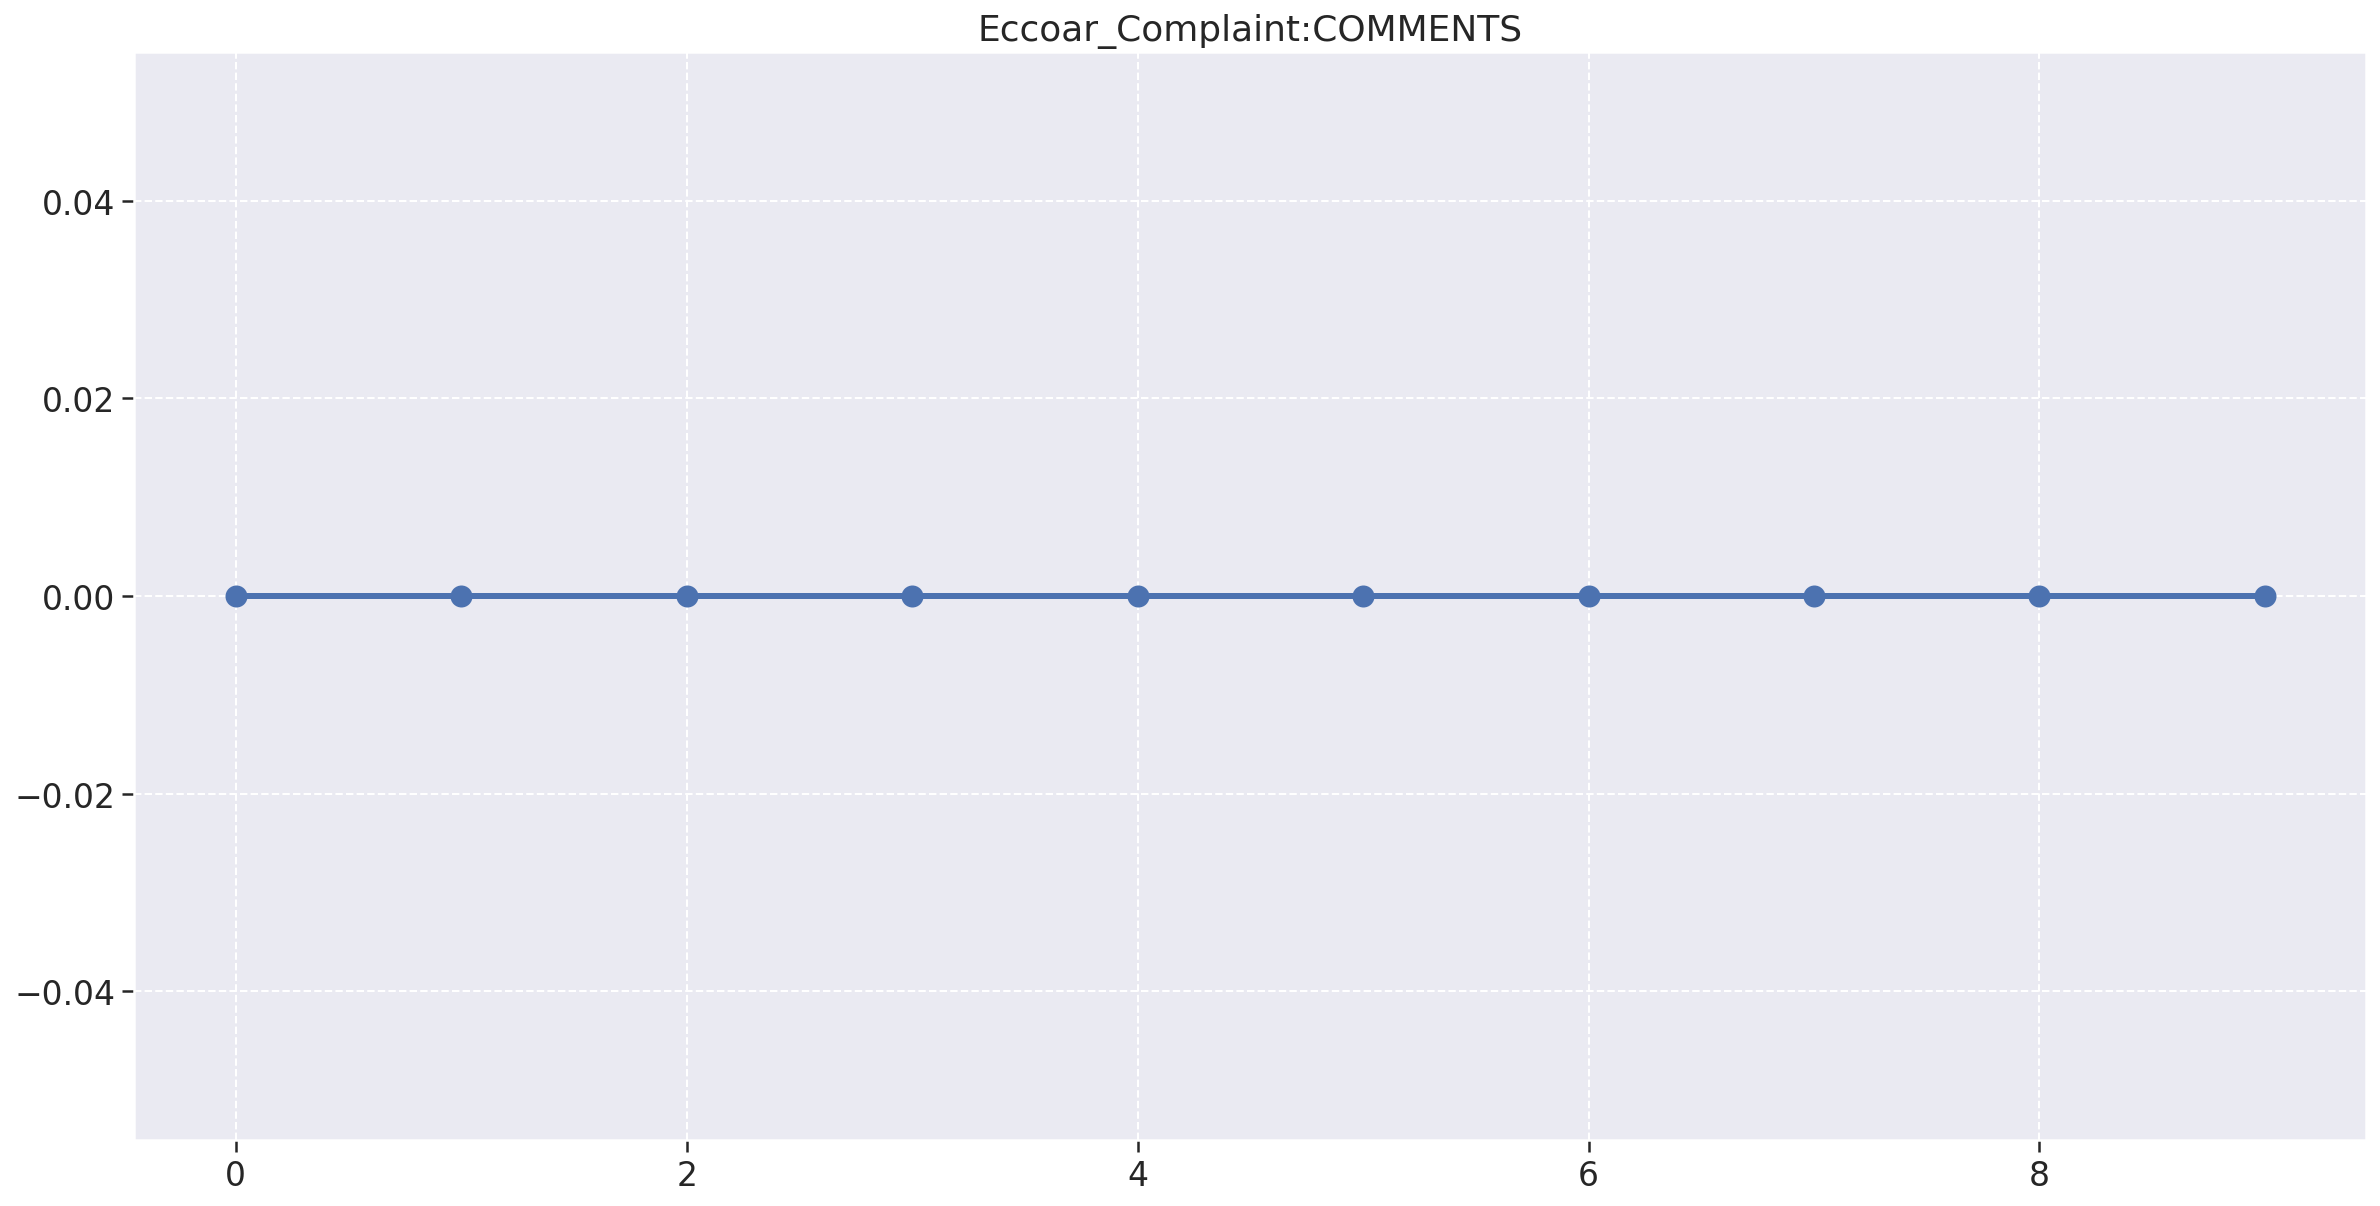

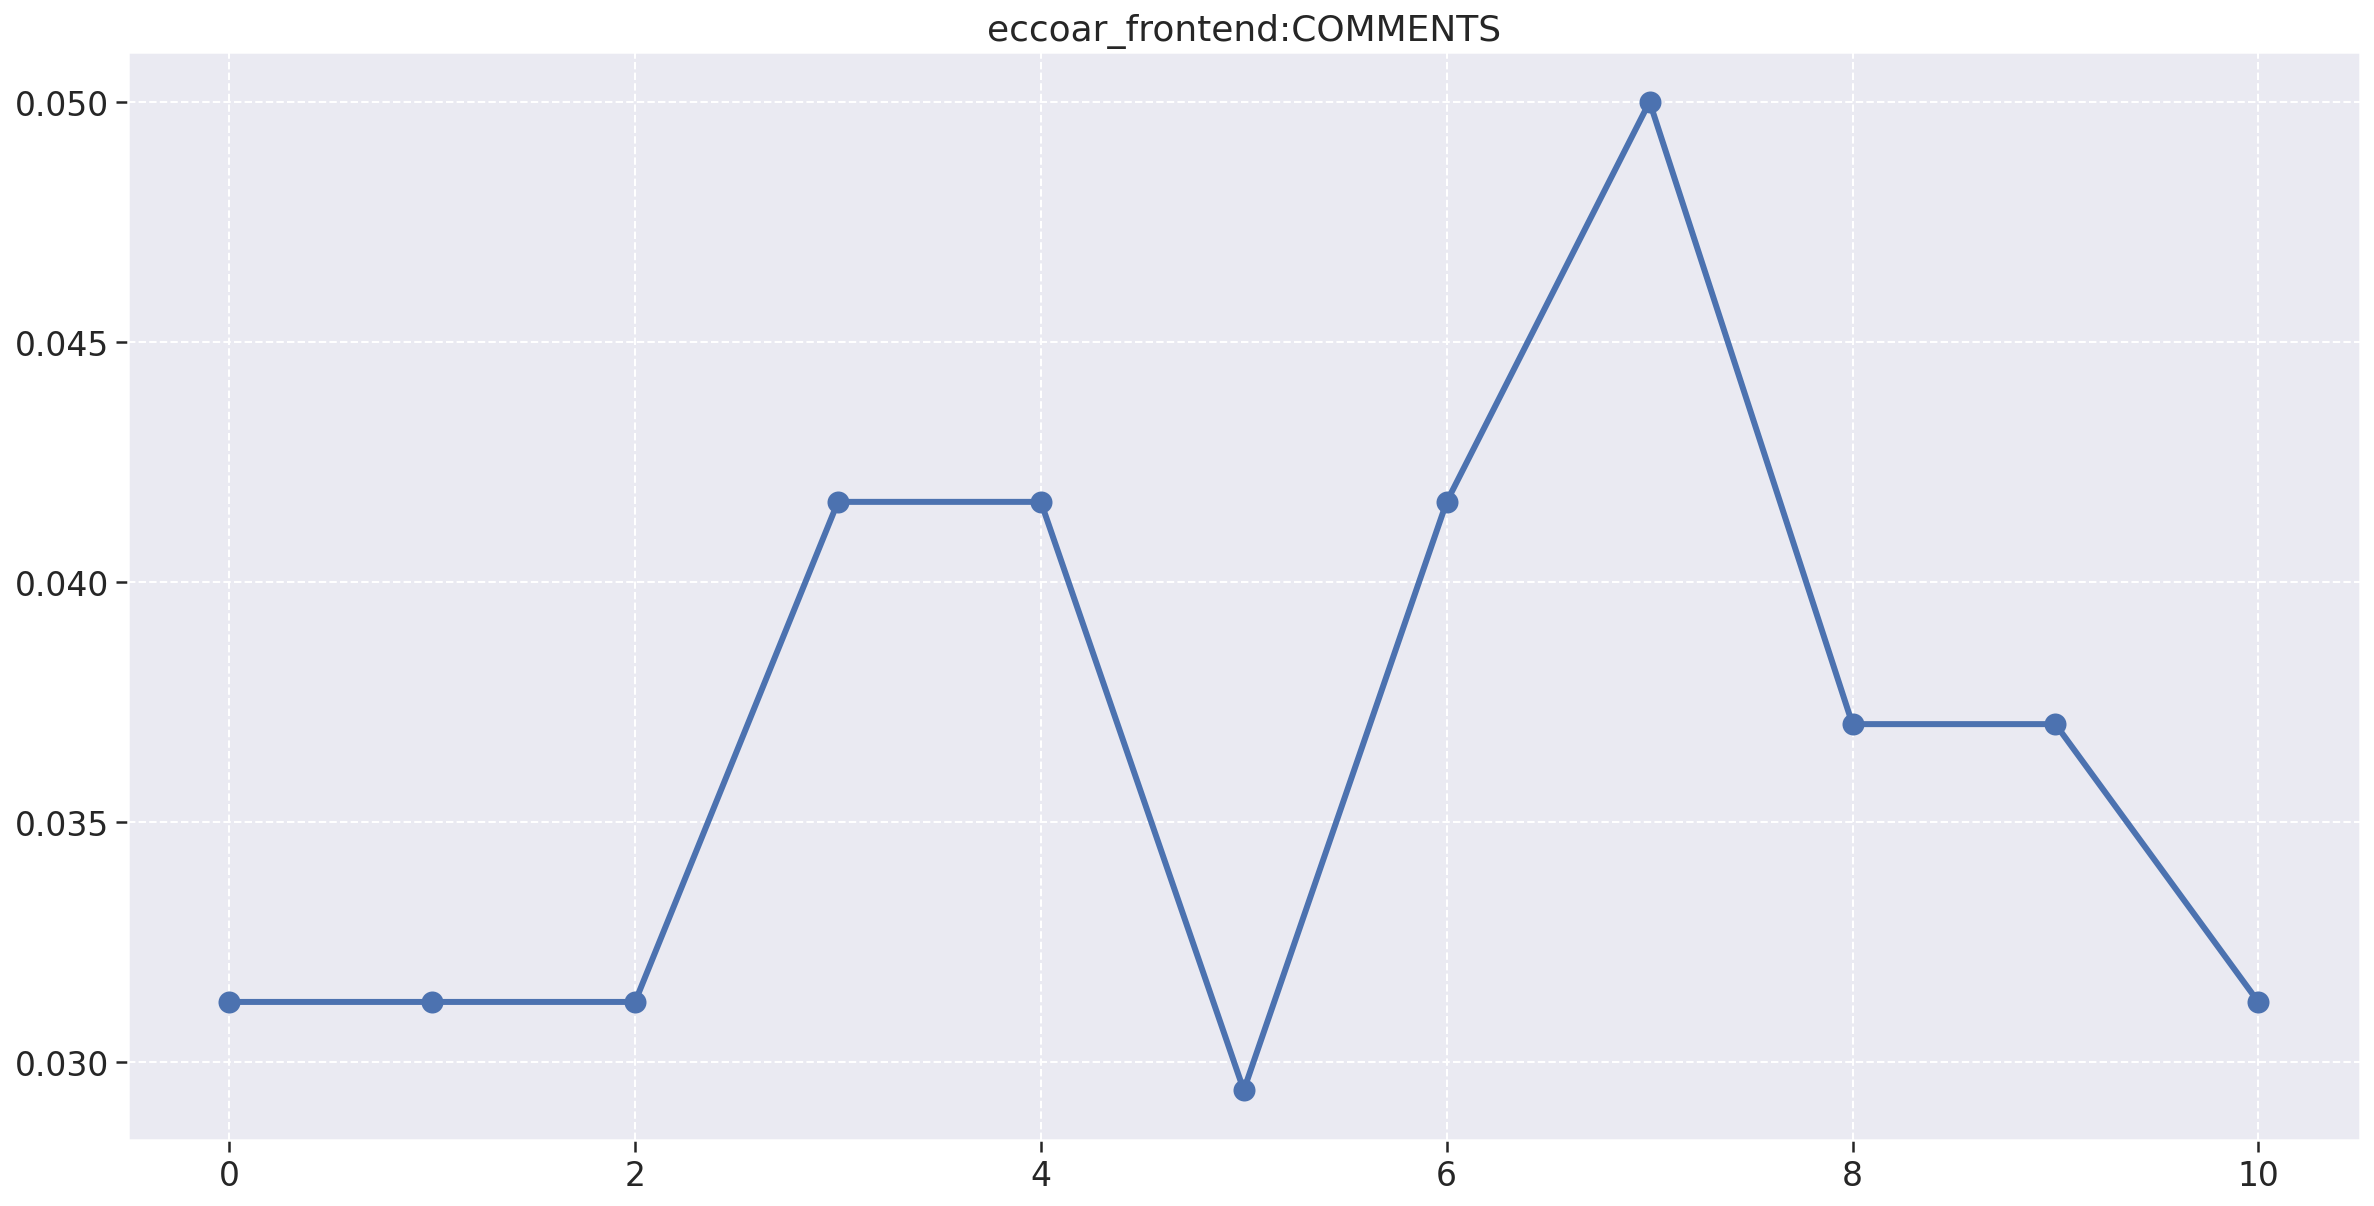

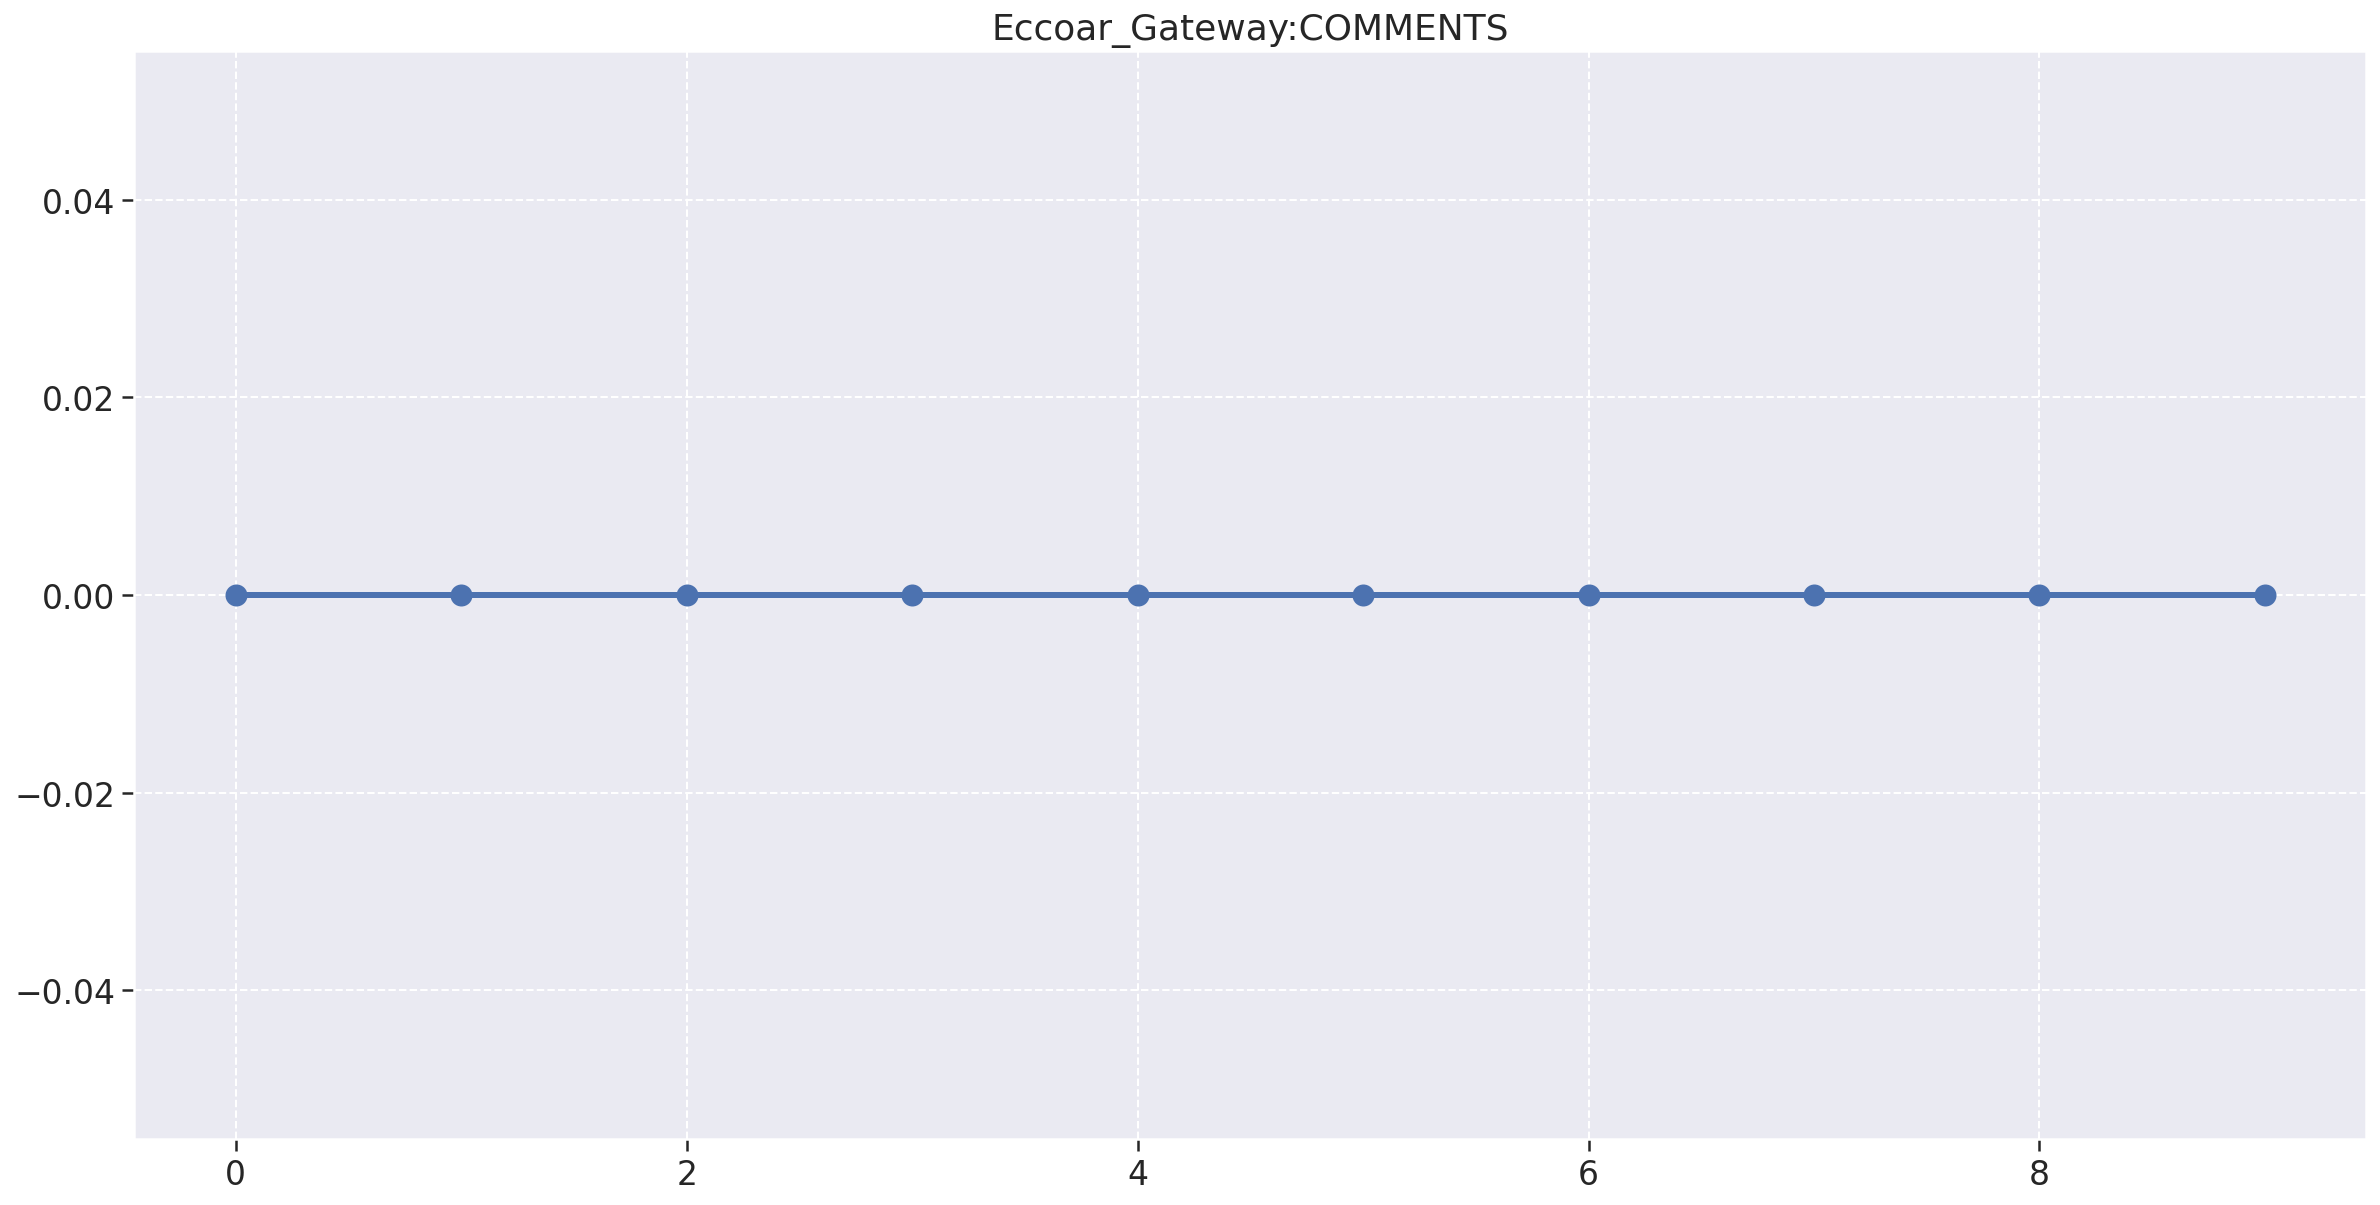

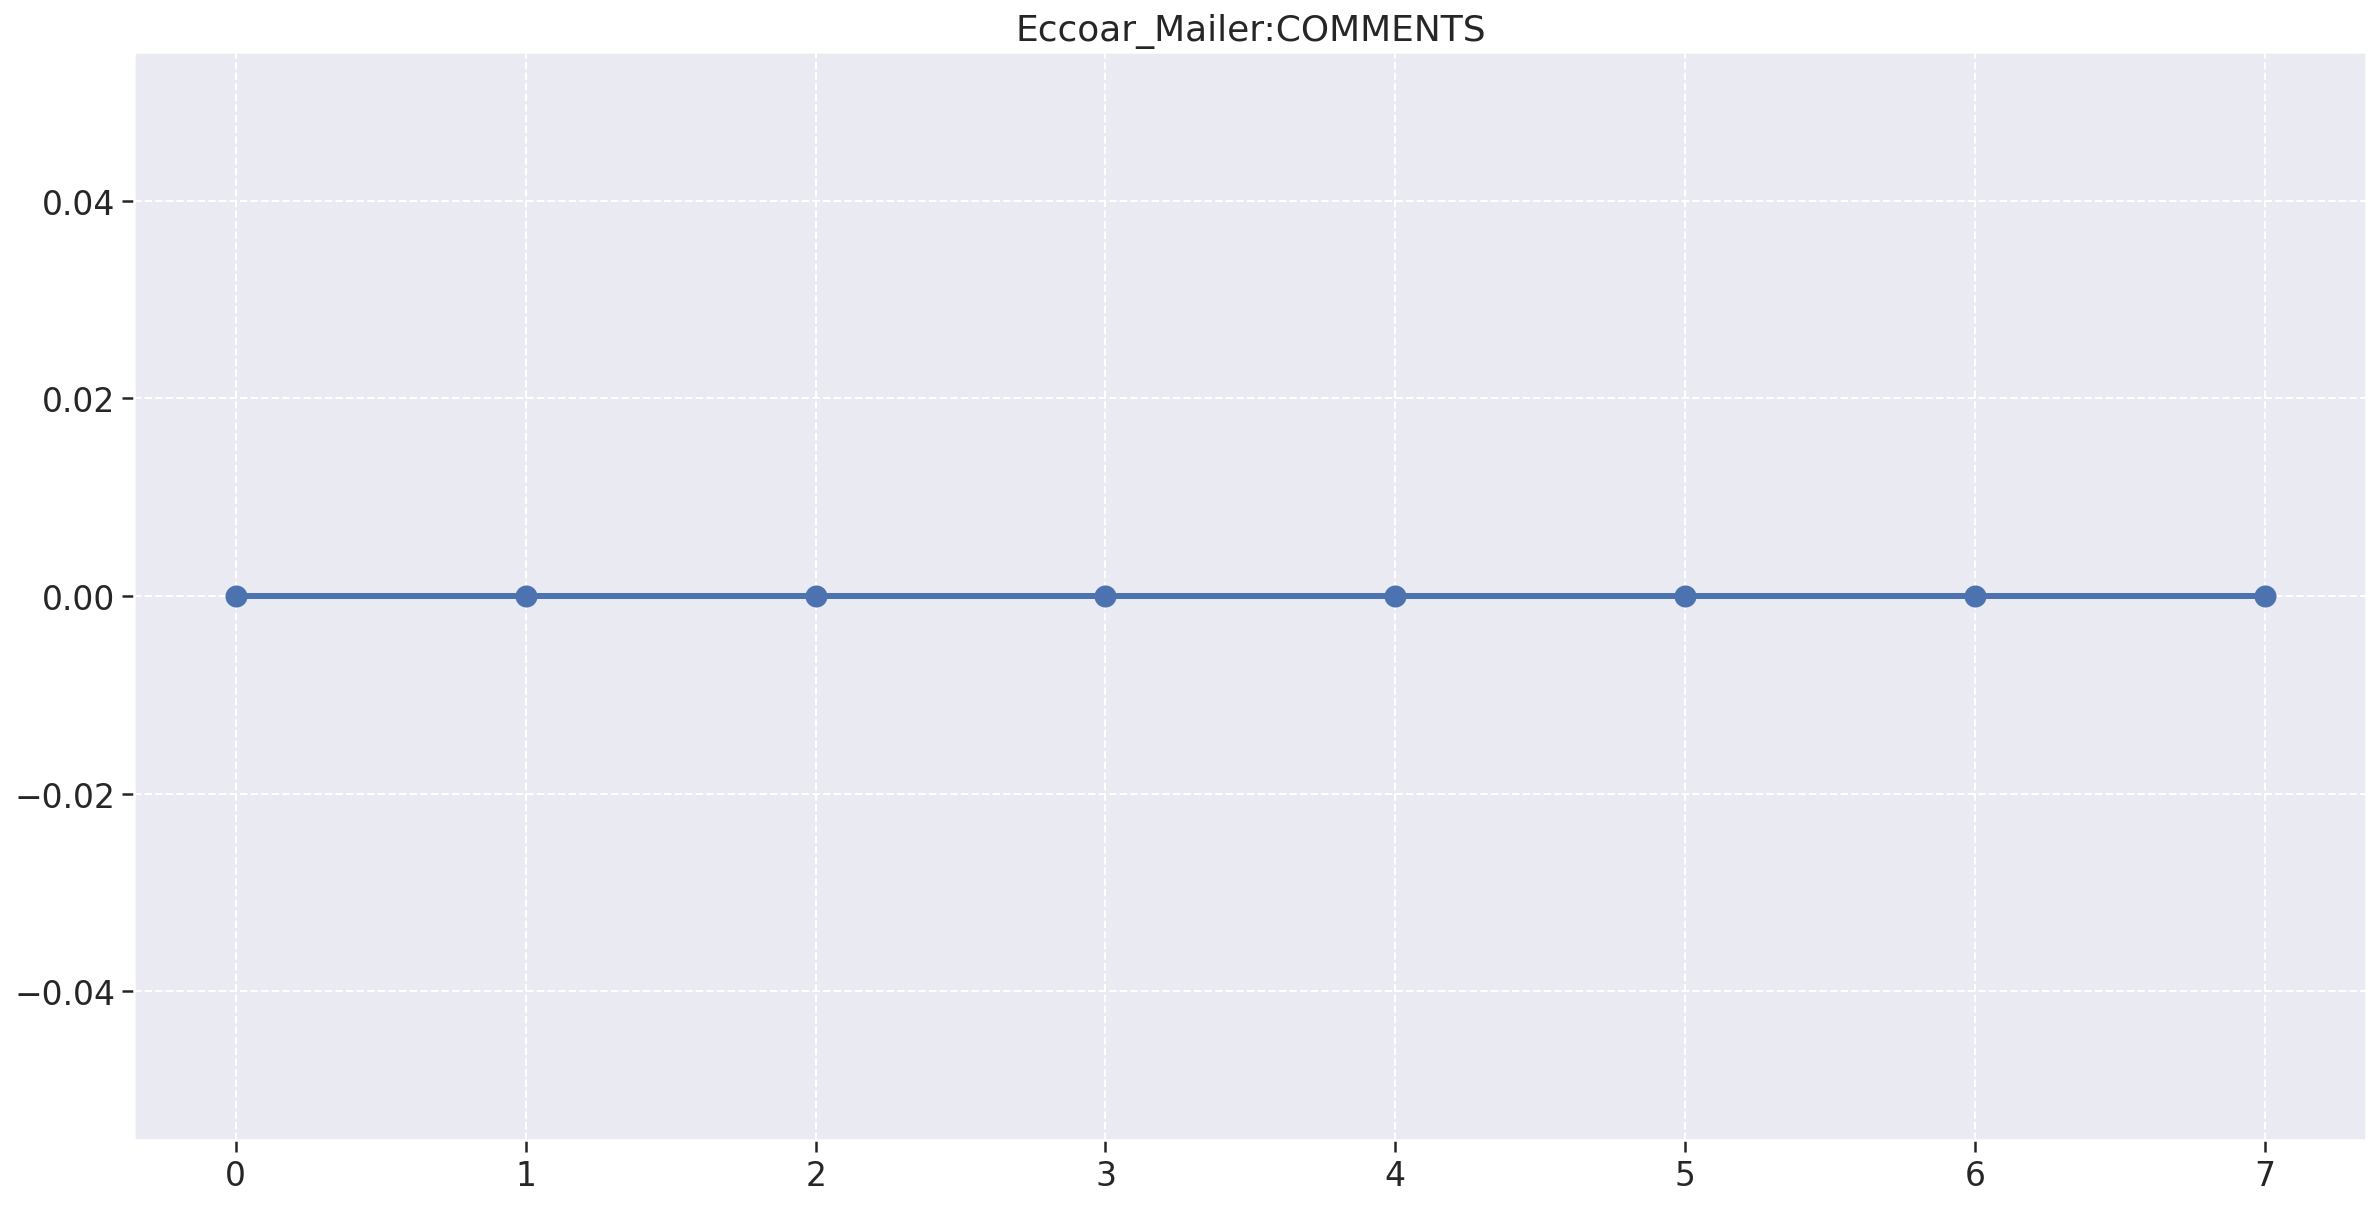

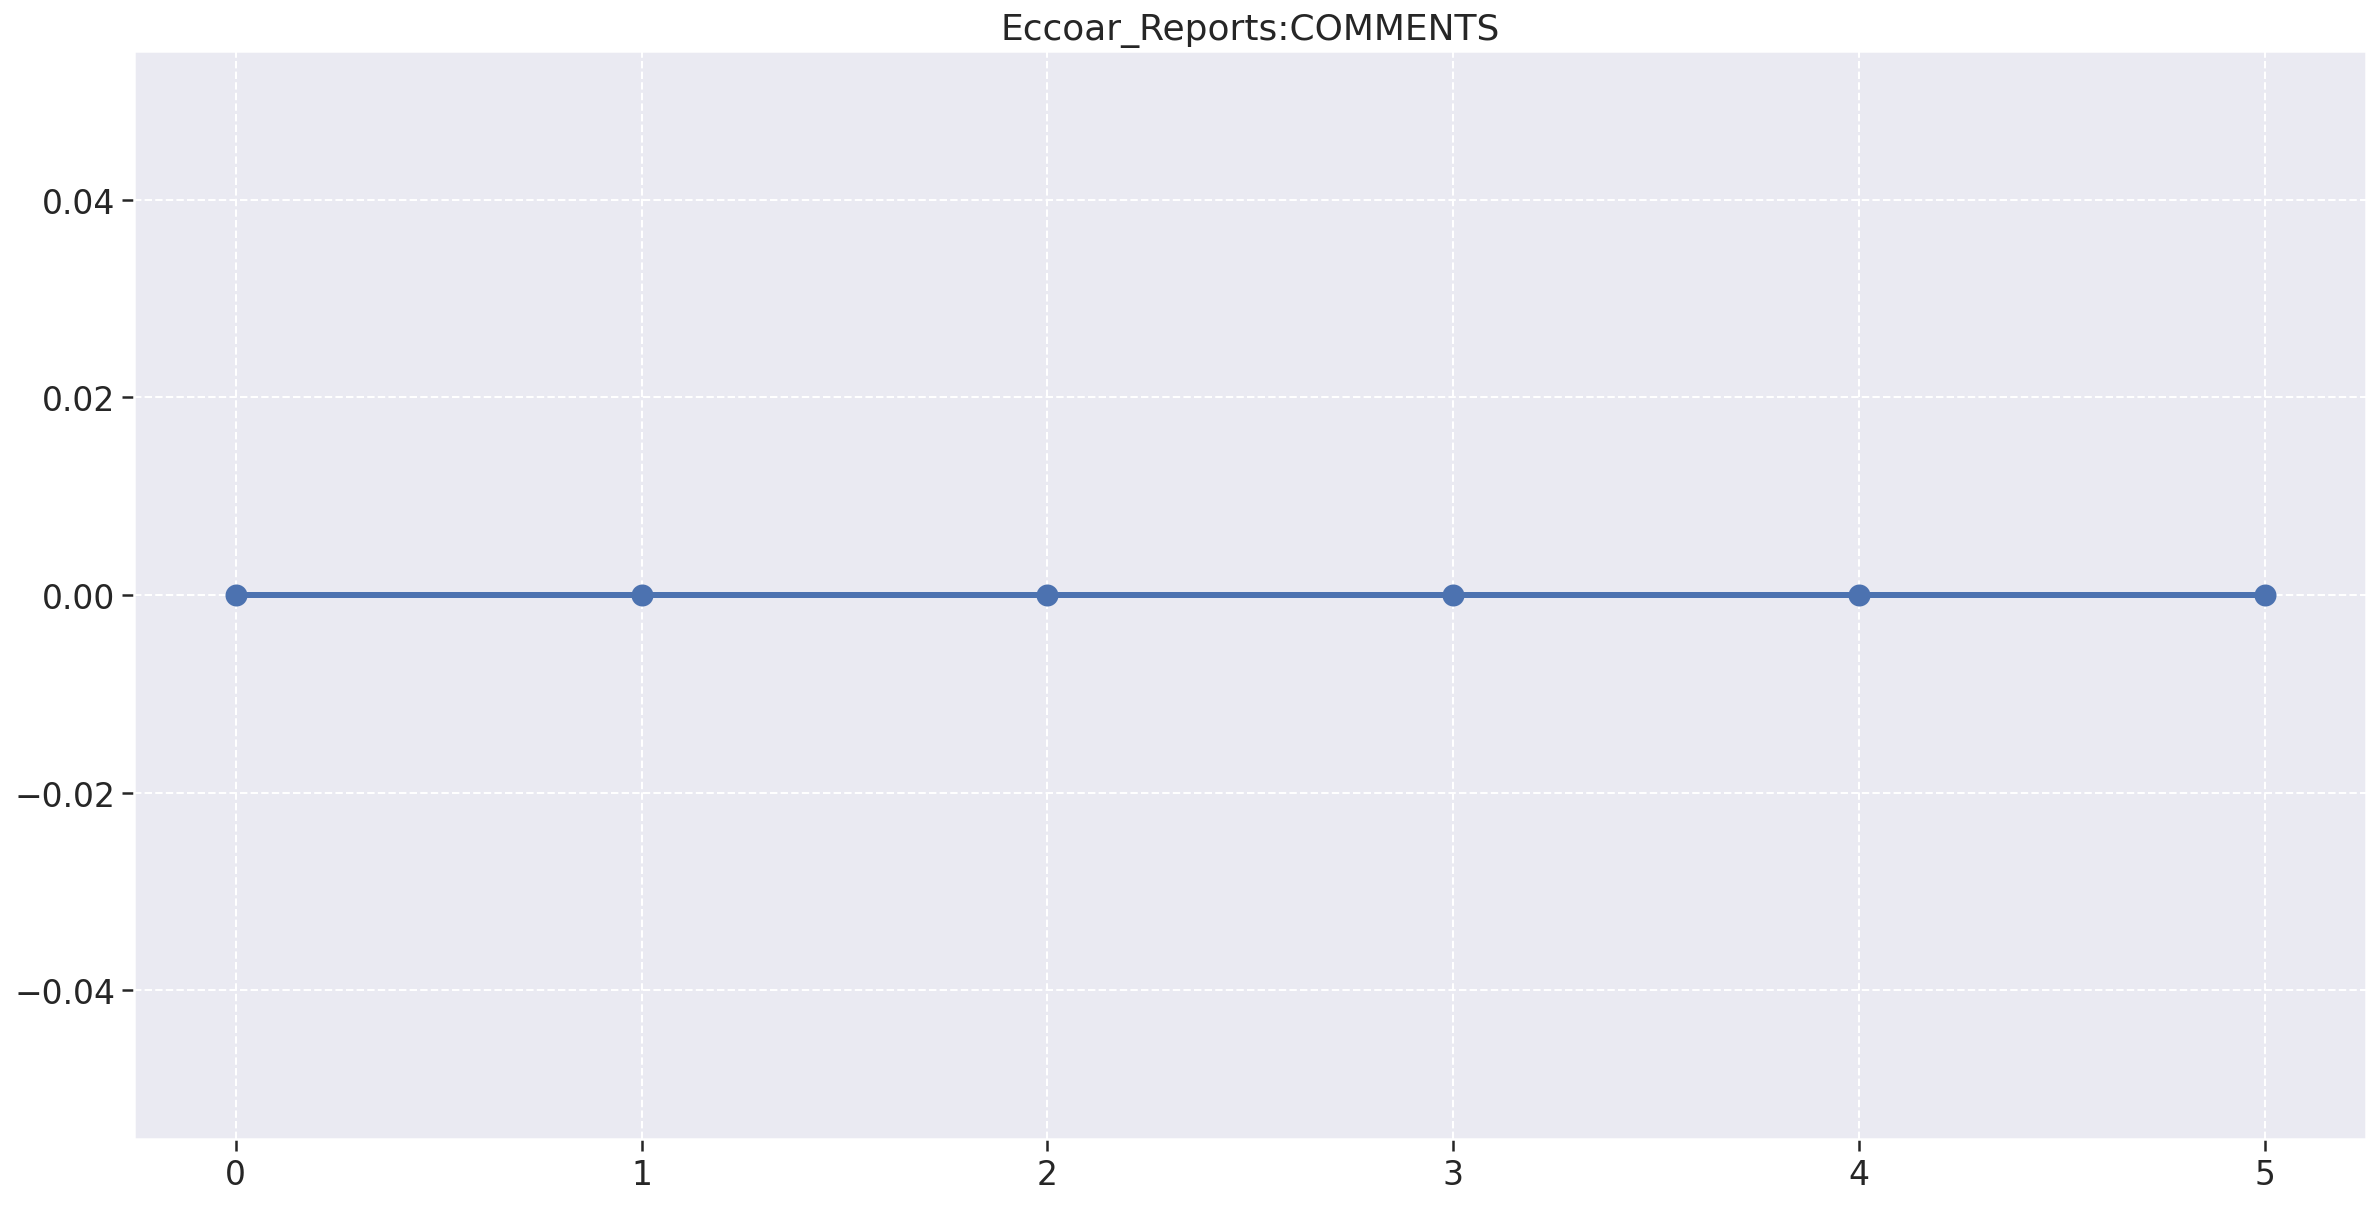

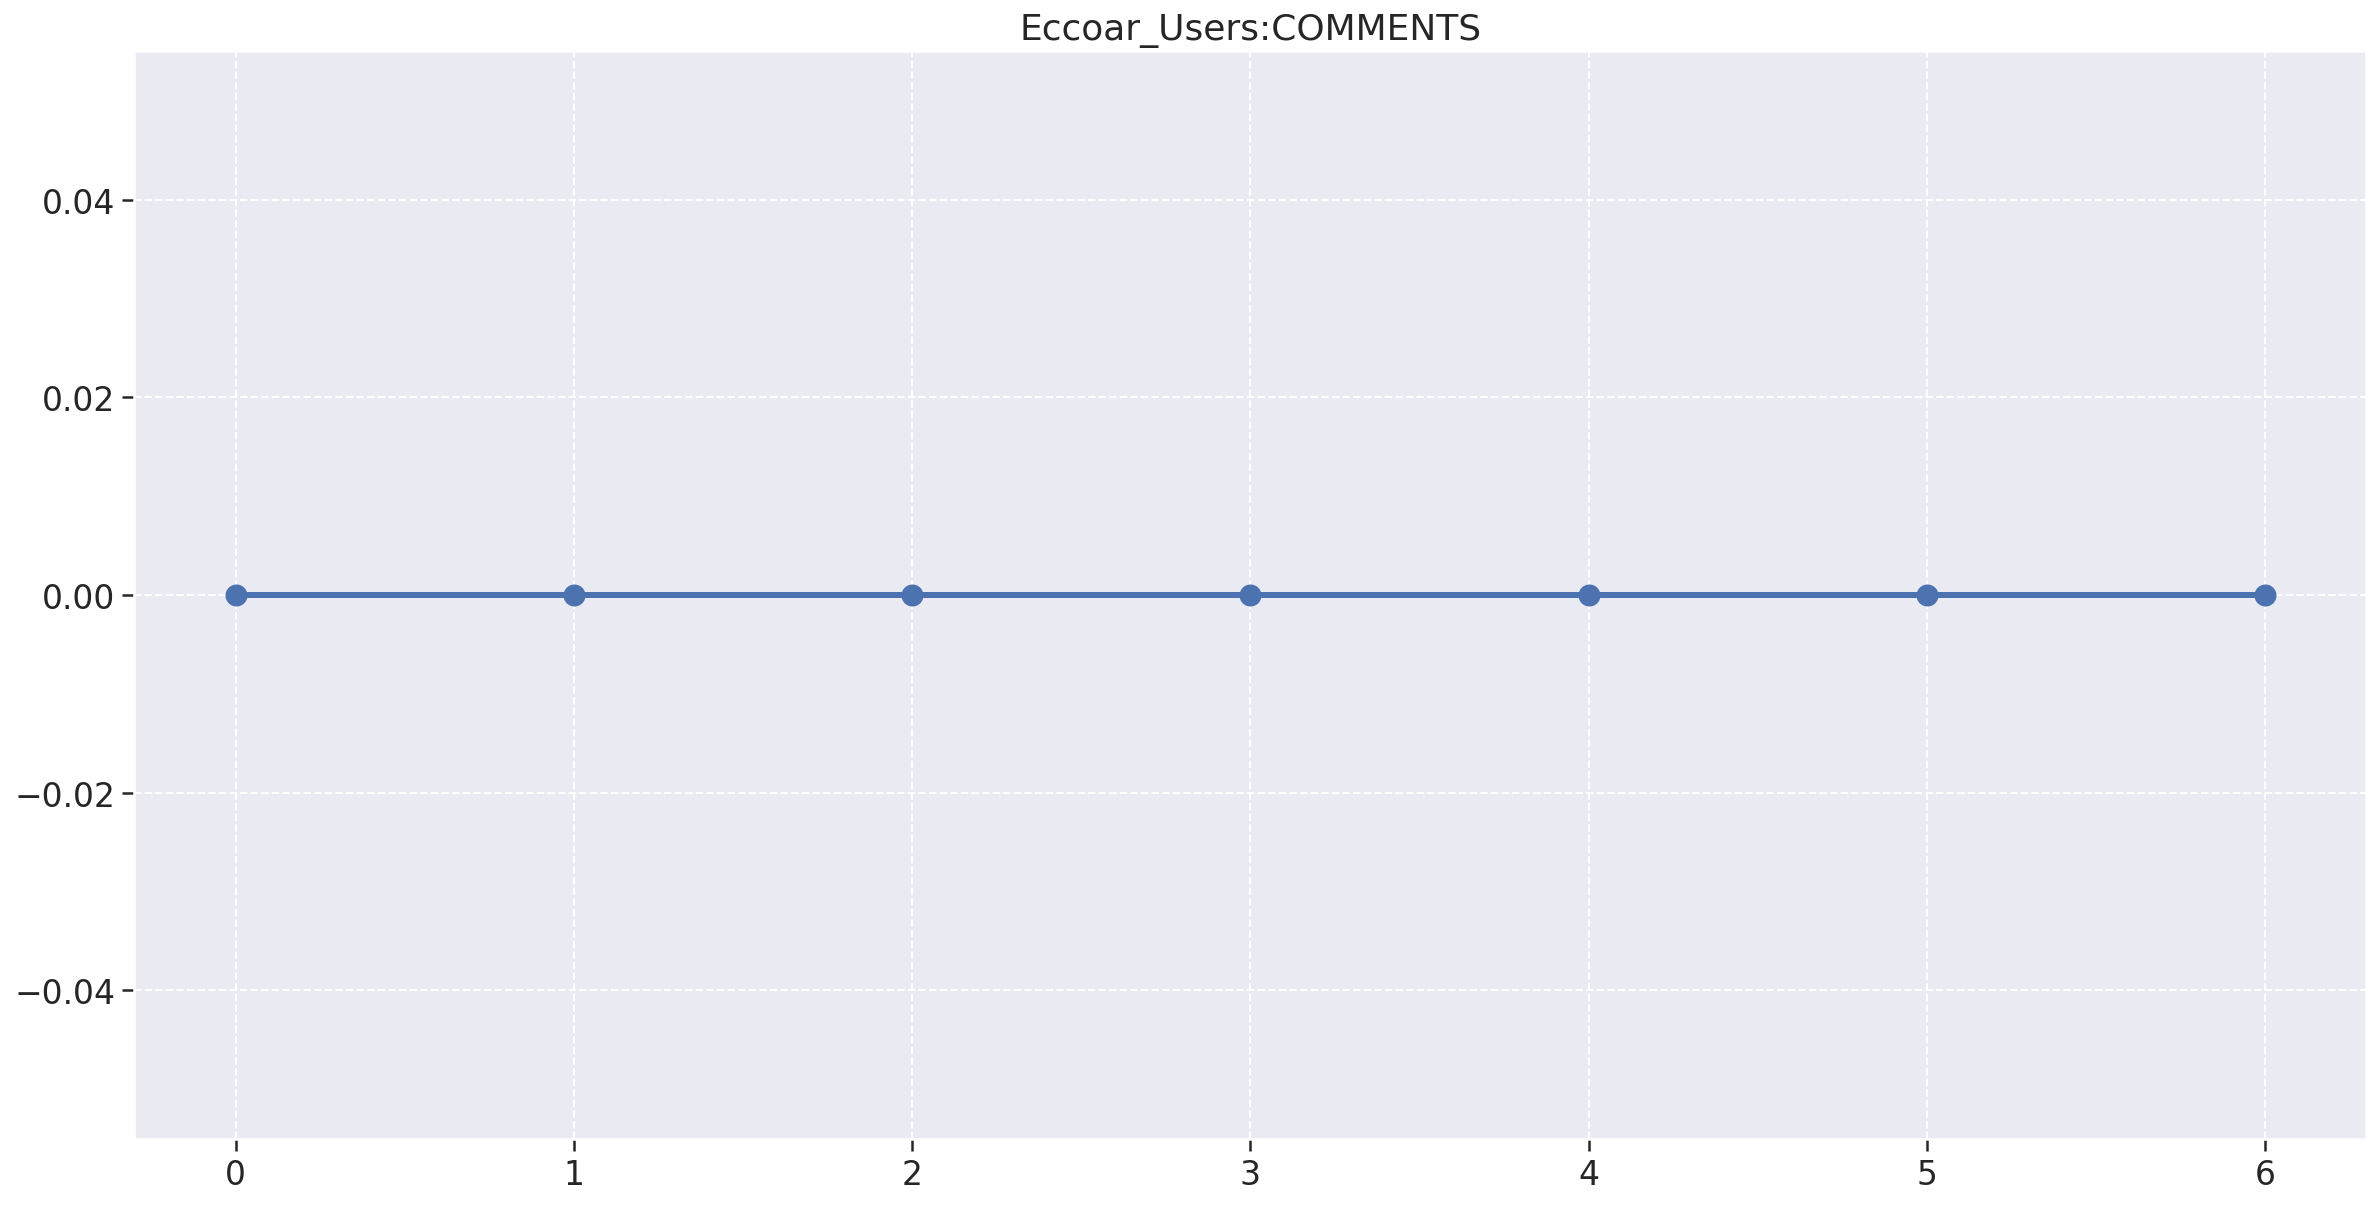

In [275]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMMENTS")
    plt.plot(metrics_df['m2'], linewidth=3, marker='o', markersize=10)

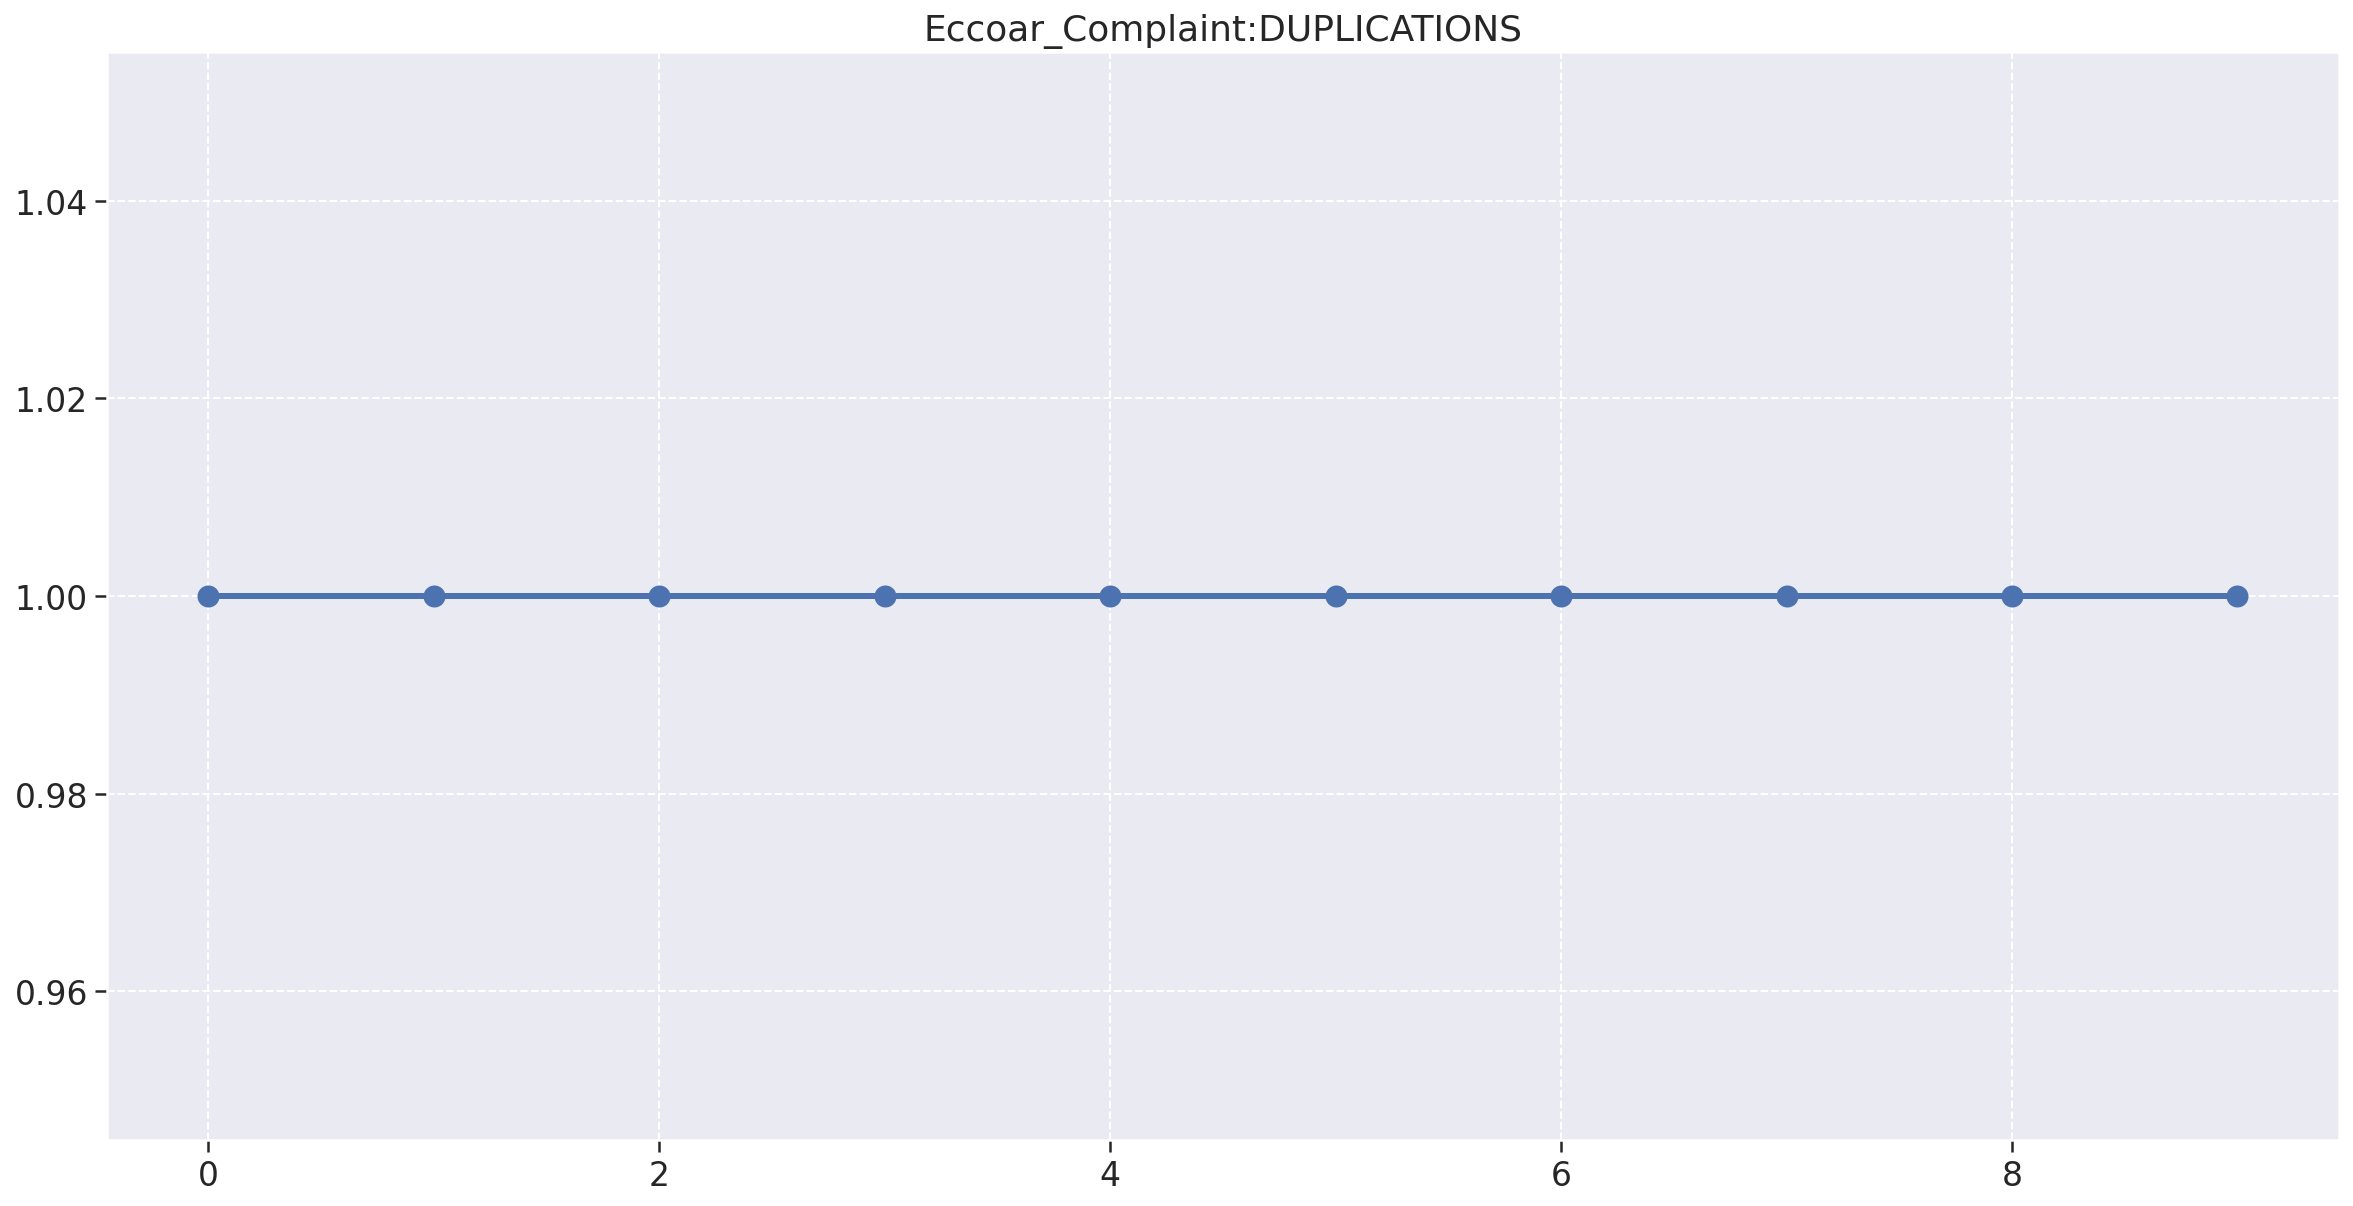

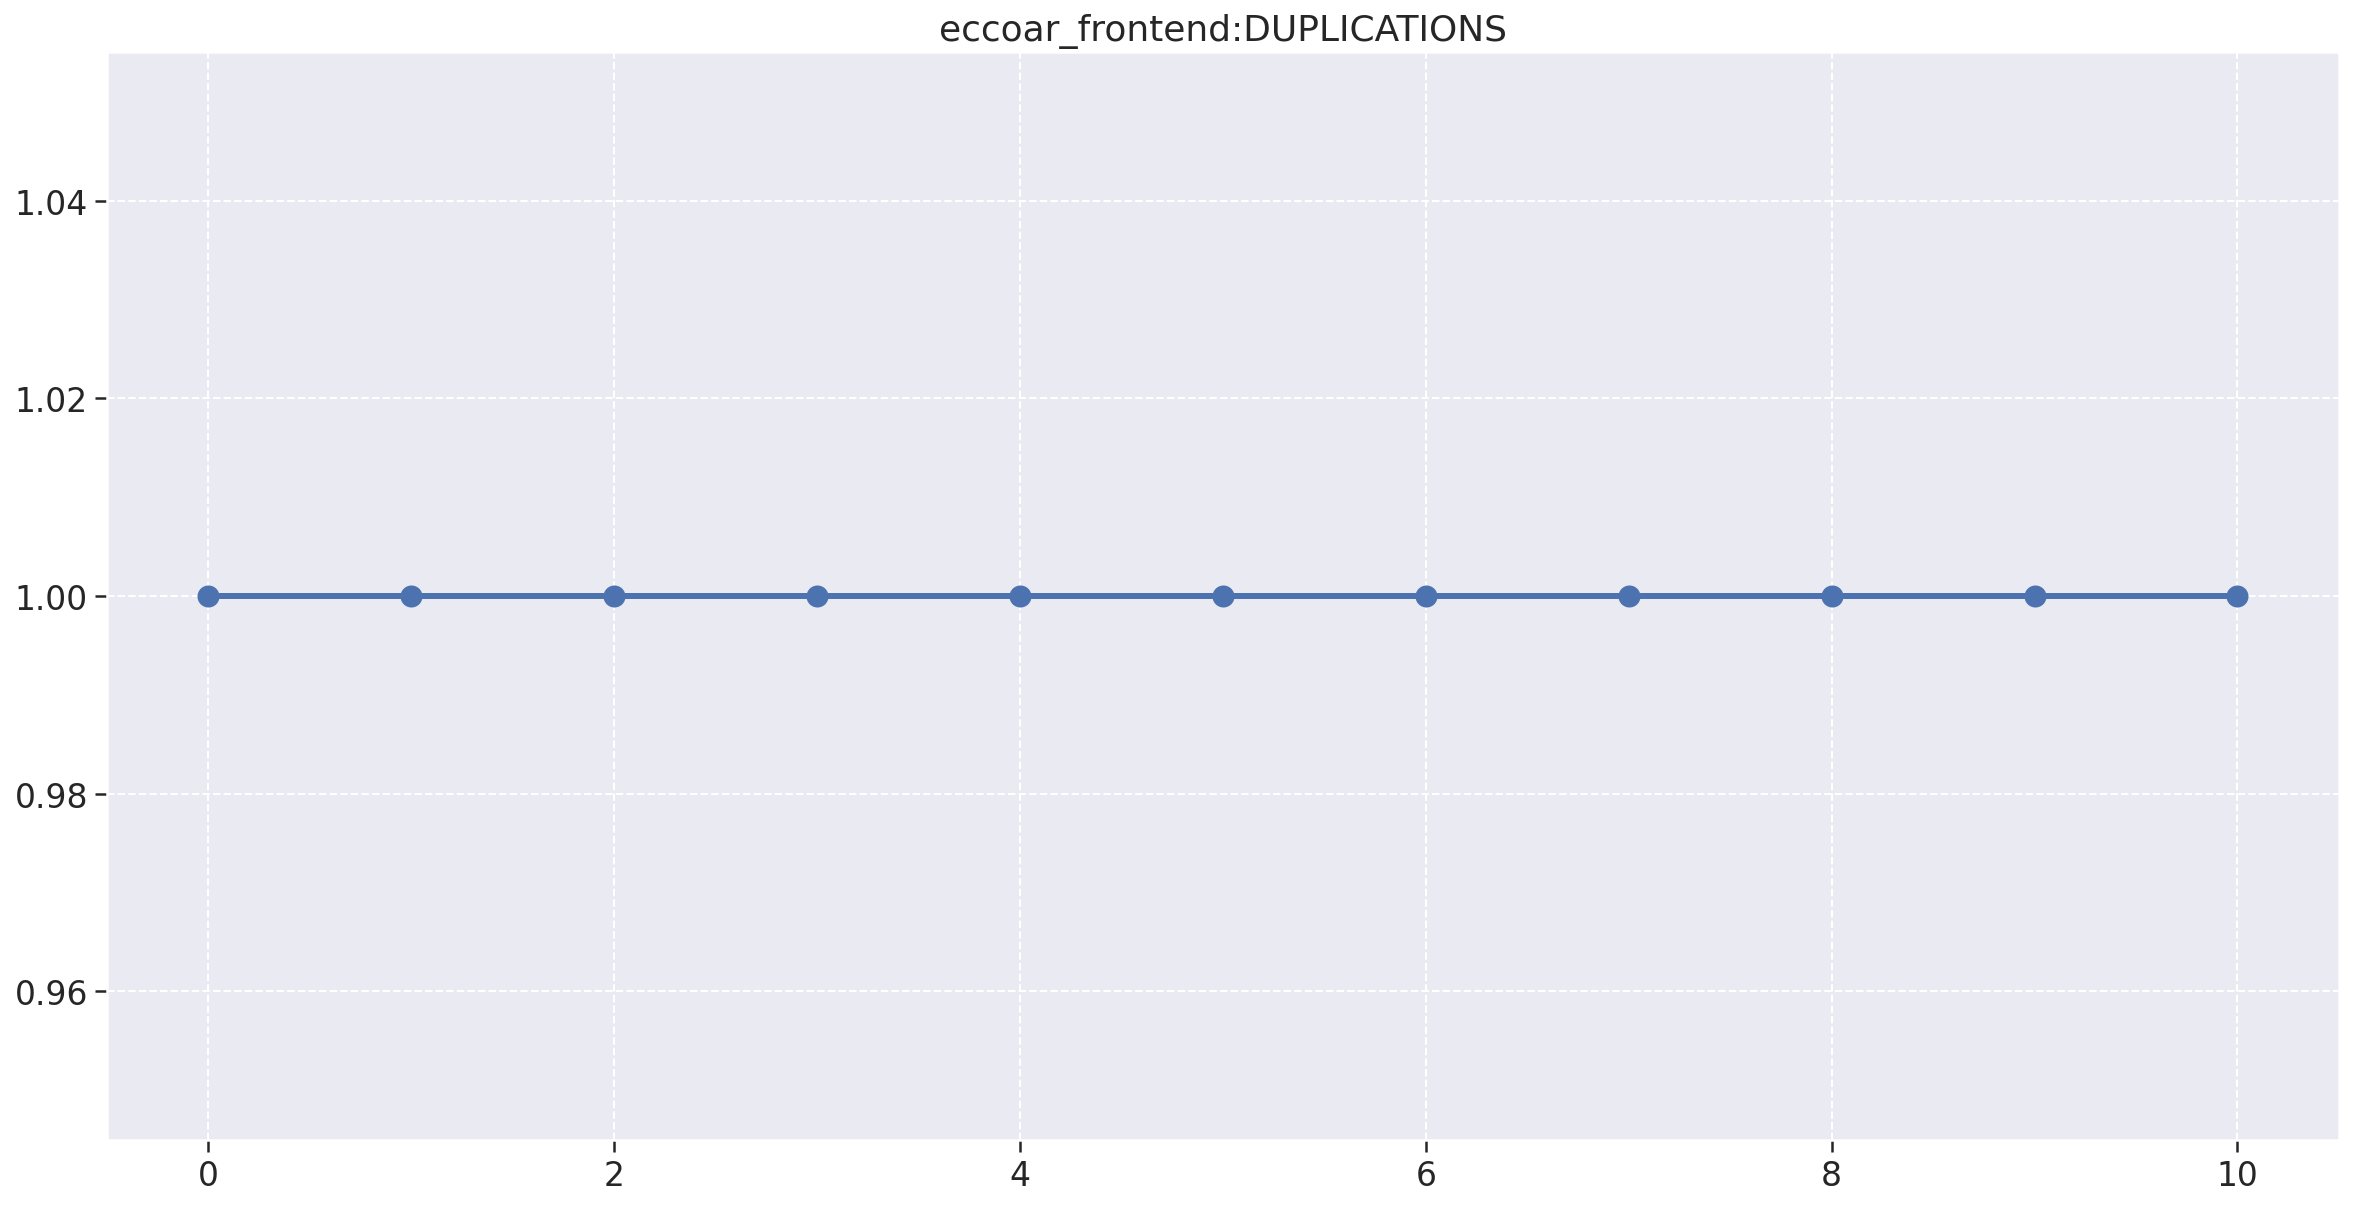

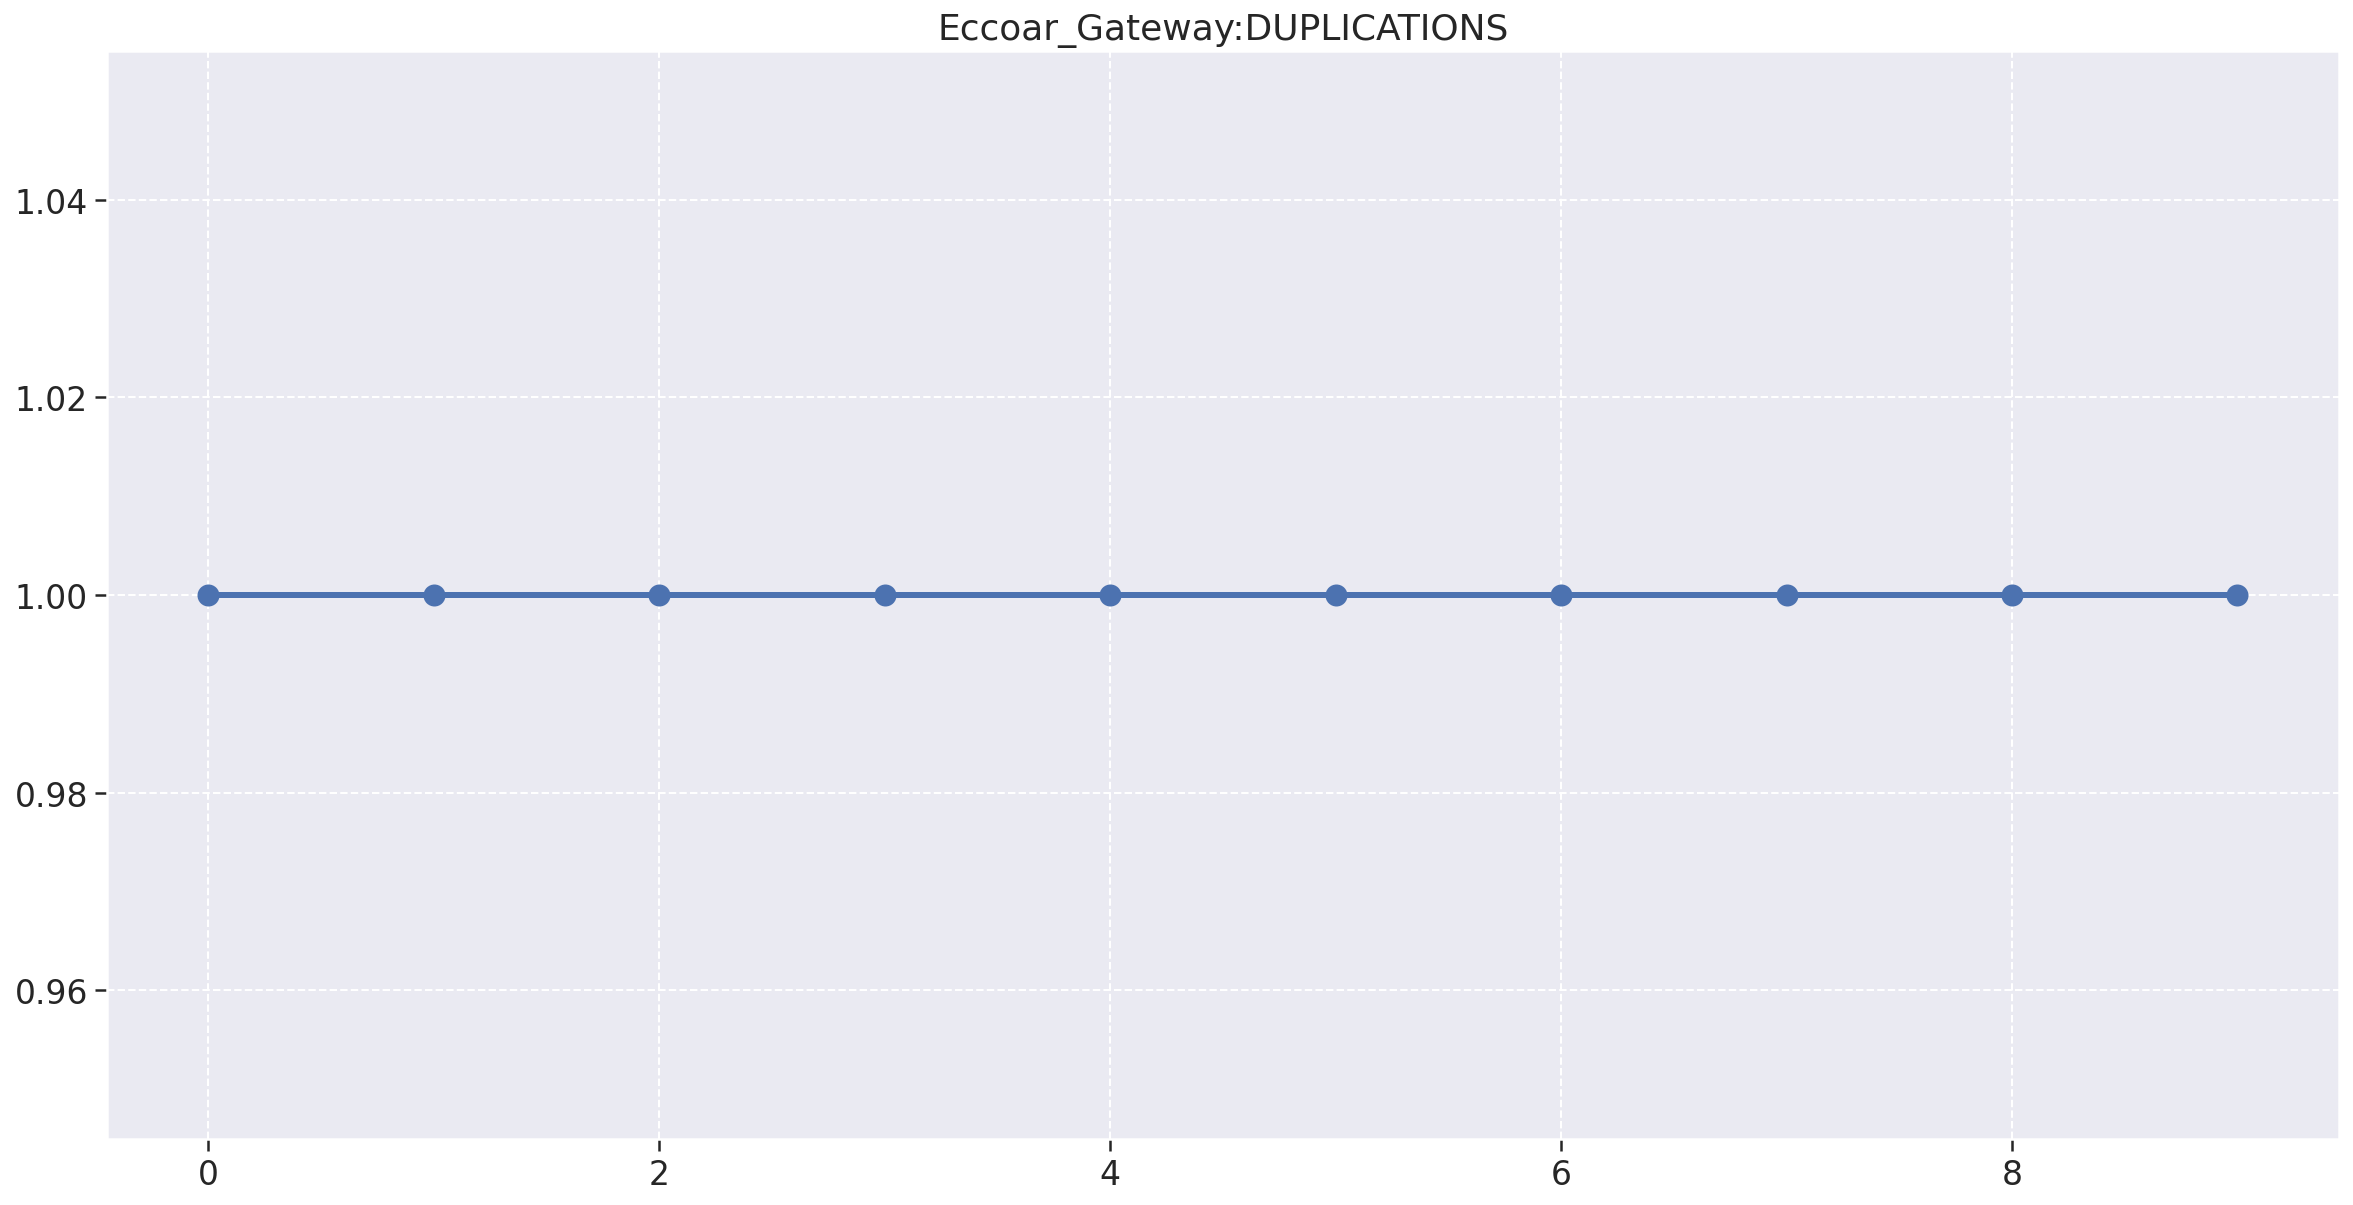

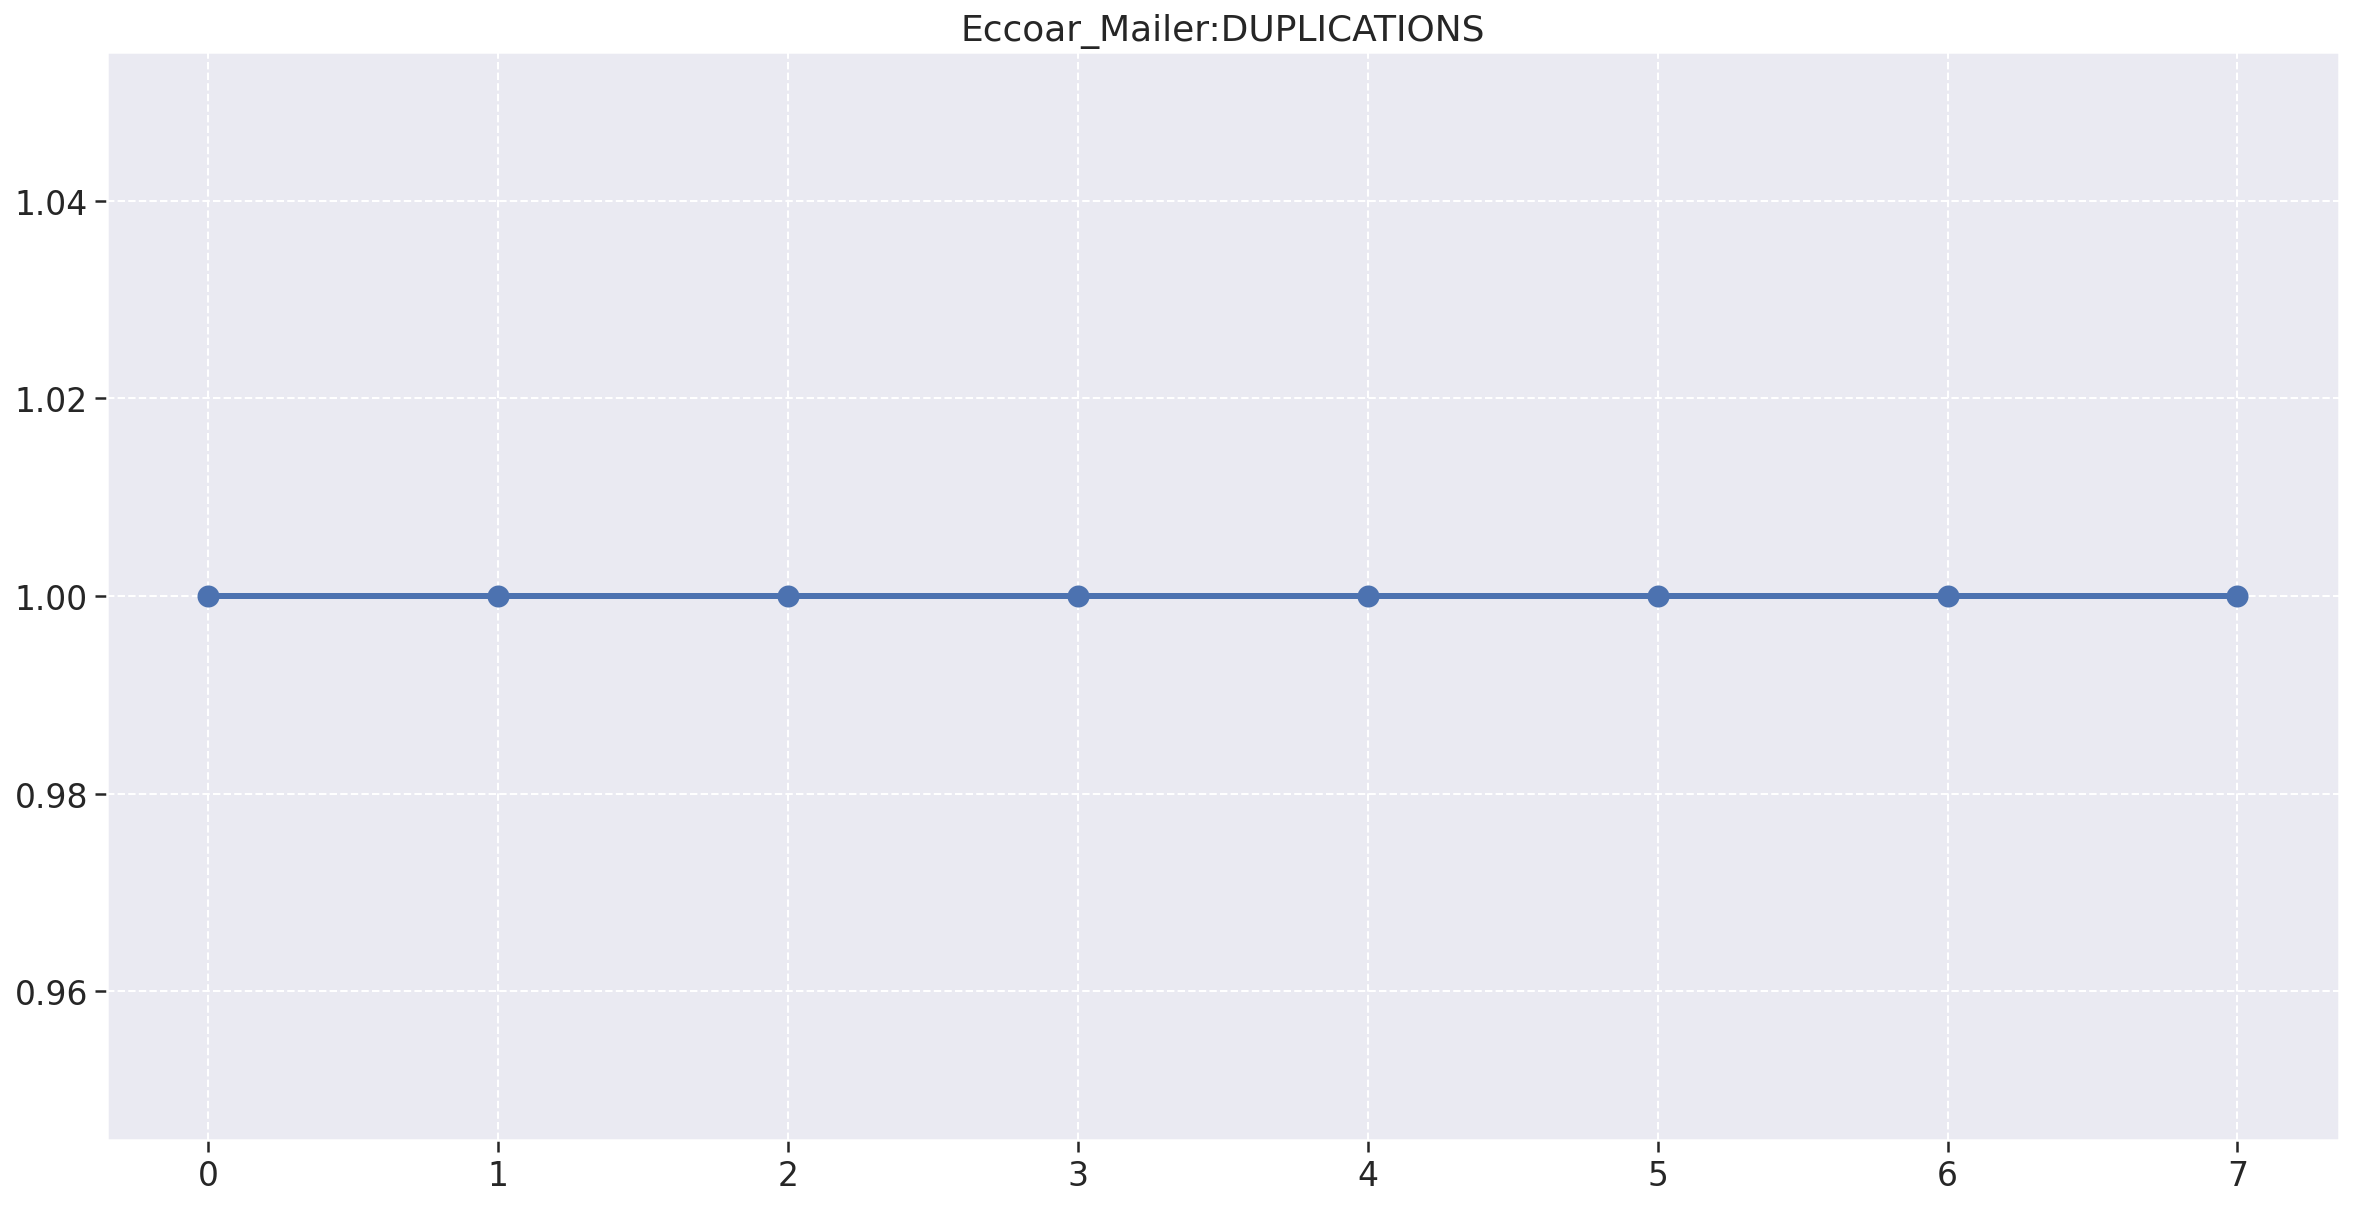

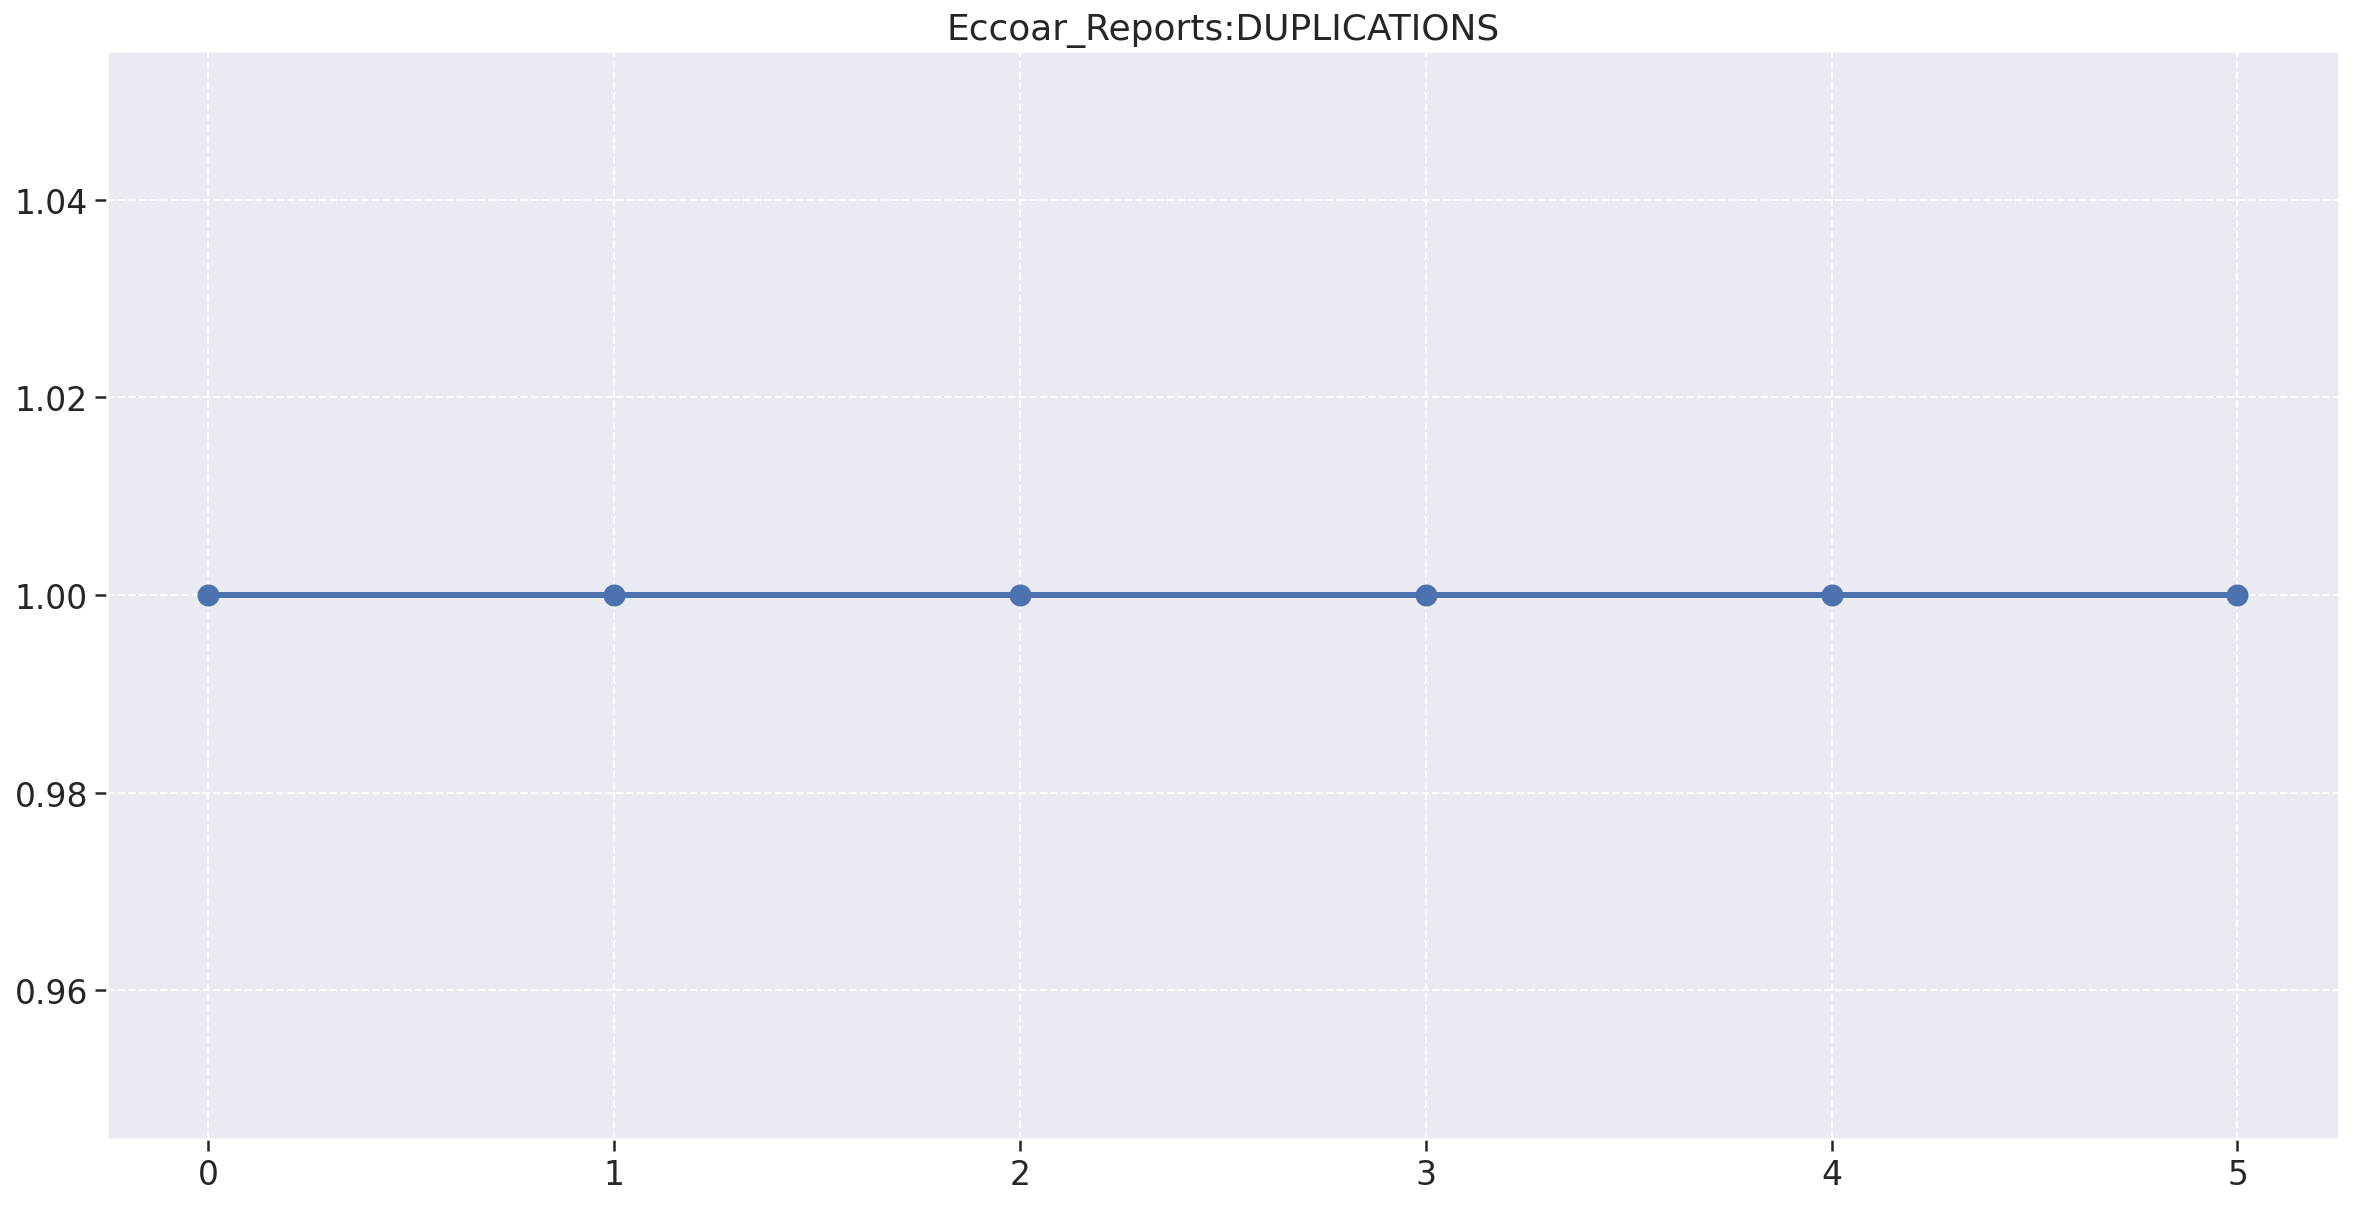

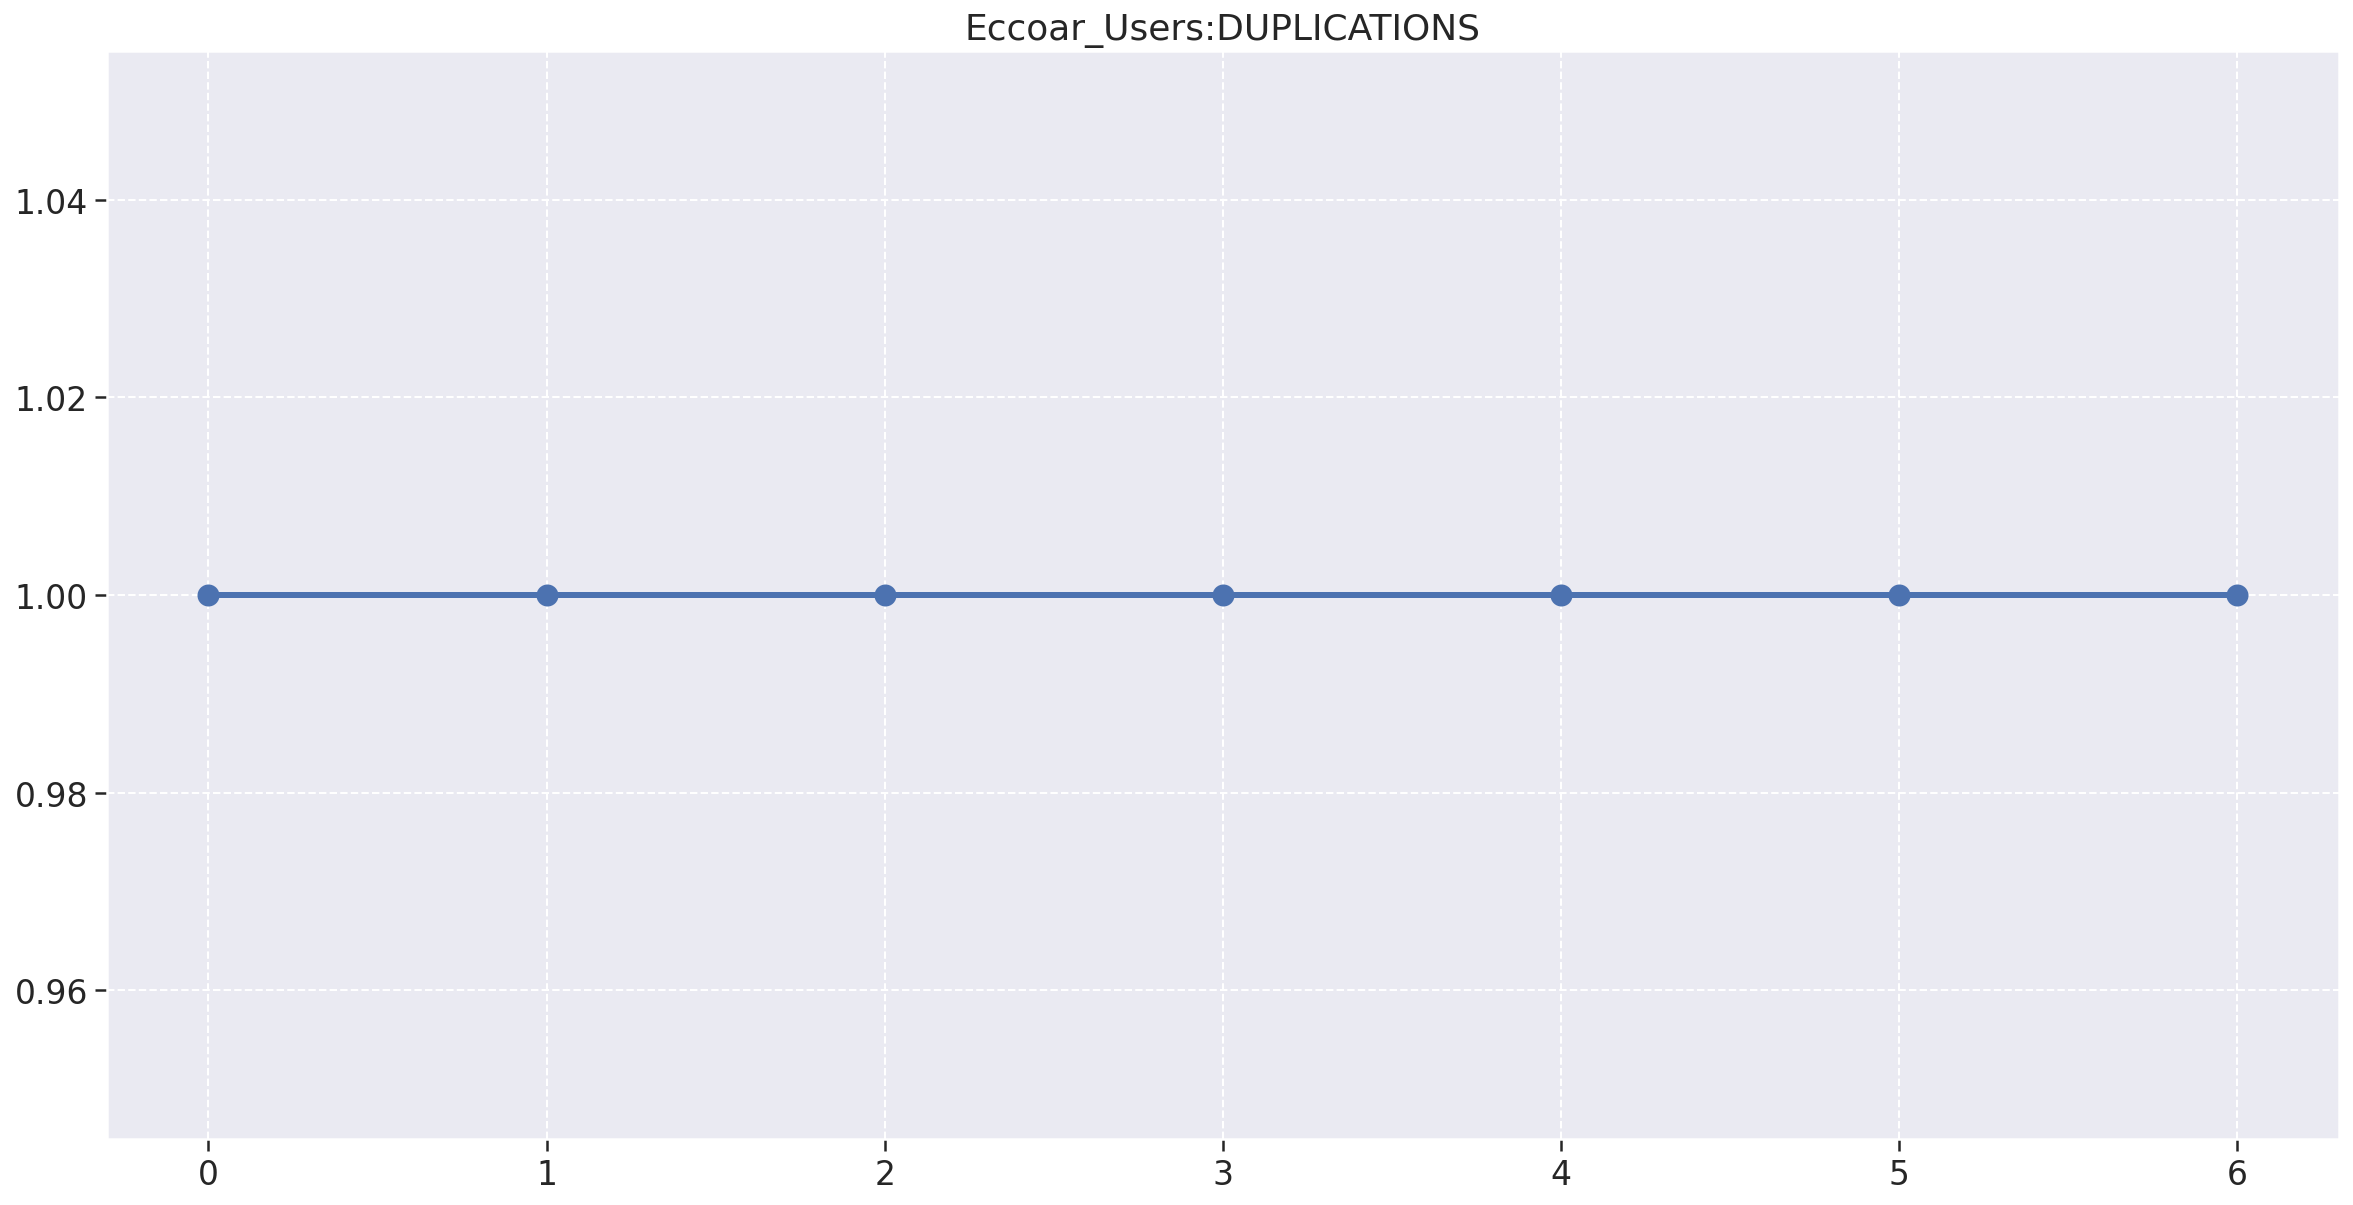

In [276]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [277]:
psc2 = 1
pm7 = 0.5
pm9 = 0.5

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc2'] = ((metrics_df['m7']*pm7)+(metrics_df['m9']*pm9))*psc2

In [278]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

for repository, metrics_df in repository_metrics.items(): 
    metrics_df['asc1'] = ((metrics_df['m1']*pm1)+(metrics_df['m2']*pm2)+(metrics_df['m3']*pm3))*psc1

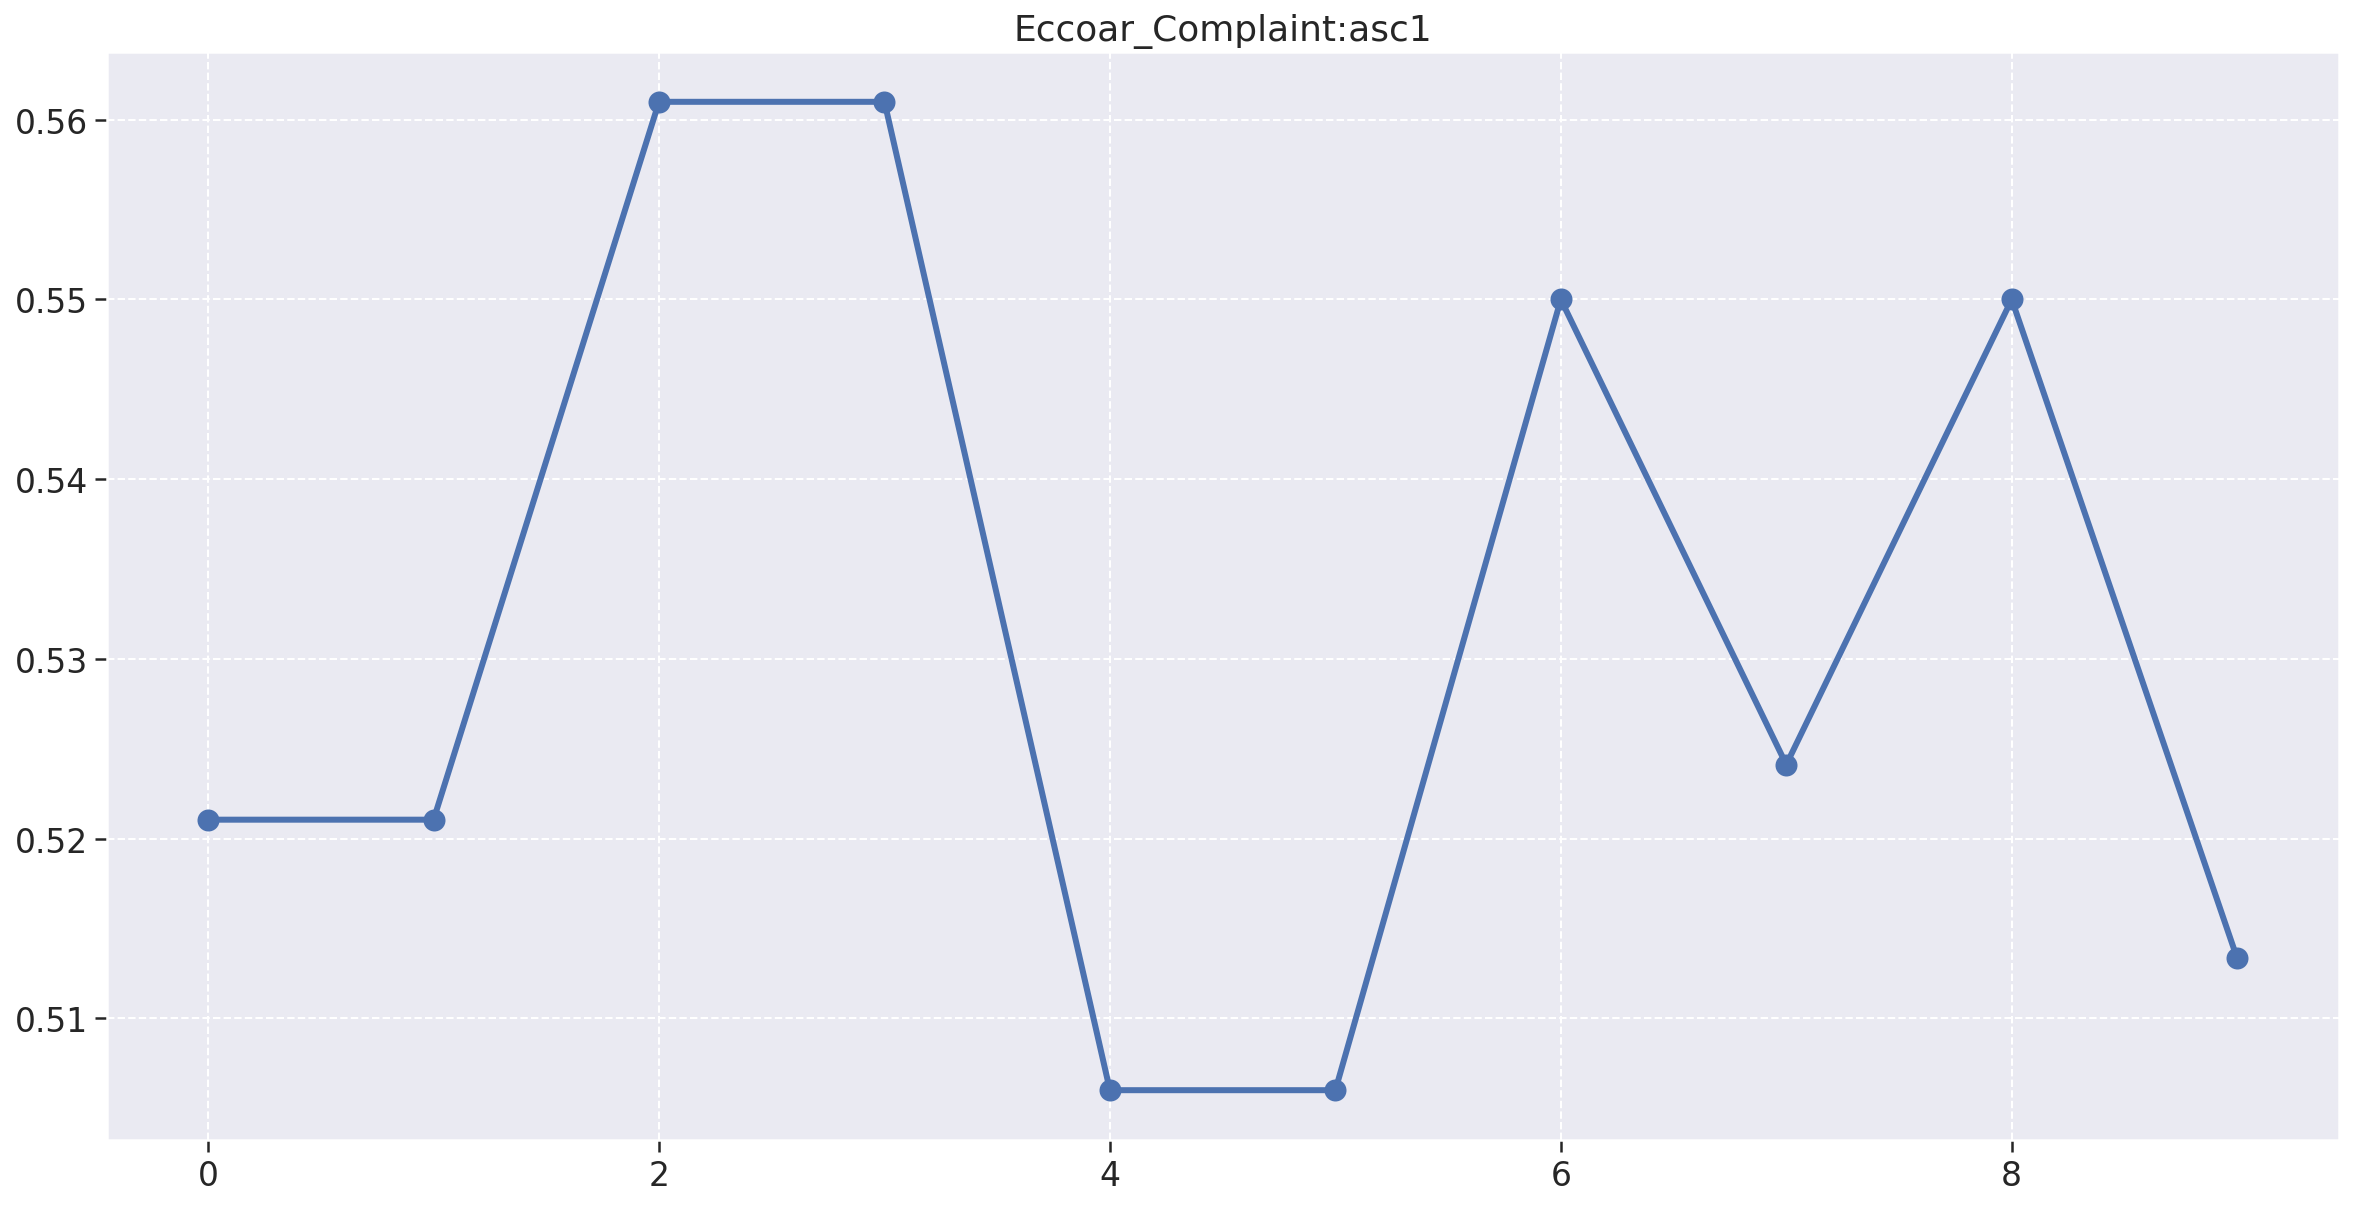

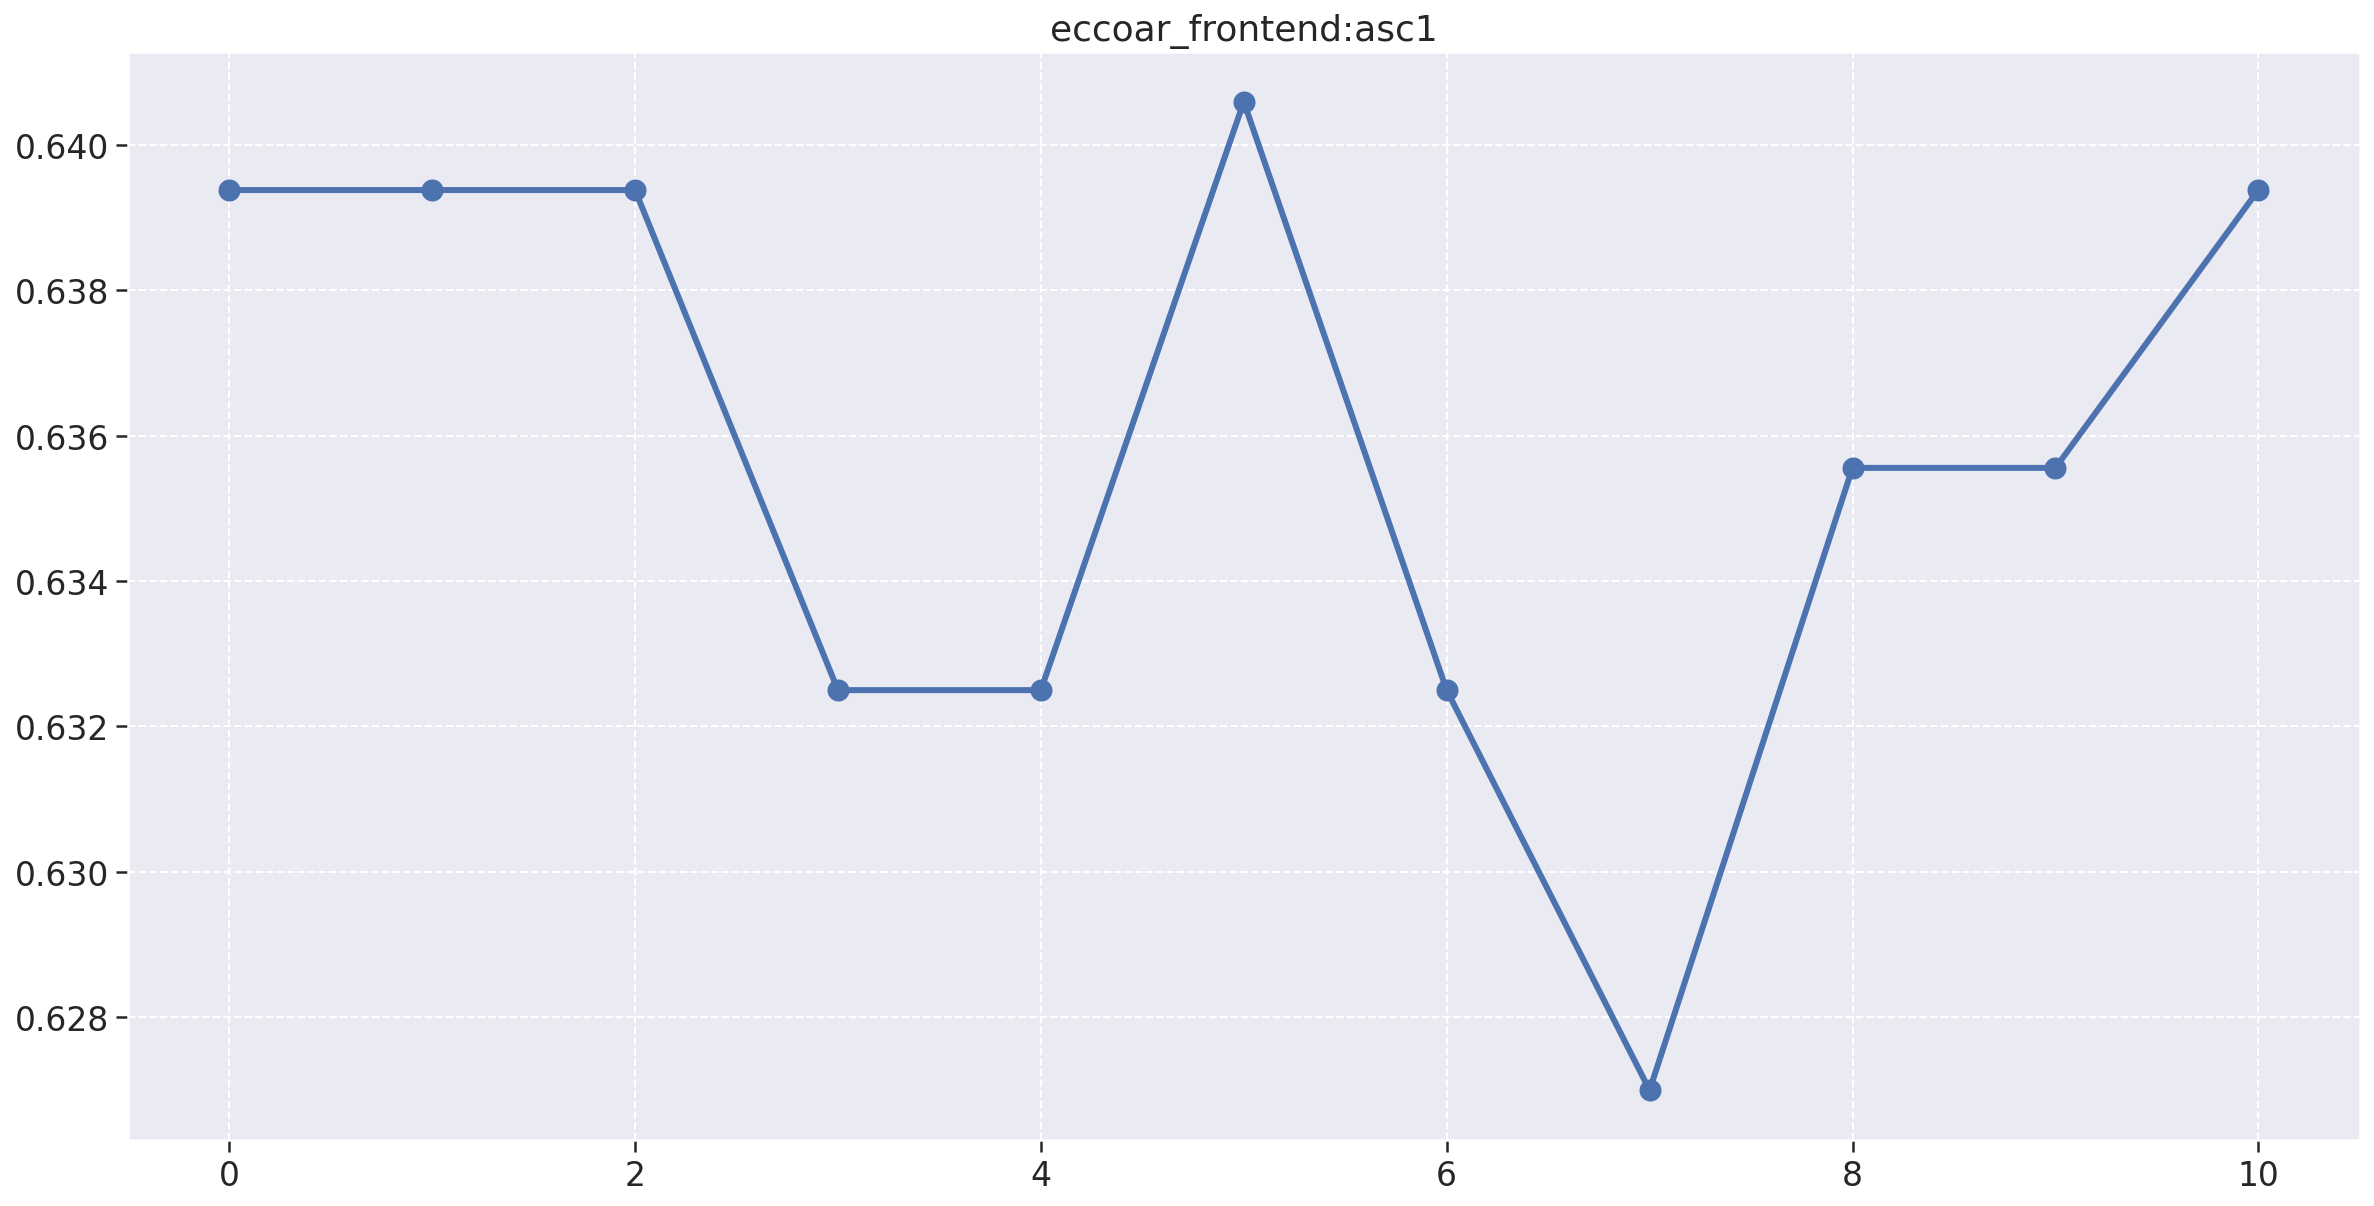

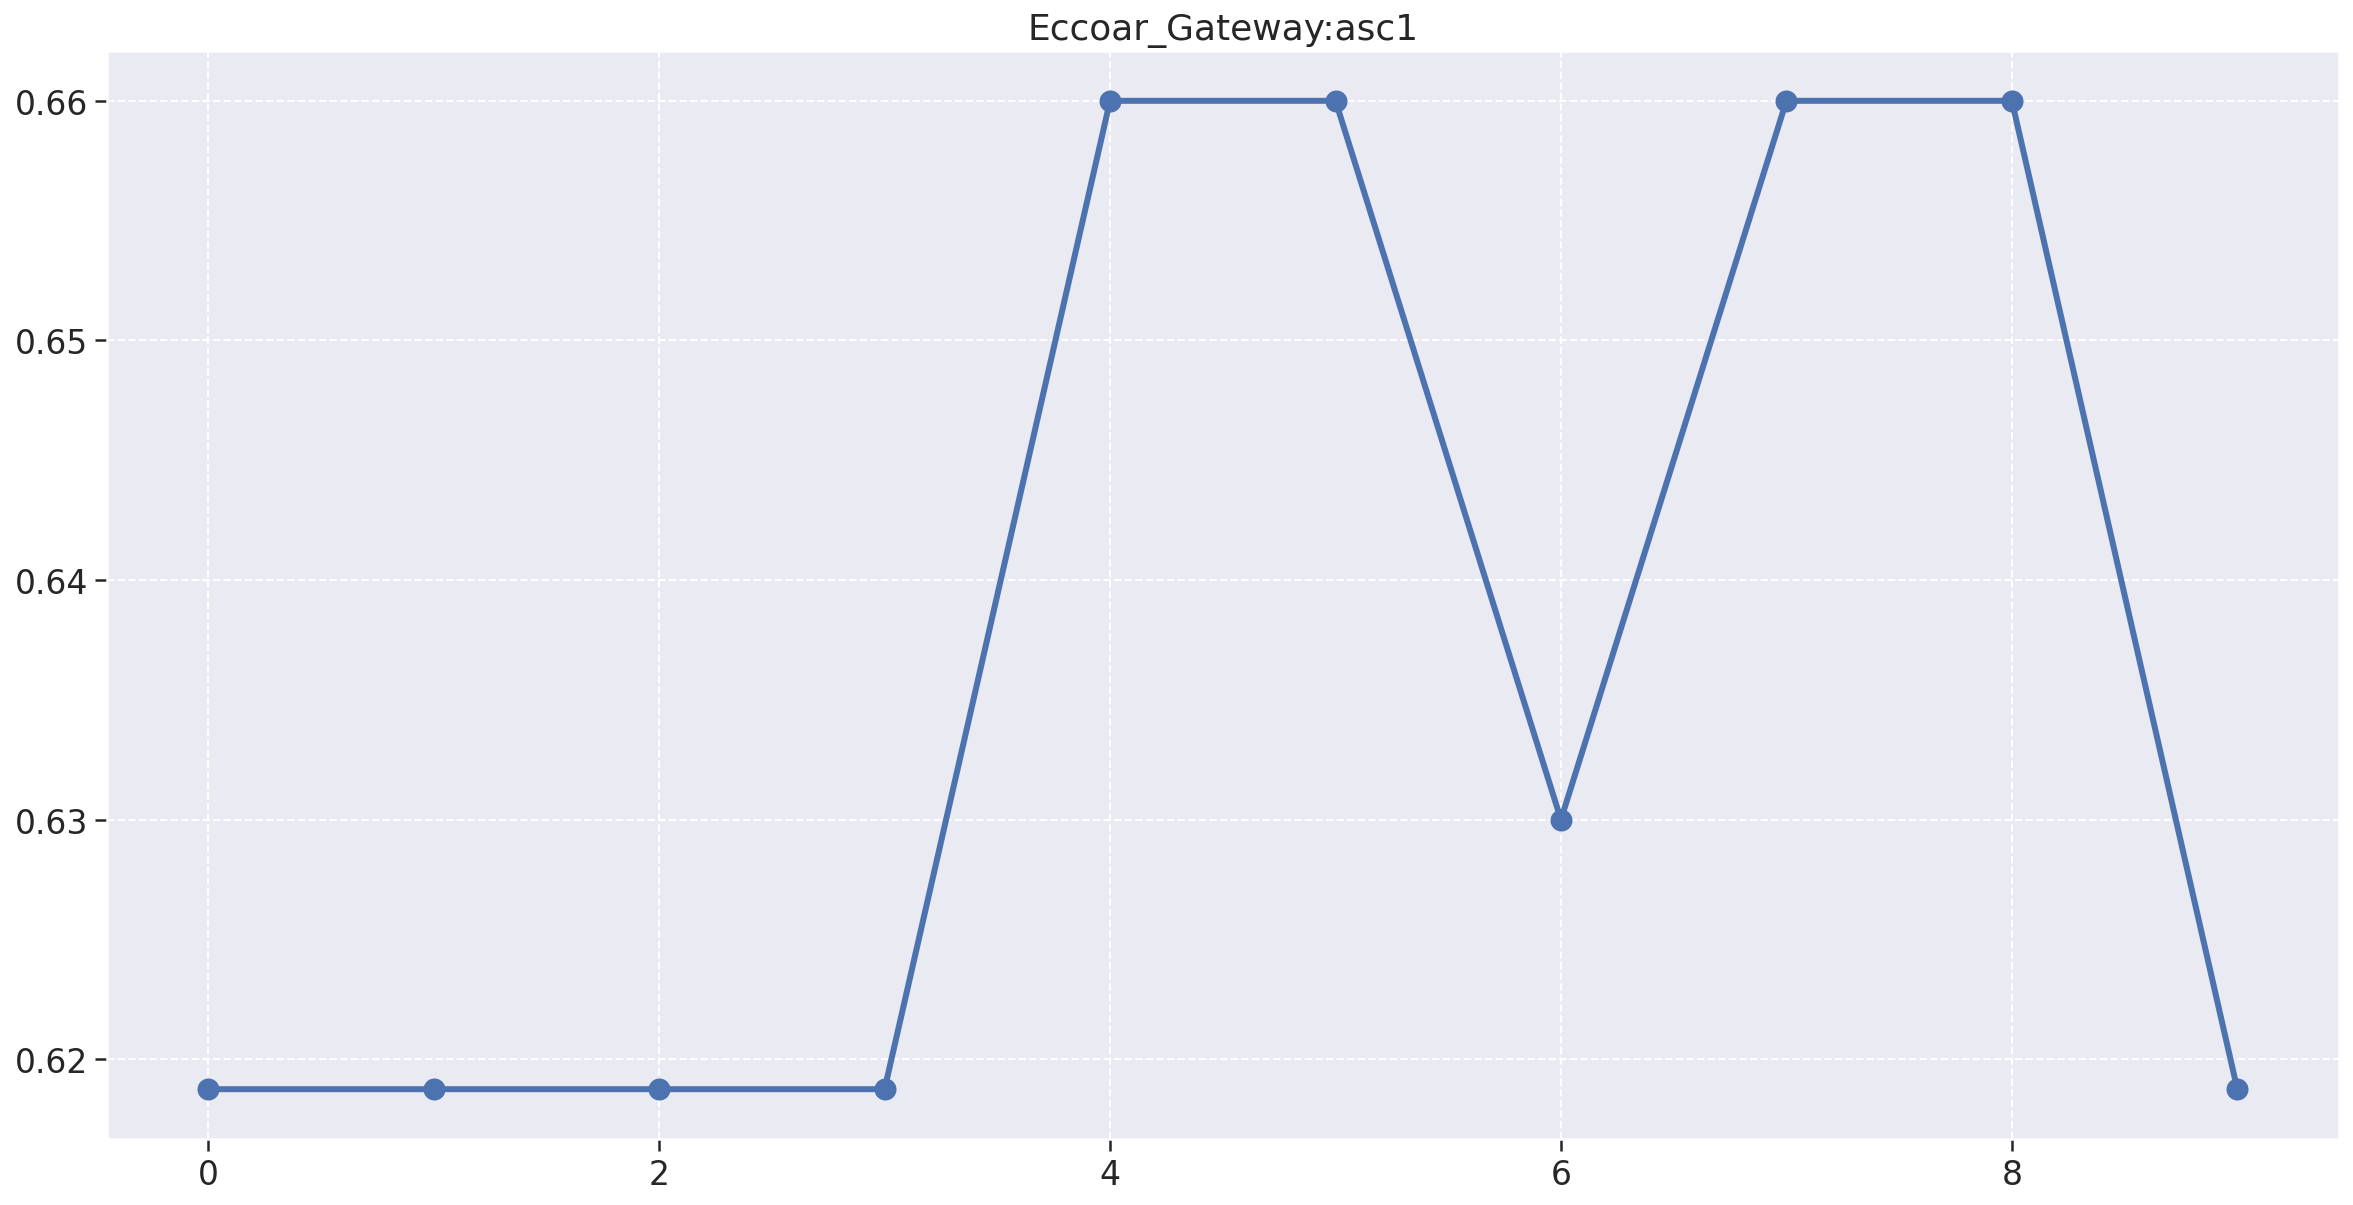

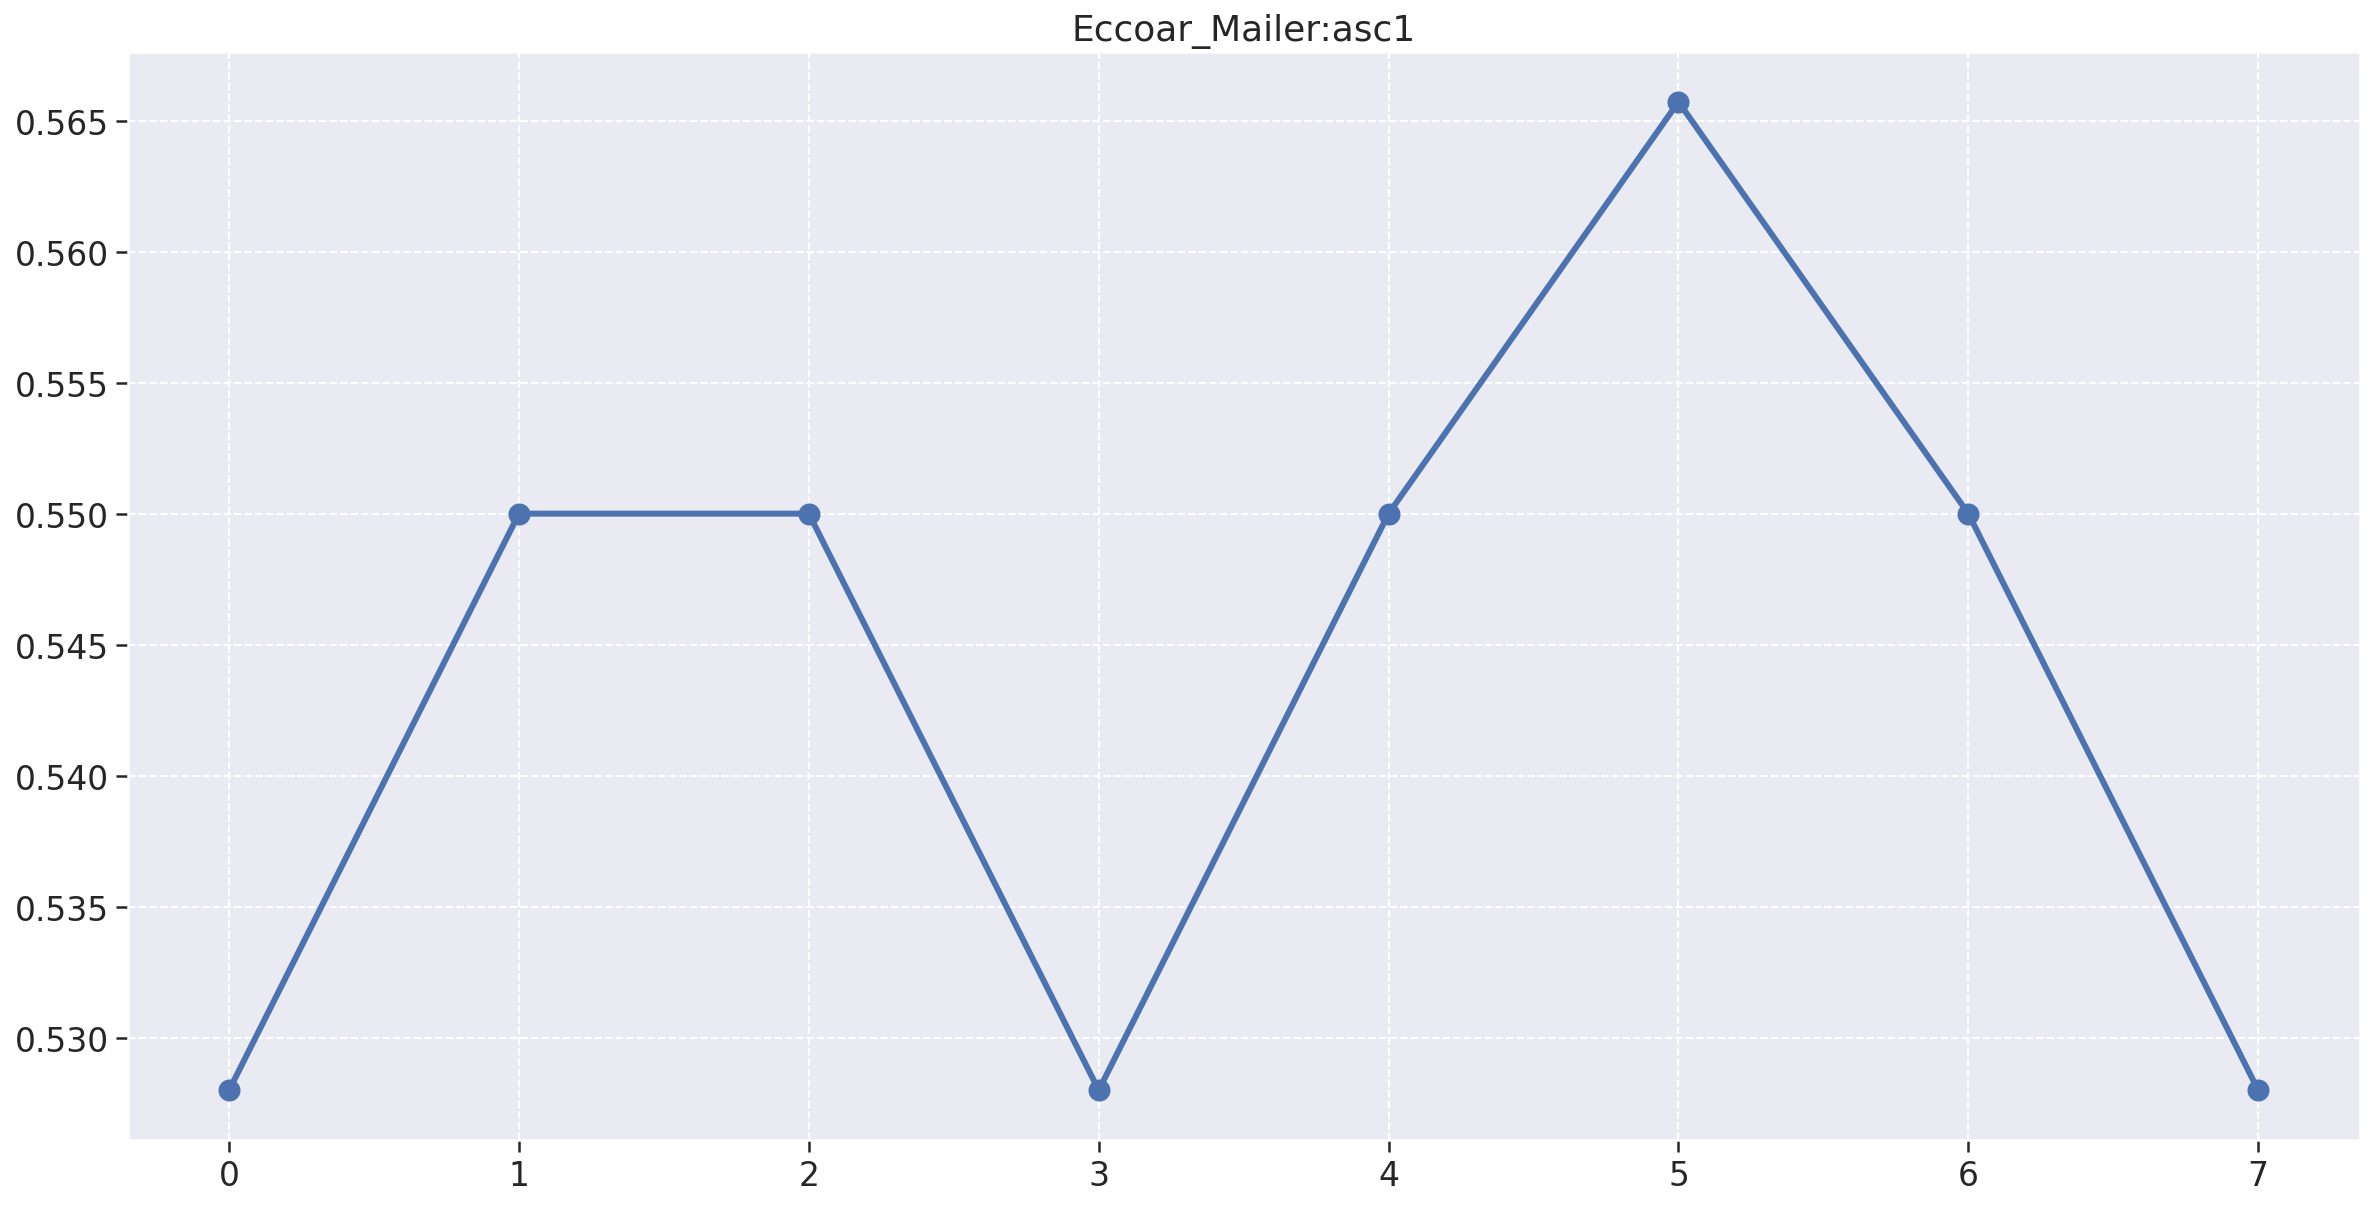

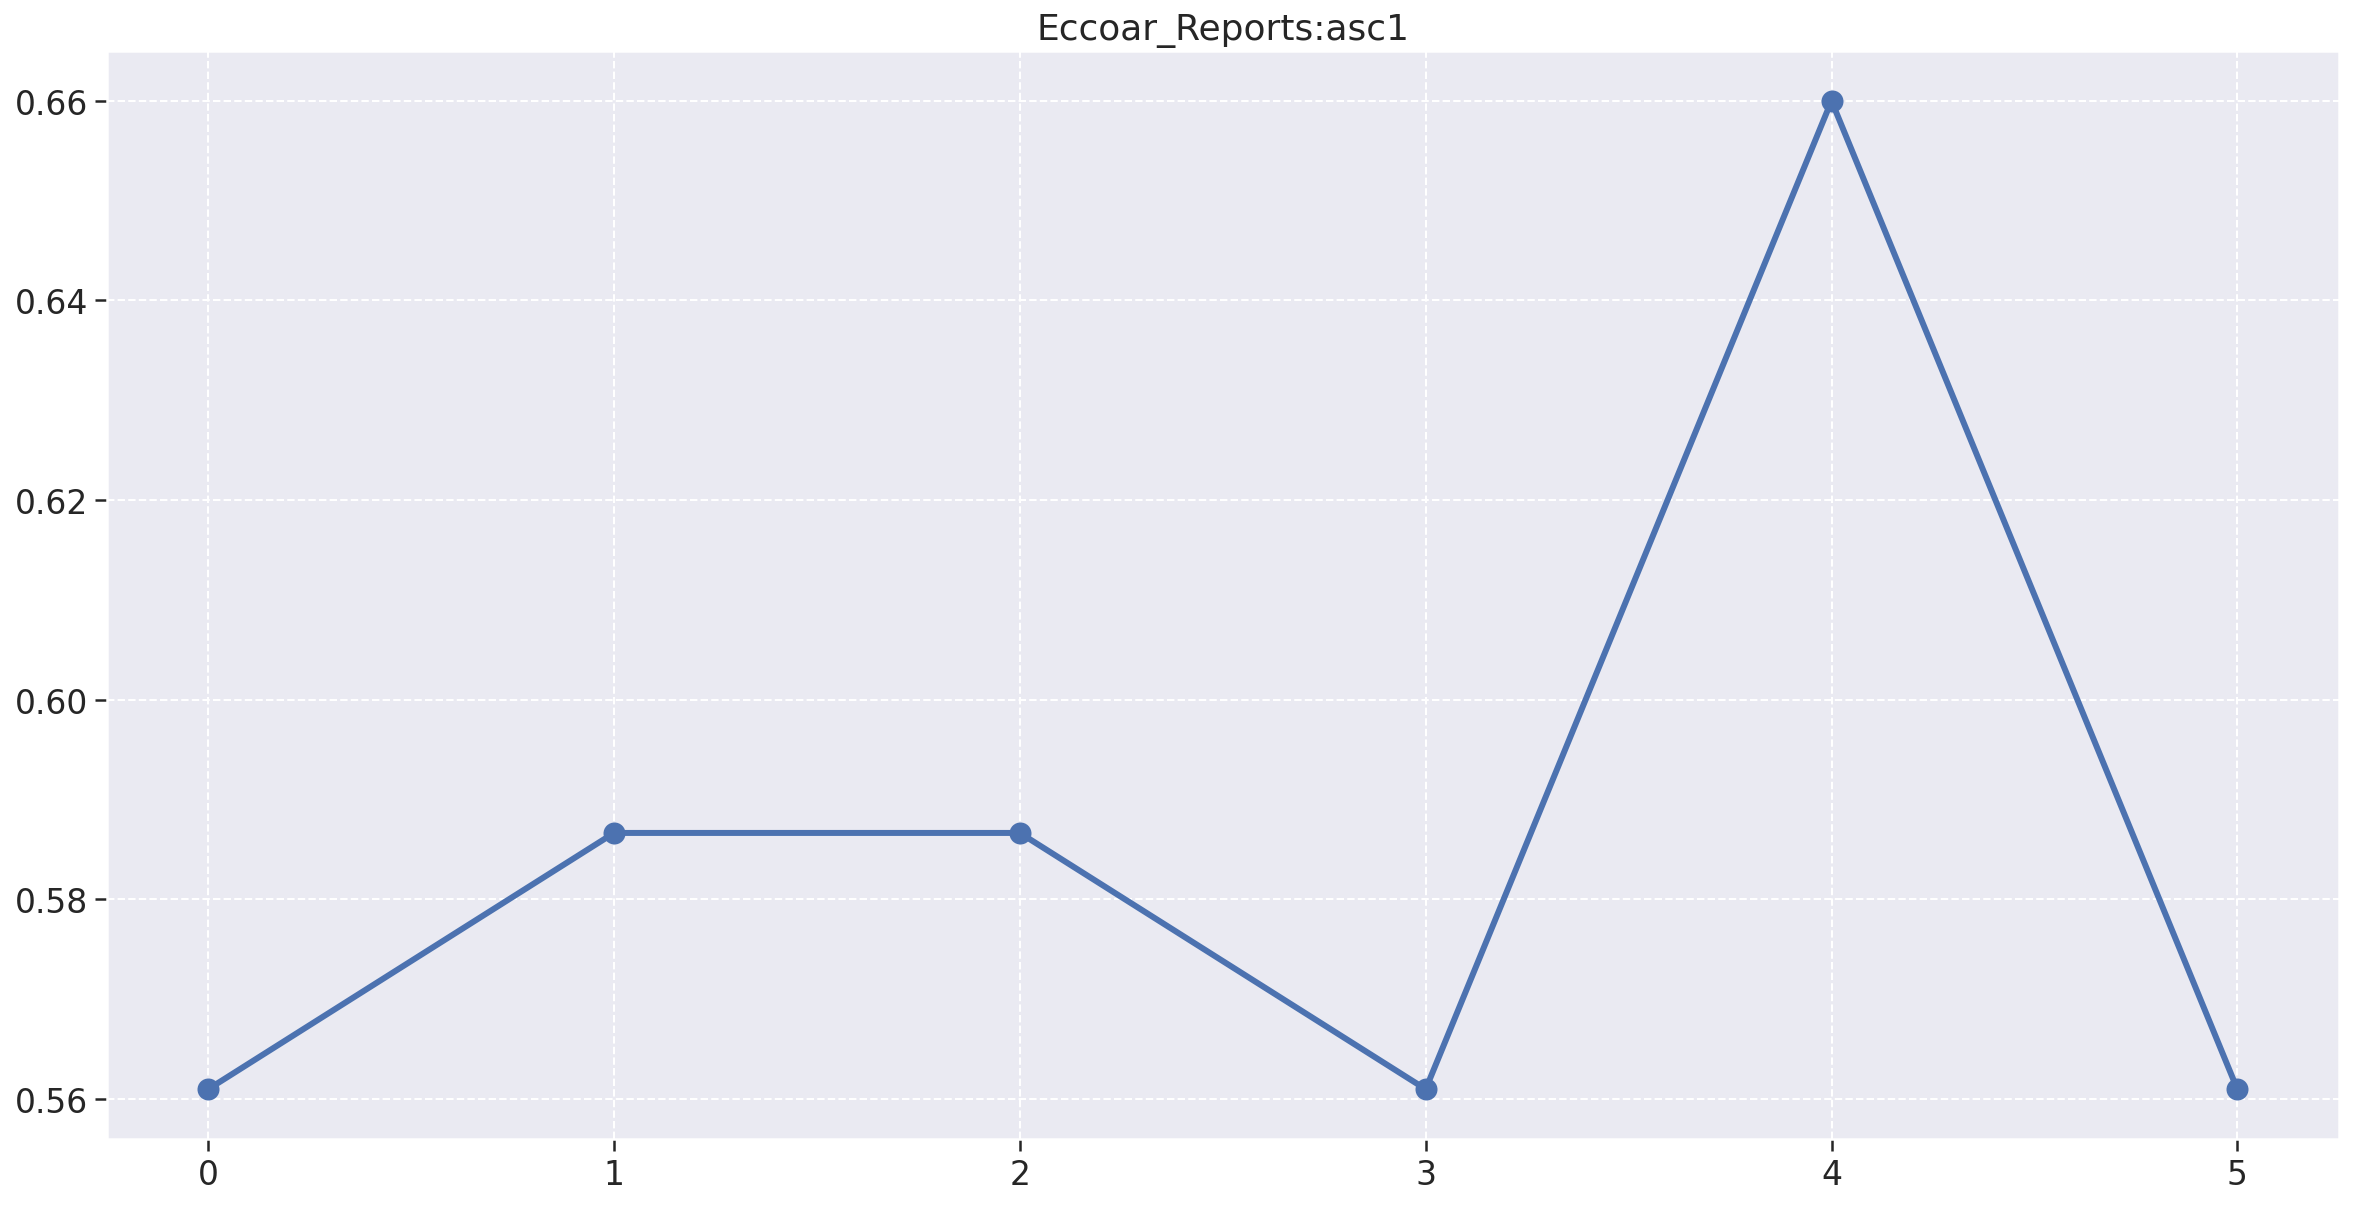

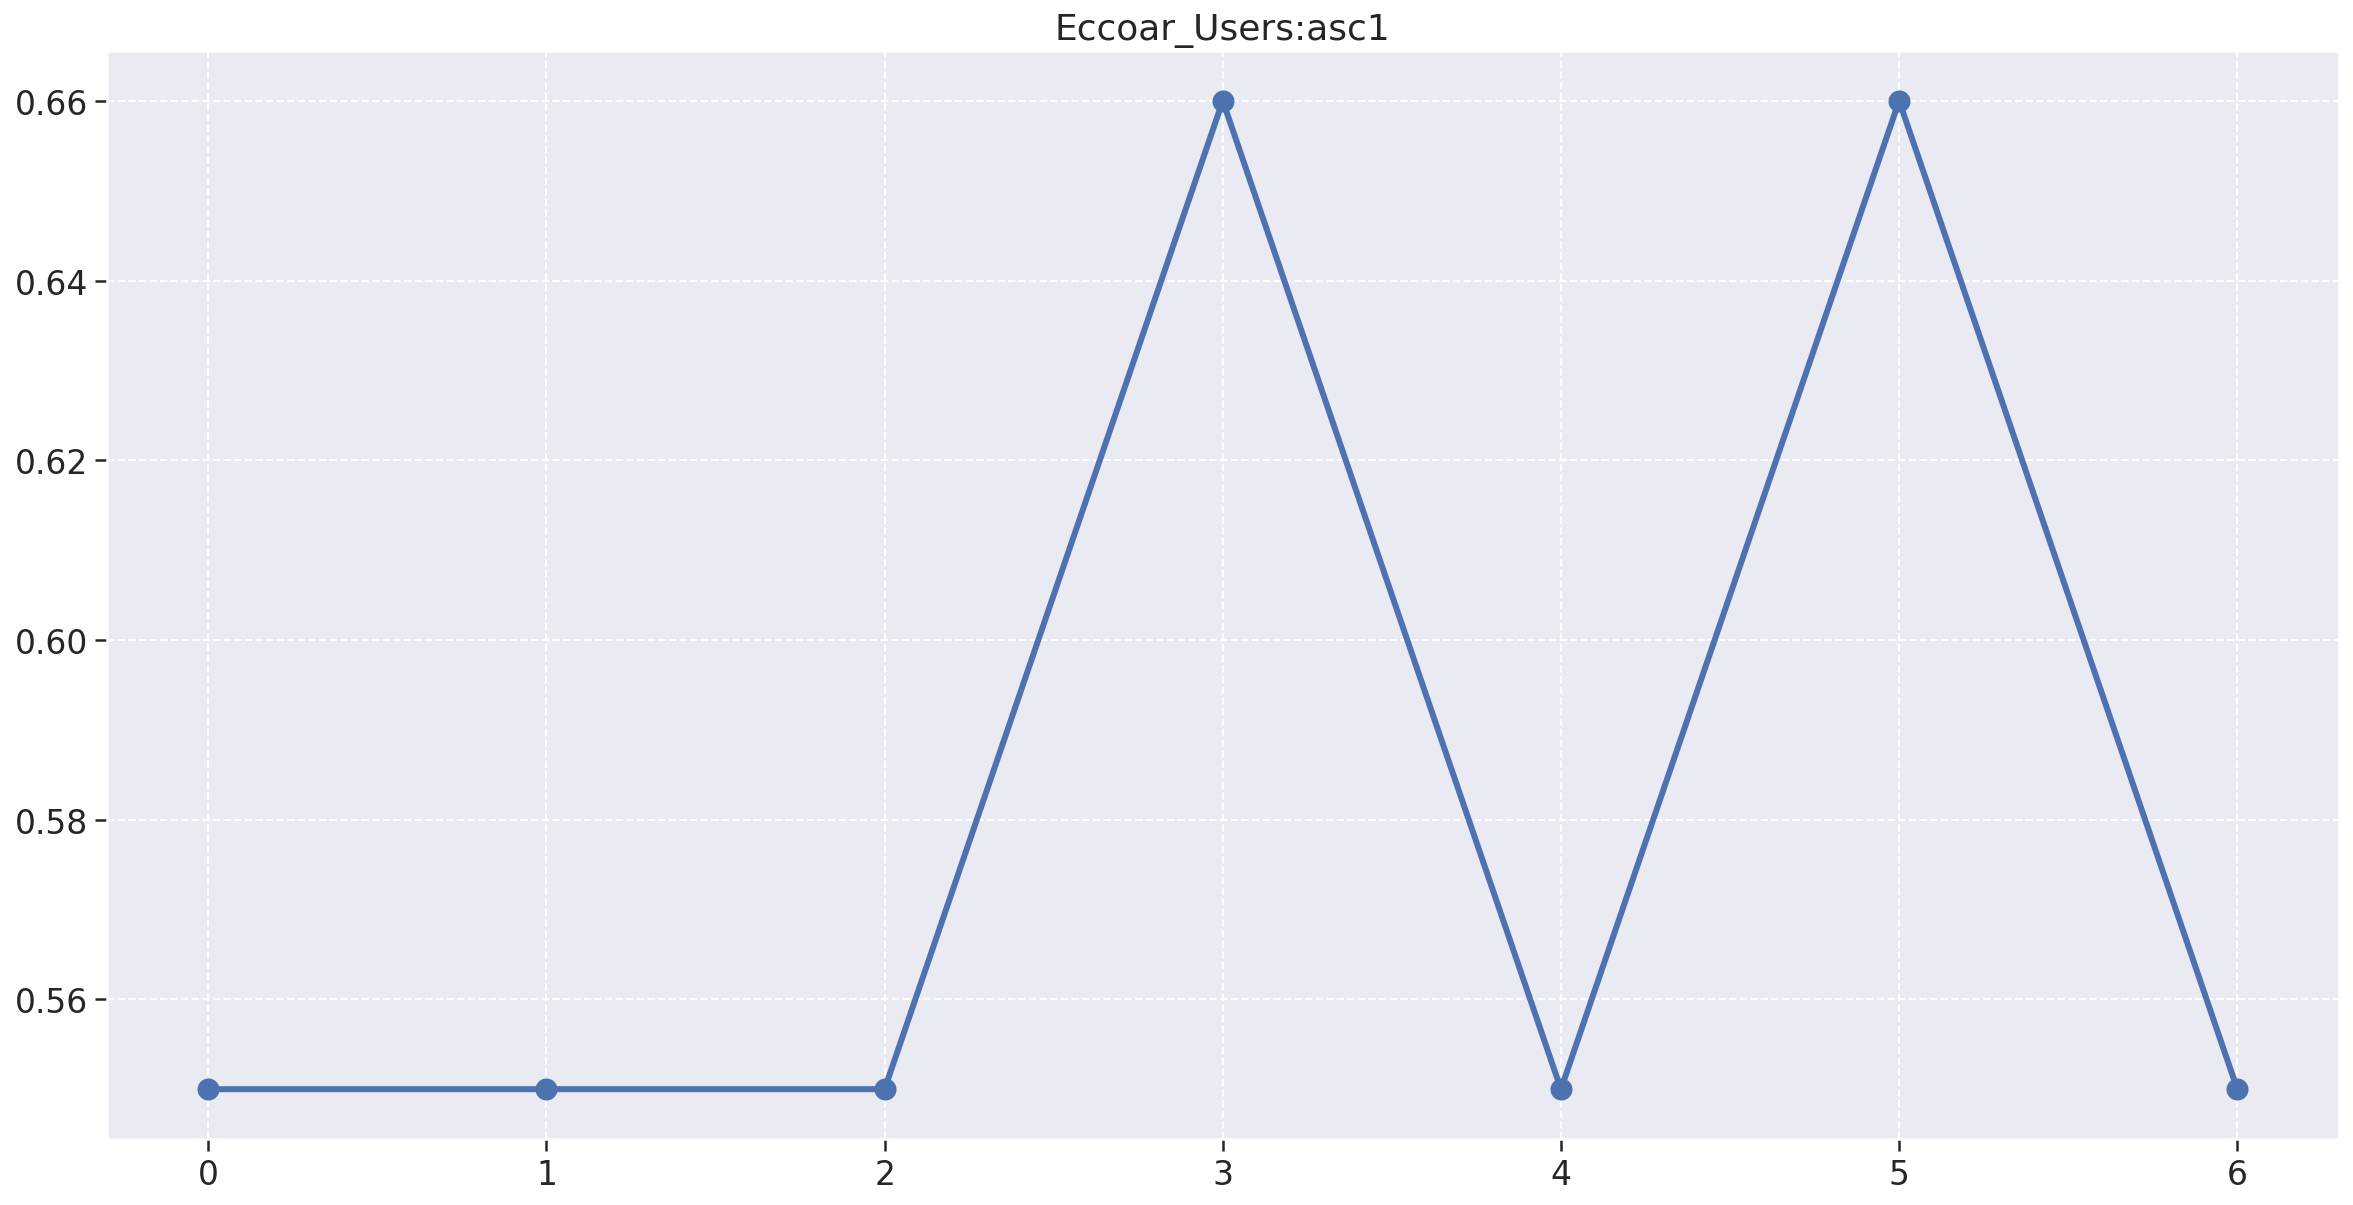

In [279]:
for repository, metrics_df in repository_metrics.items(): 
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:asc1")
    plt.plot(metrics_df['asc1'], linewidth=3, marker='o', markersize=10)

In [283]:
#fig = plt.figure(figsize=(20, 10))

#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=10)

In [284]:
#fig = plt.figure(figsize=(20, 10))


#plt.plot(repo1['asc1'], linewidth=3, marker='o', markersize=5)
#plt.plot(repo2['asc1'], linewidth=3, marker='o', markersize=5)
...

Ellipsis

In [285]:
#metrics_df = pd.concat([repo1_metrics, repo2_metrics, ...], ignore_index=True)

#metrics_df['ac1'] = metrics_df['asc1'] * 1
#metrics_df['total'] = metrics_df['asc1'] * 1

# Histogram Repositories Analysis

In [286]:
for repository, metrics_df in repository_metrics.items():
    print()

In [287]:
def generate_histogram(metric, metric_name, color):
    for repository, metrics_df in repository_metrics.items():
        fig = plt.figure(figsize=(30, 10))
        plt.title(f"{repository}:{metric_name}")
        plt.bar(metrics_df['version'], metrics_df[metric], color=color)
        plt.show()

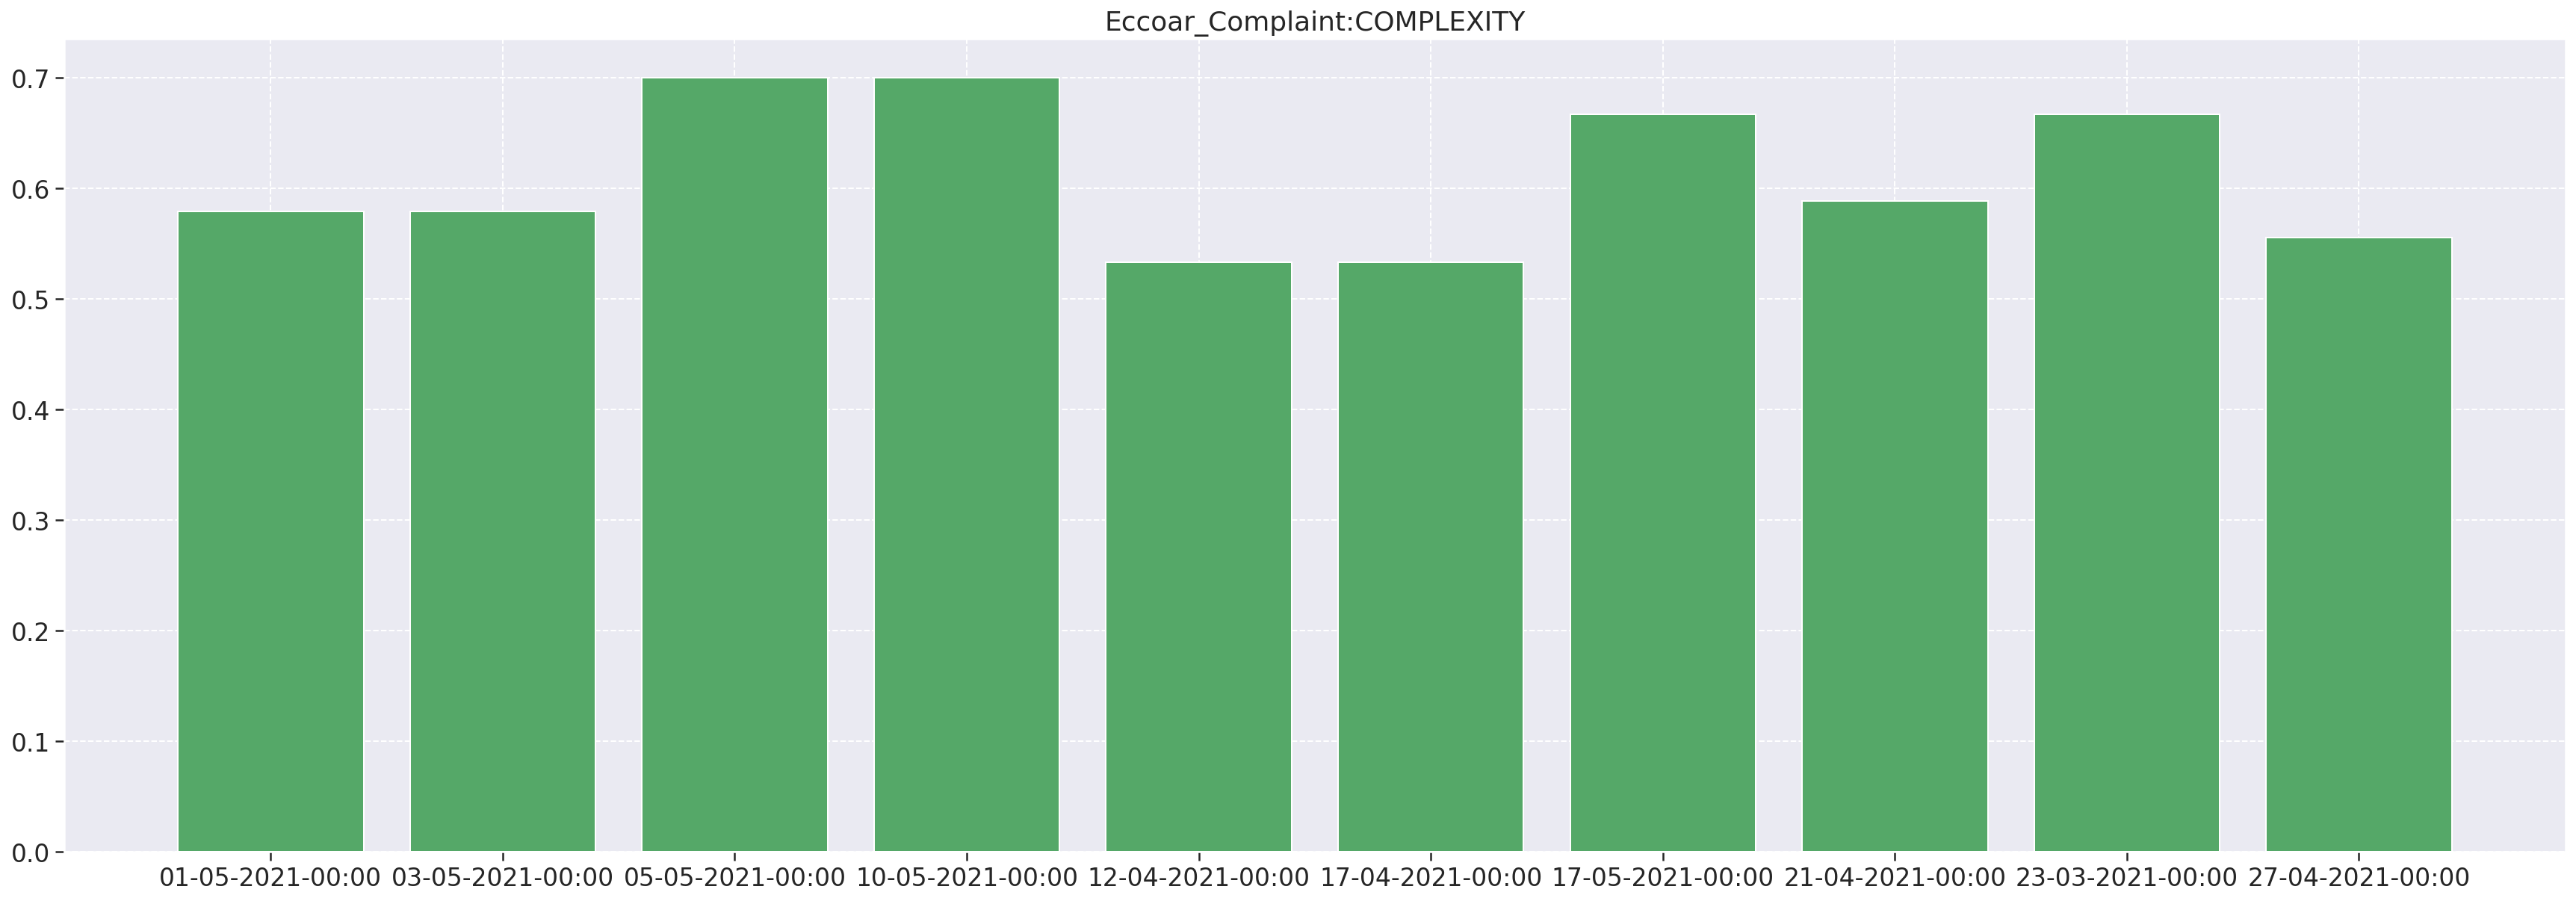

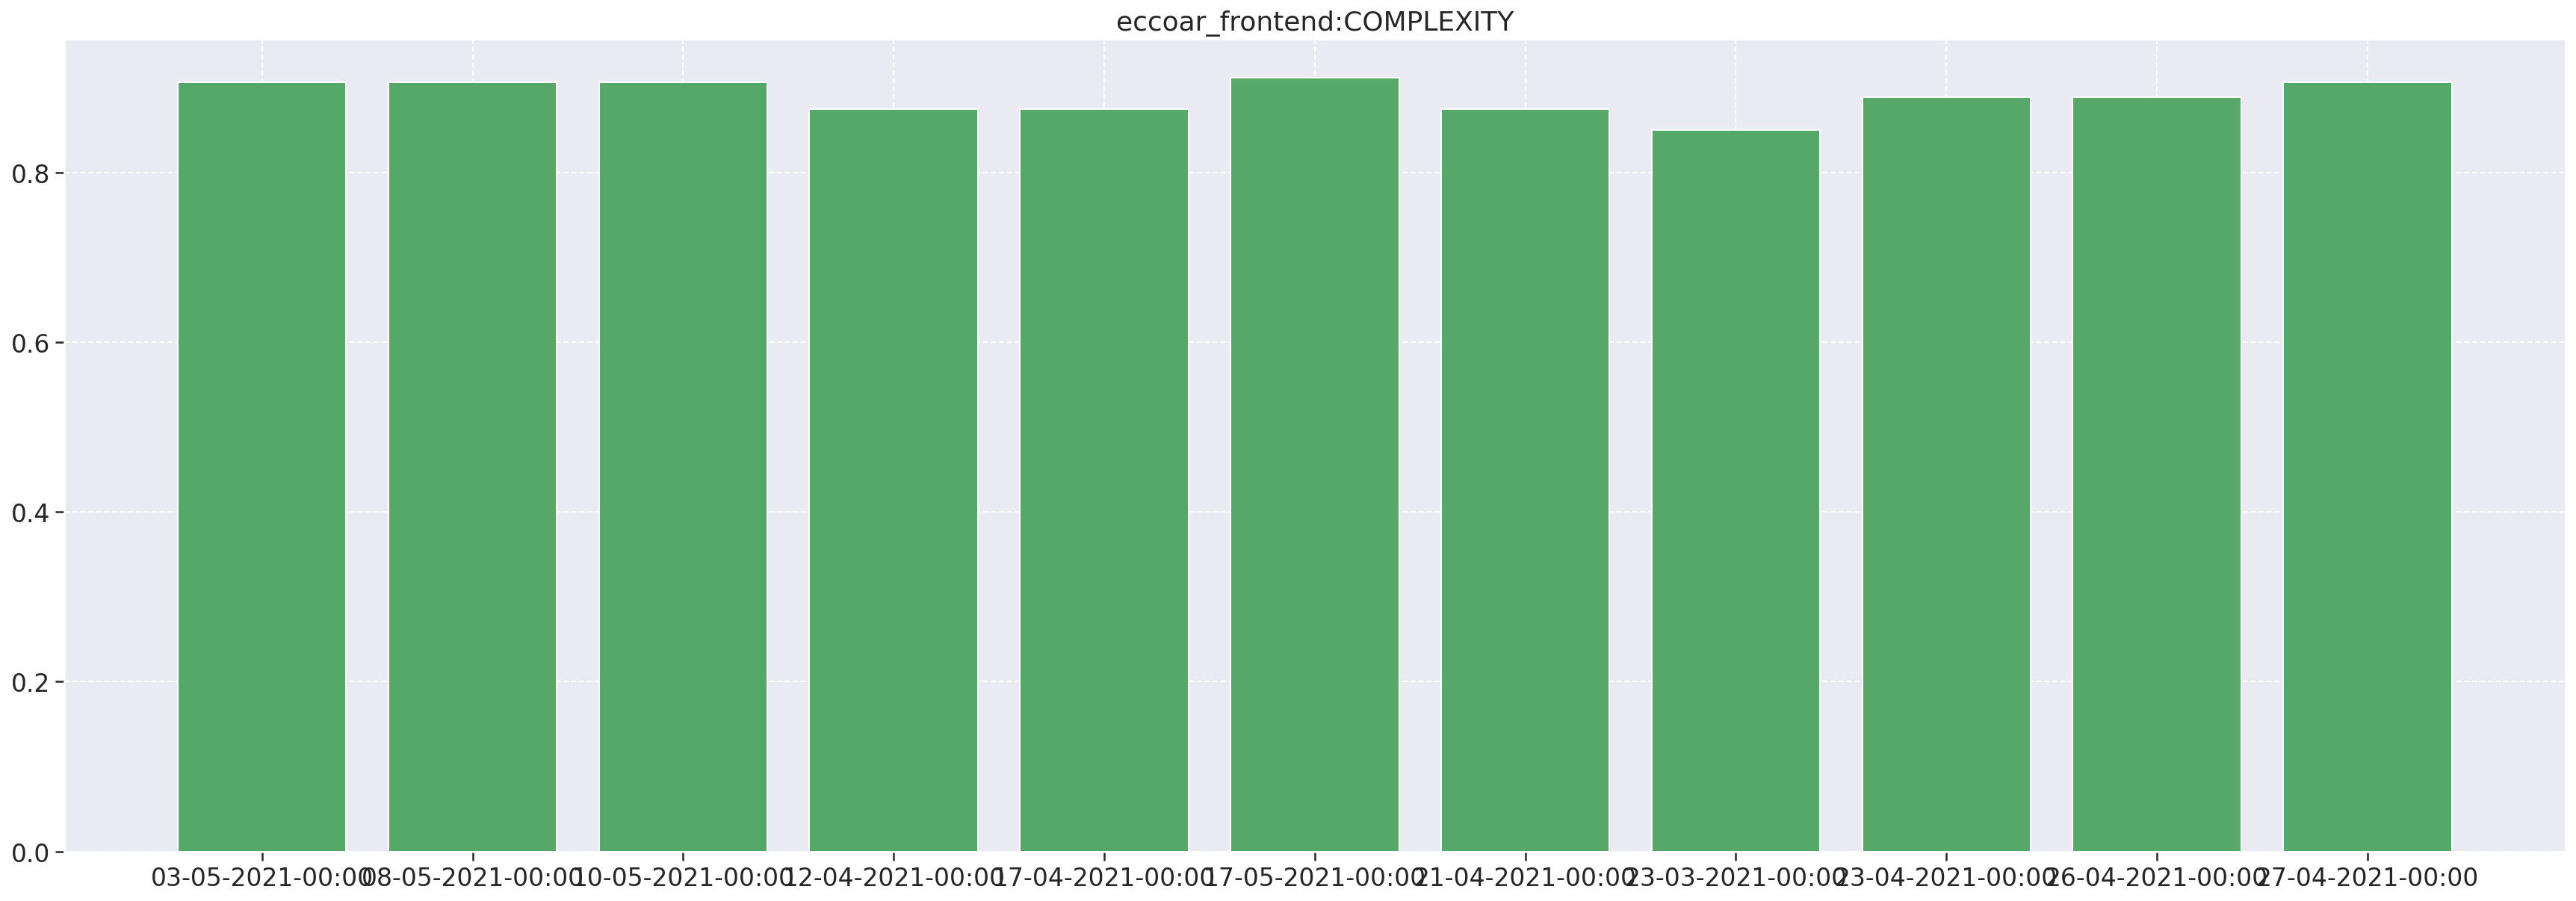

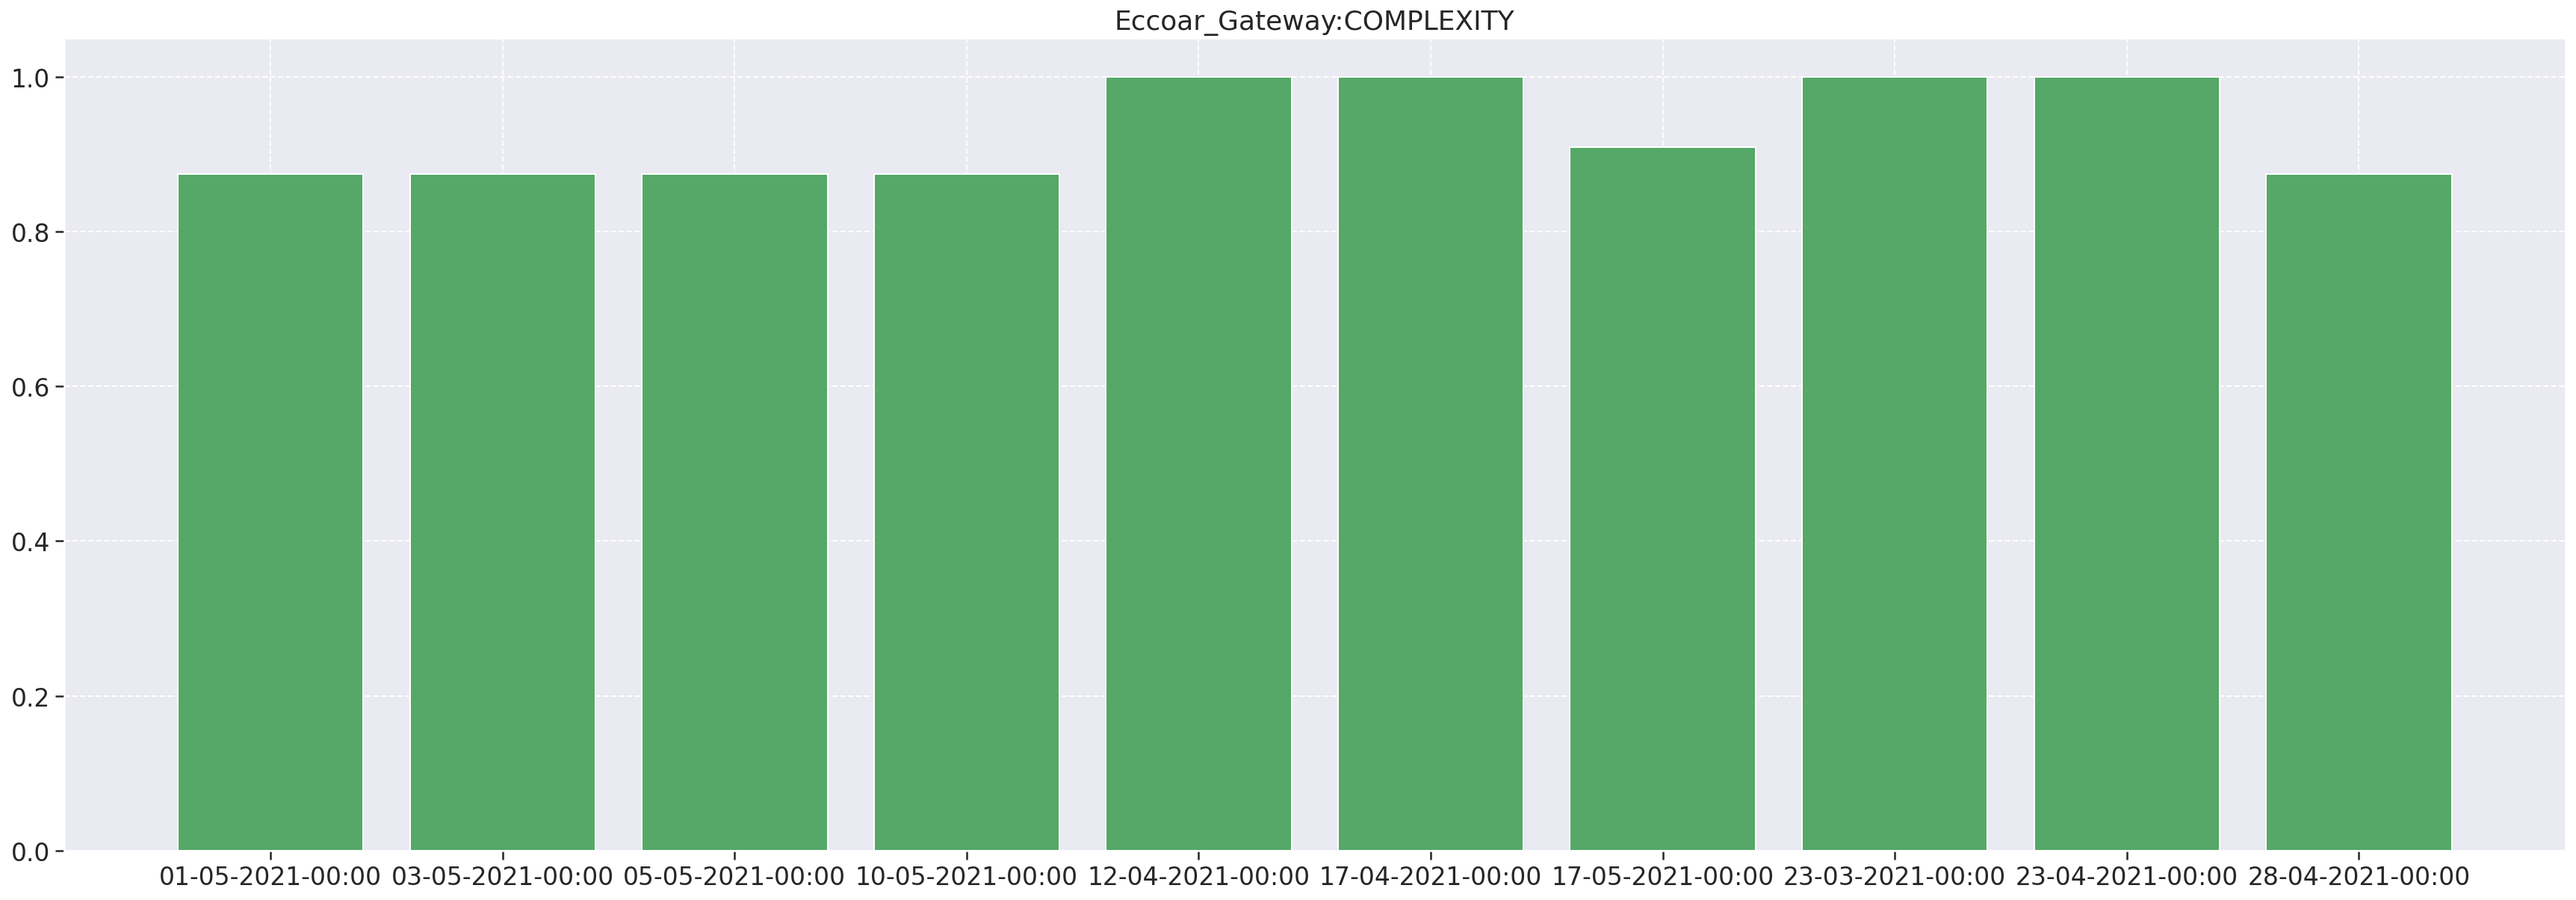

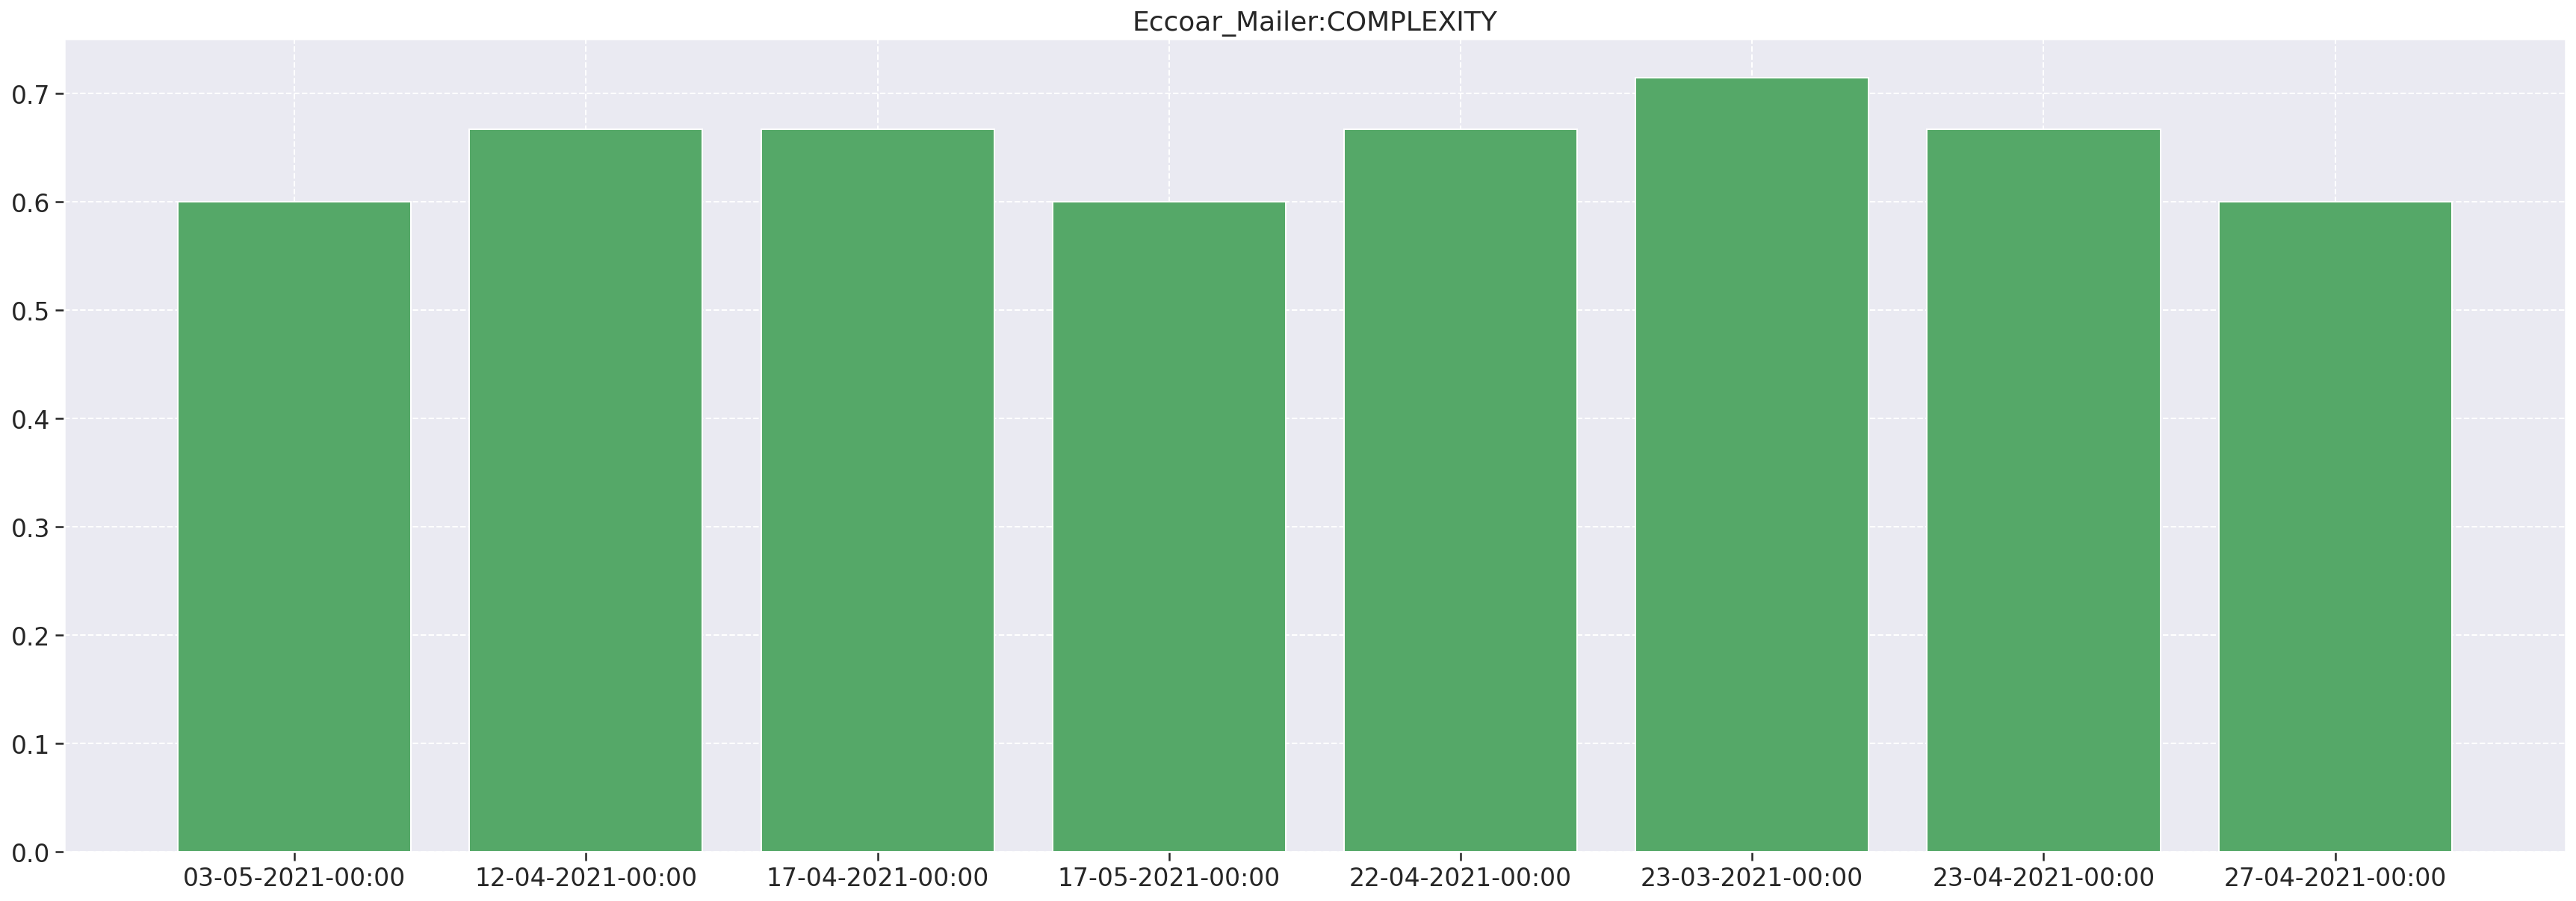

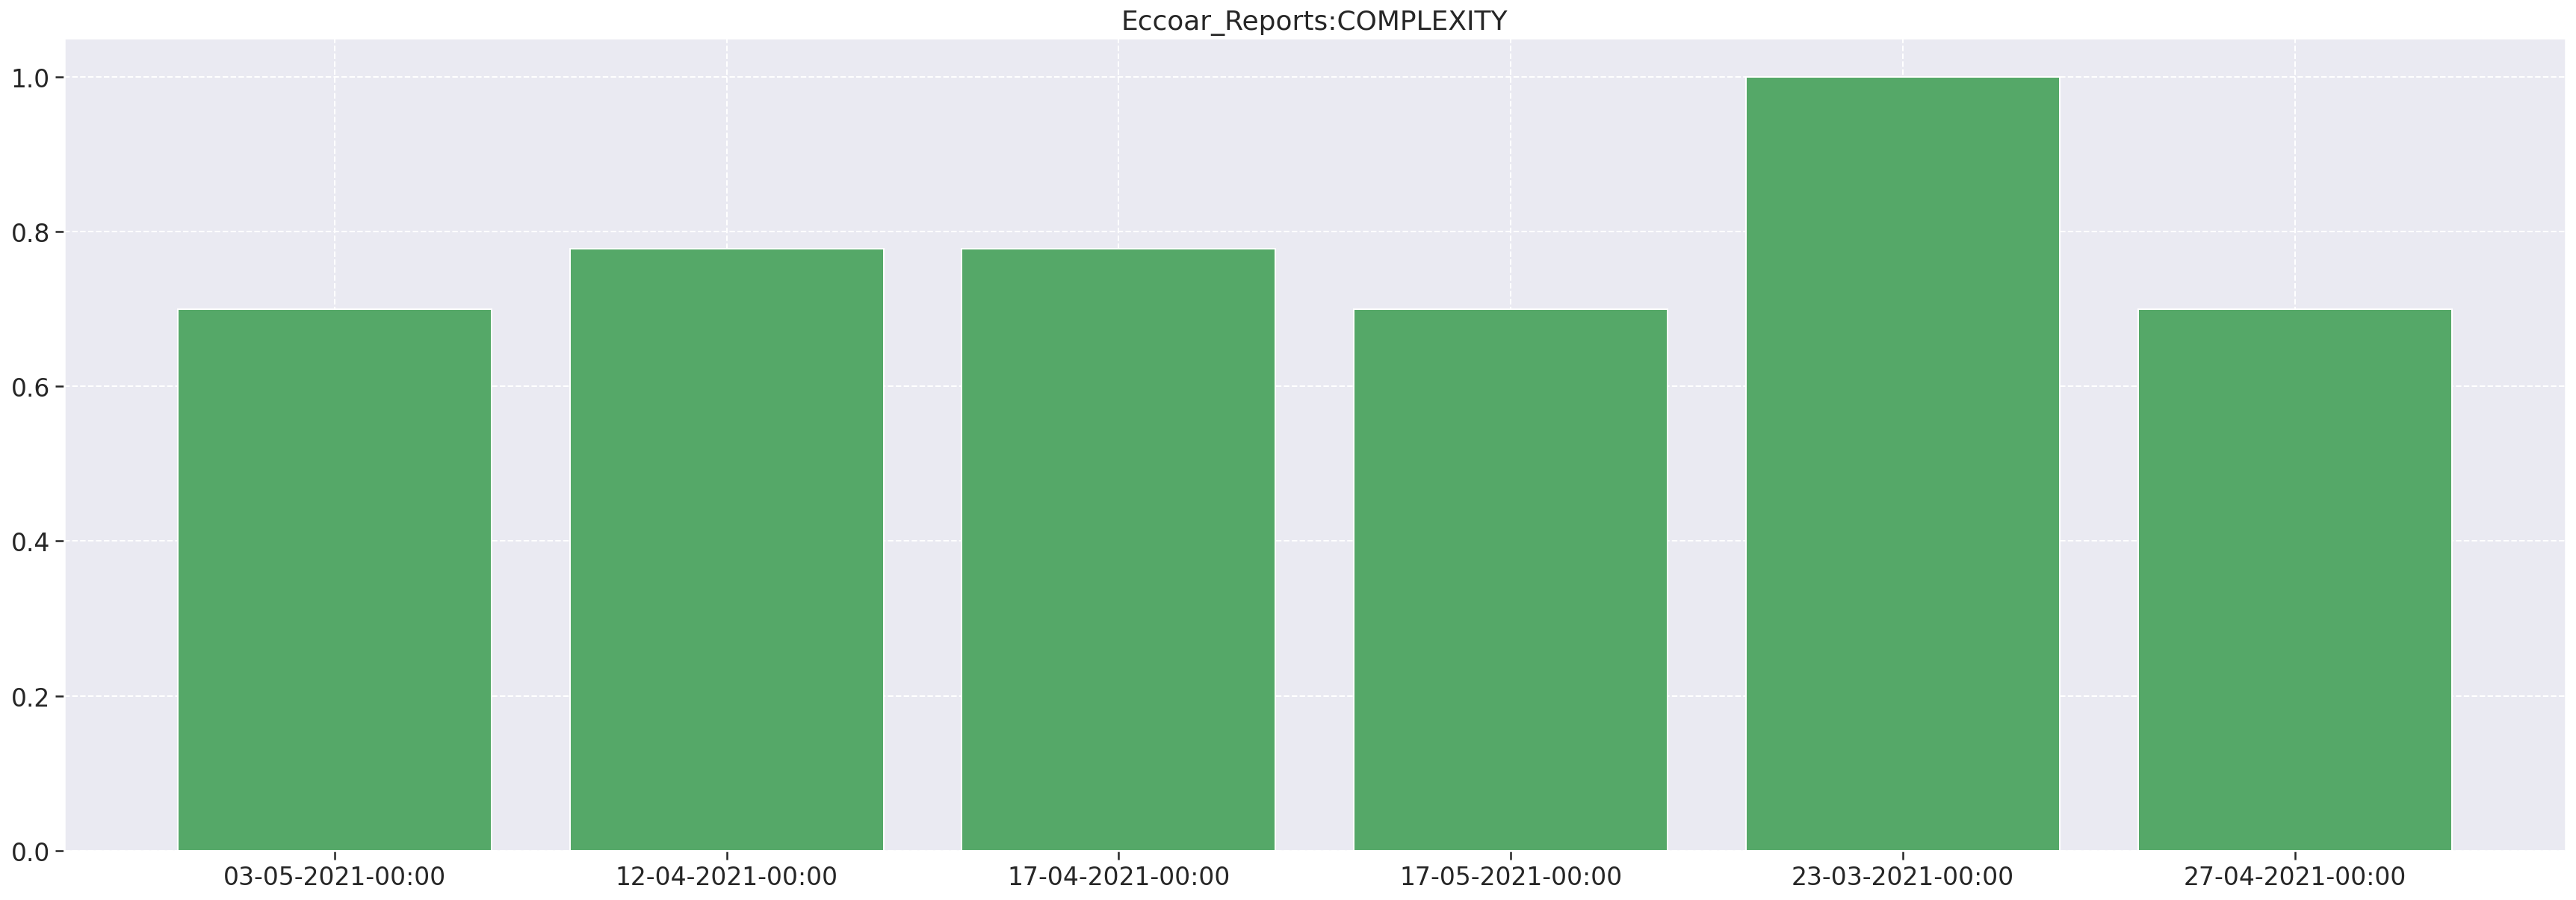

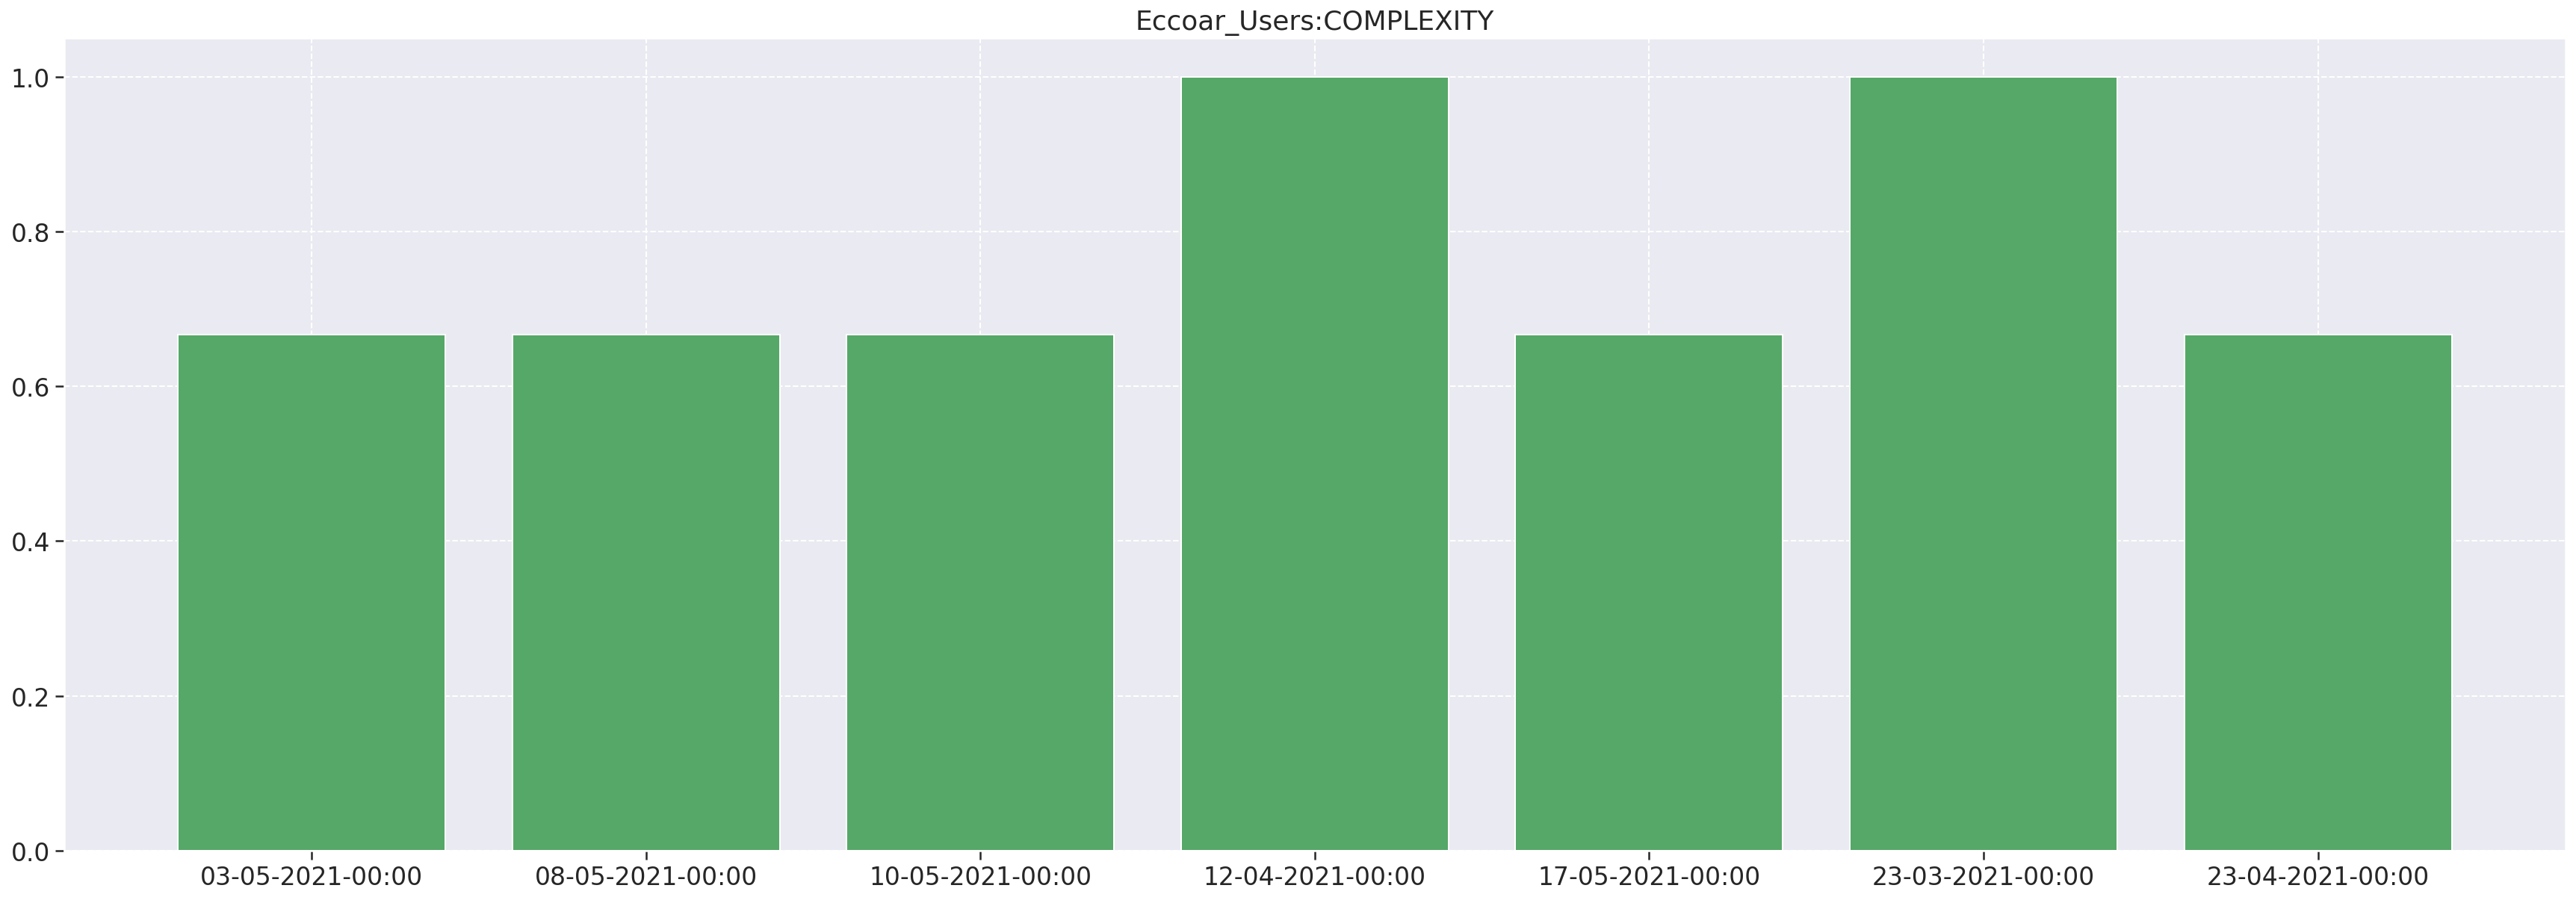

In [288]:
generate_histogram('m1', 'COMPLEXITY', 'g')

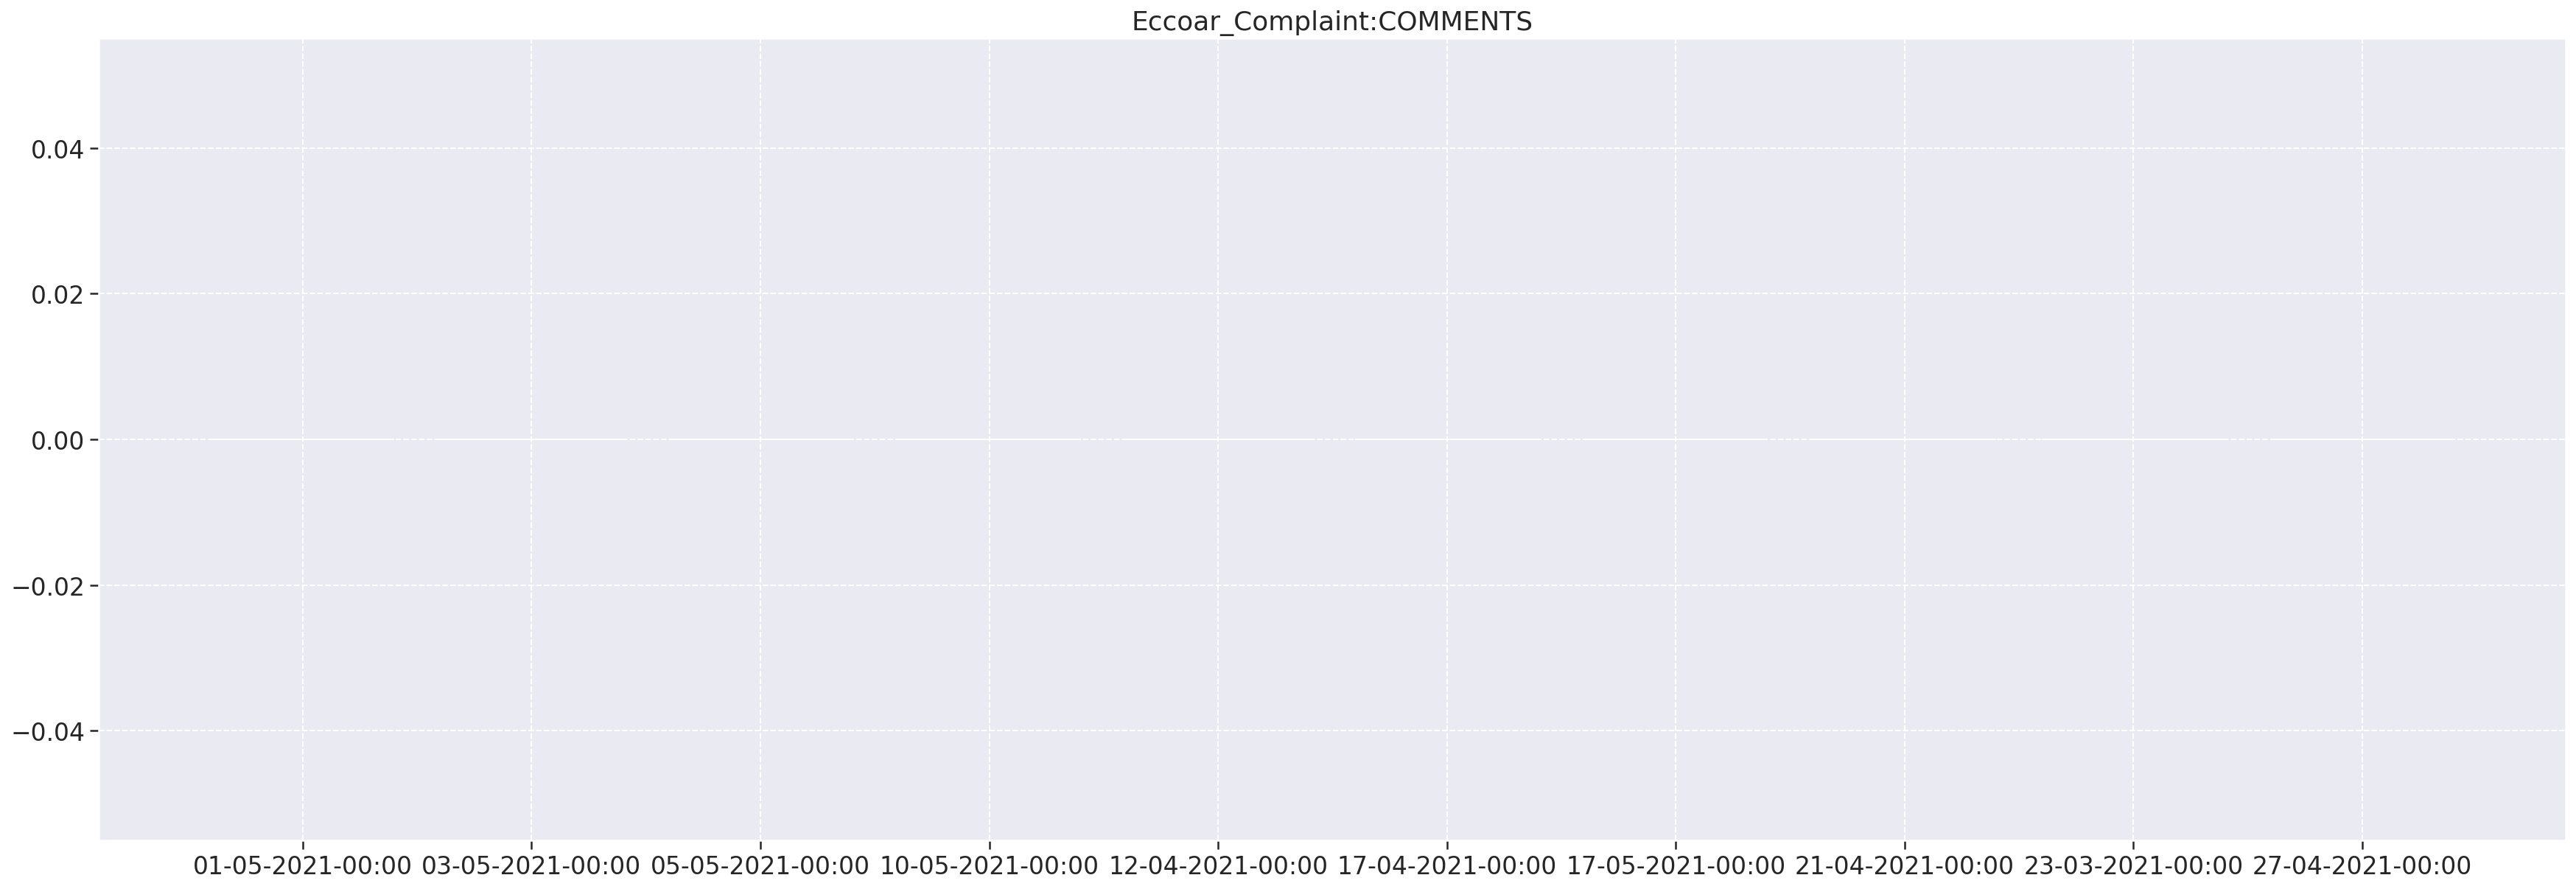

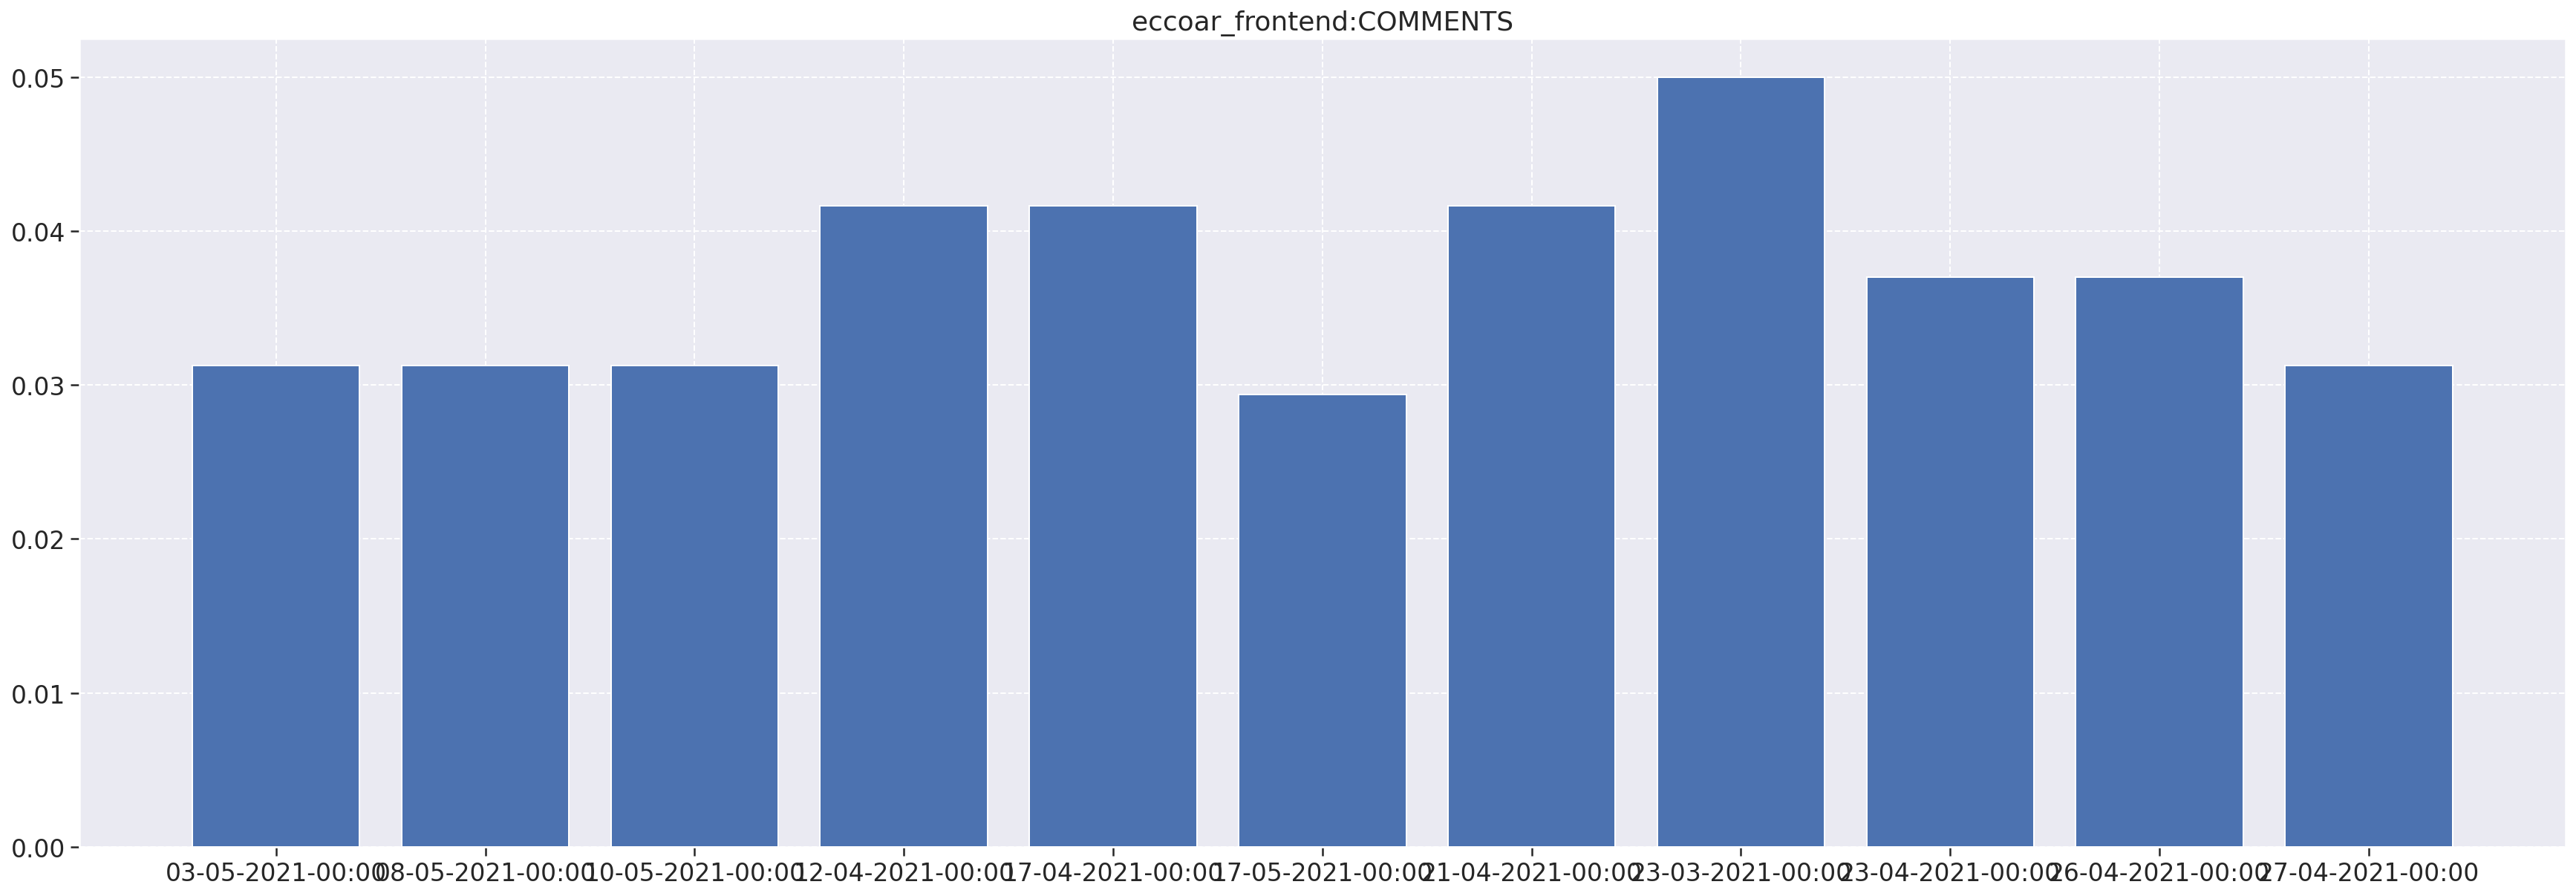

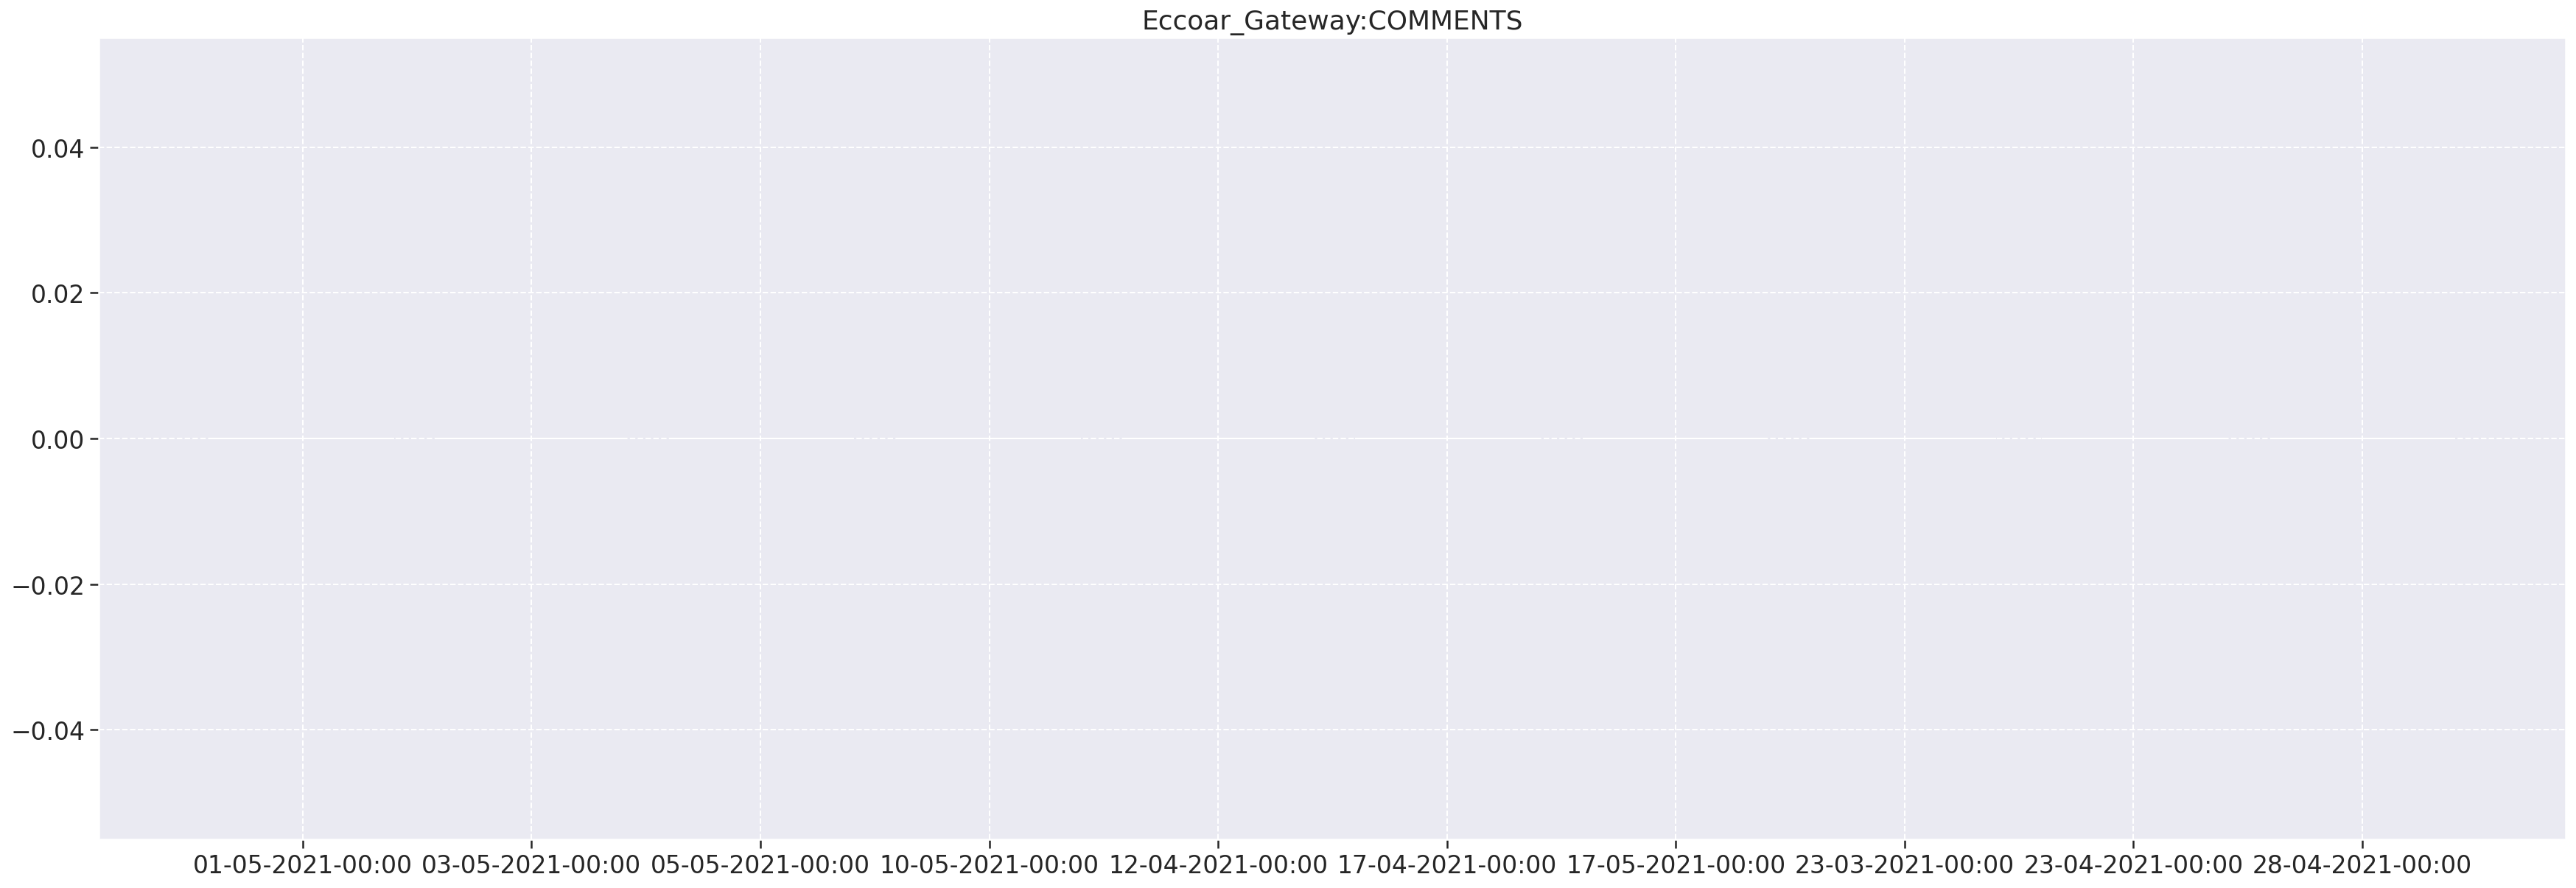

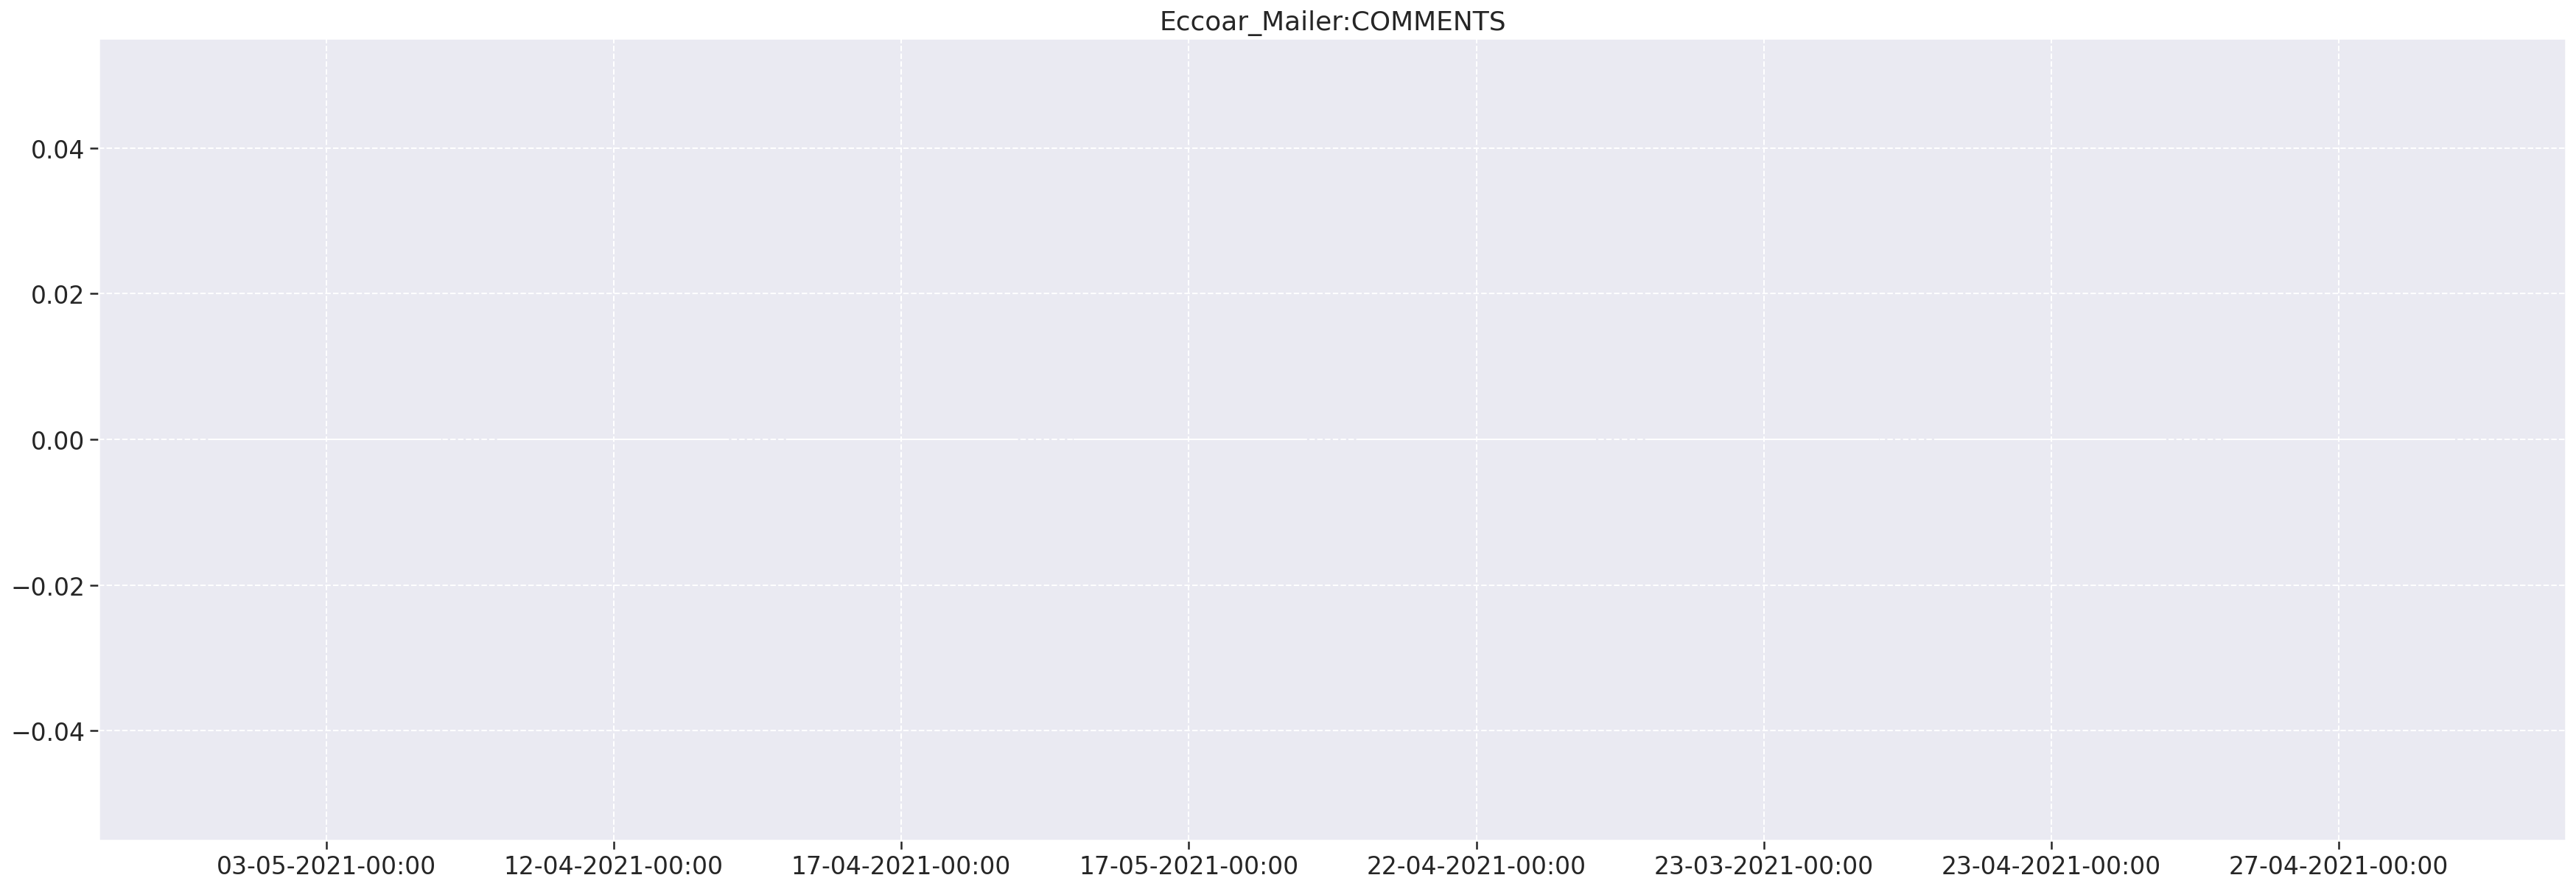

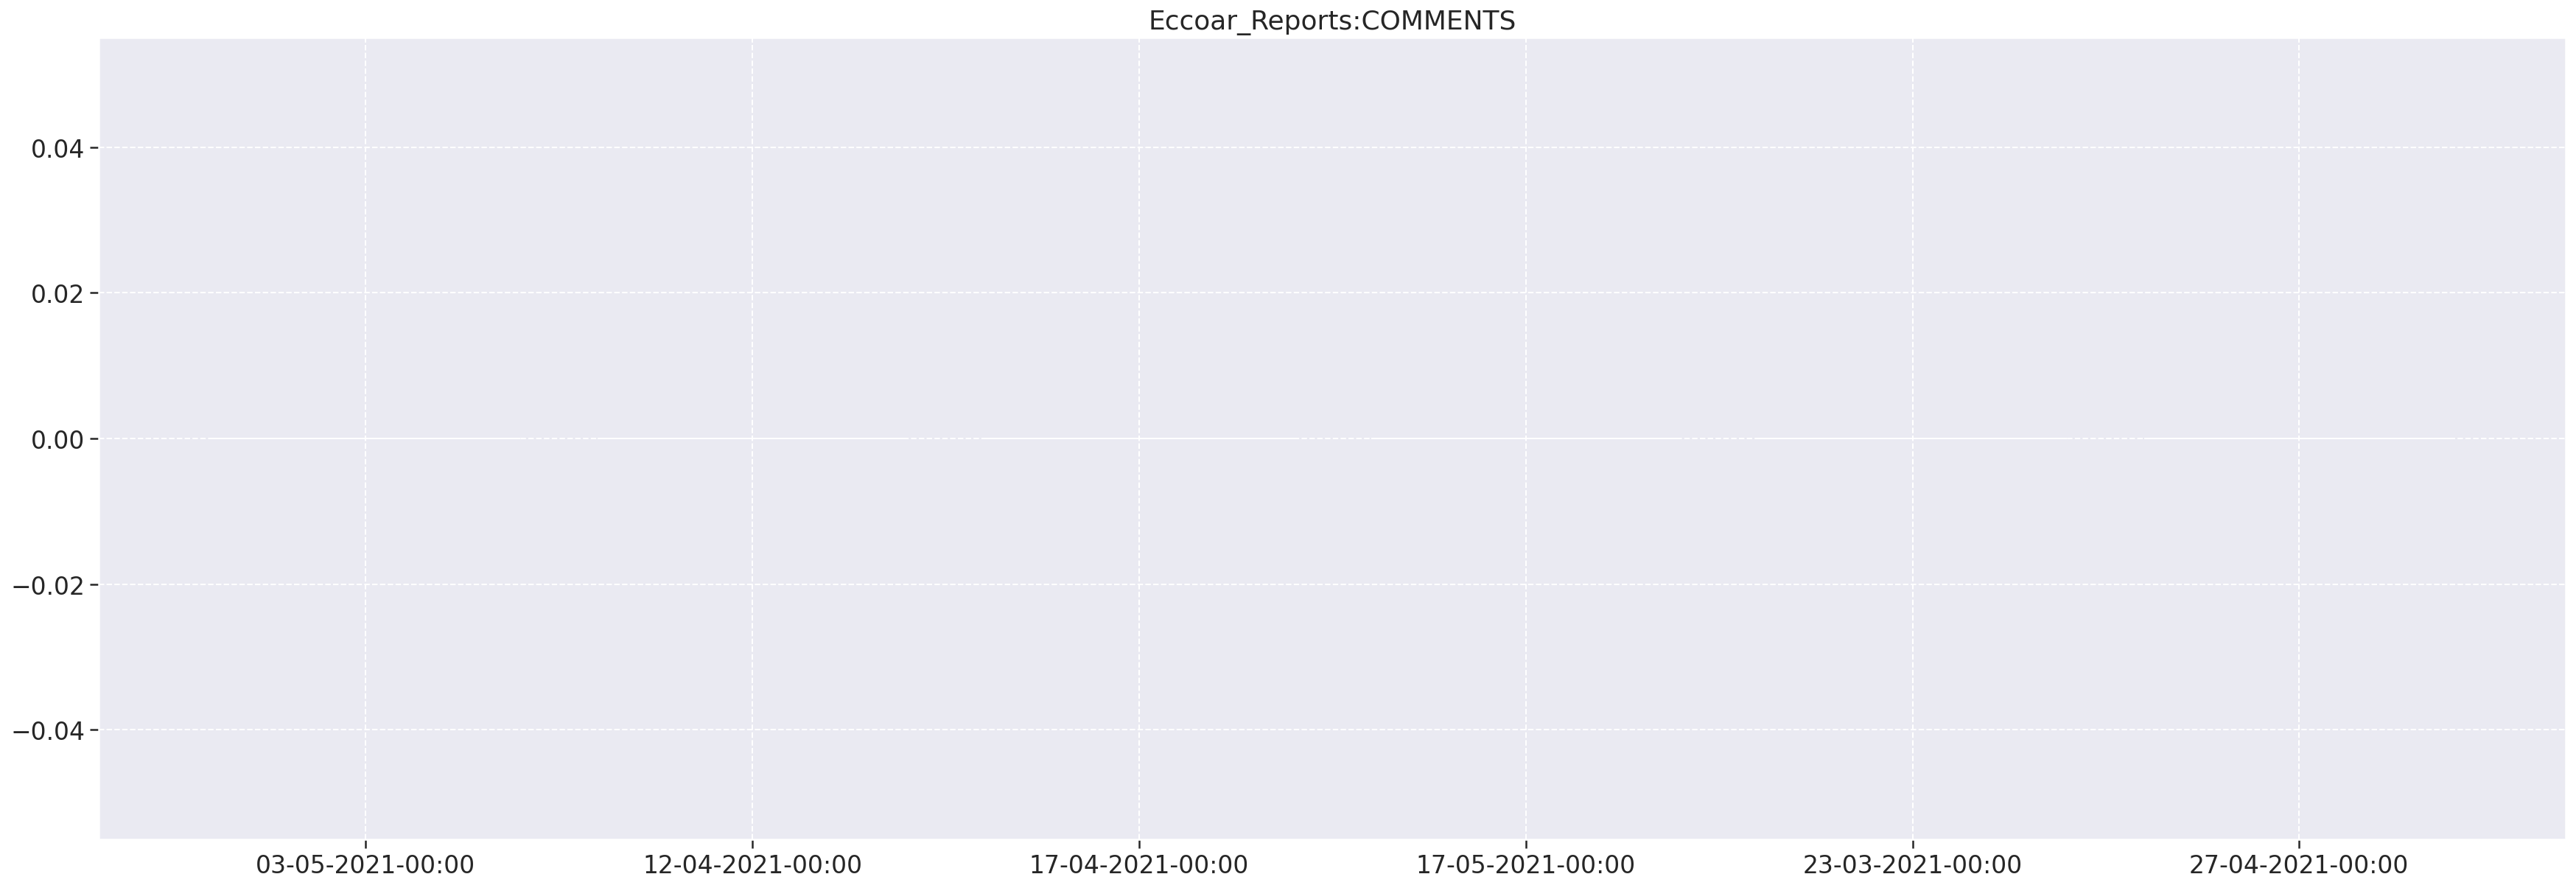

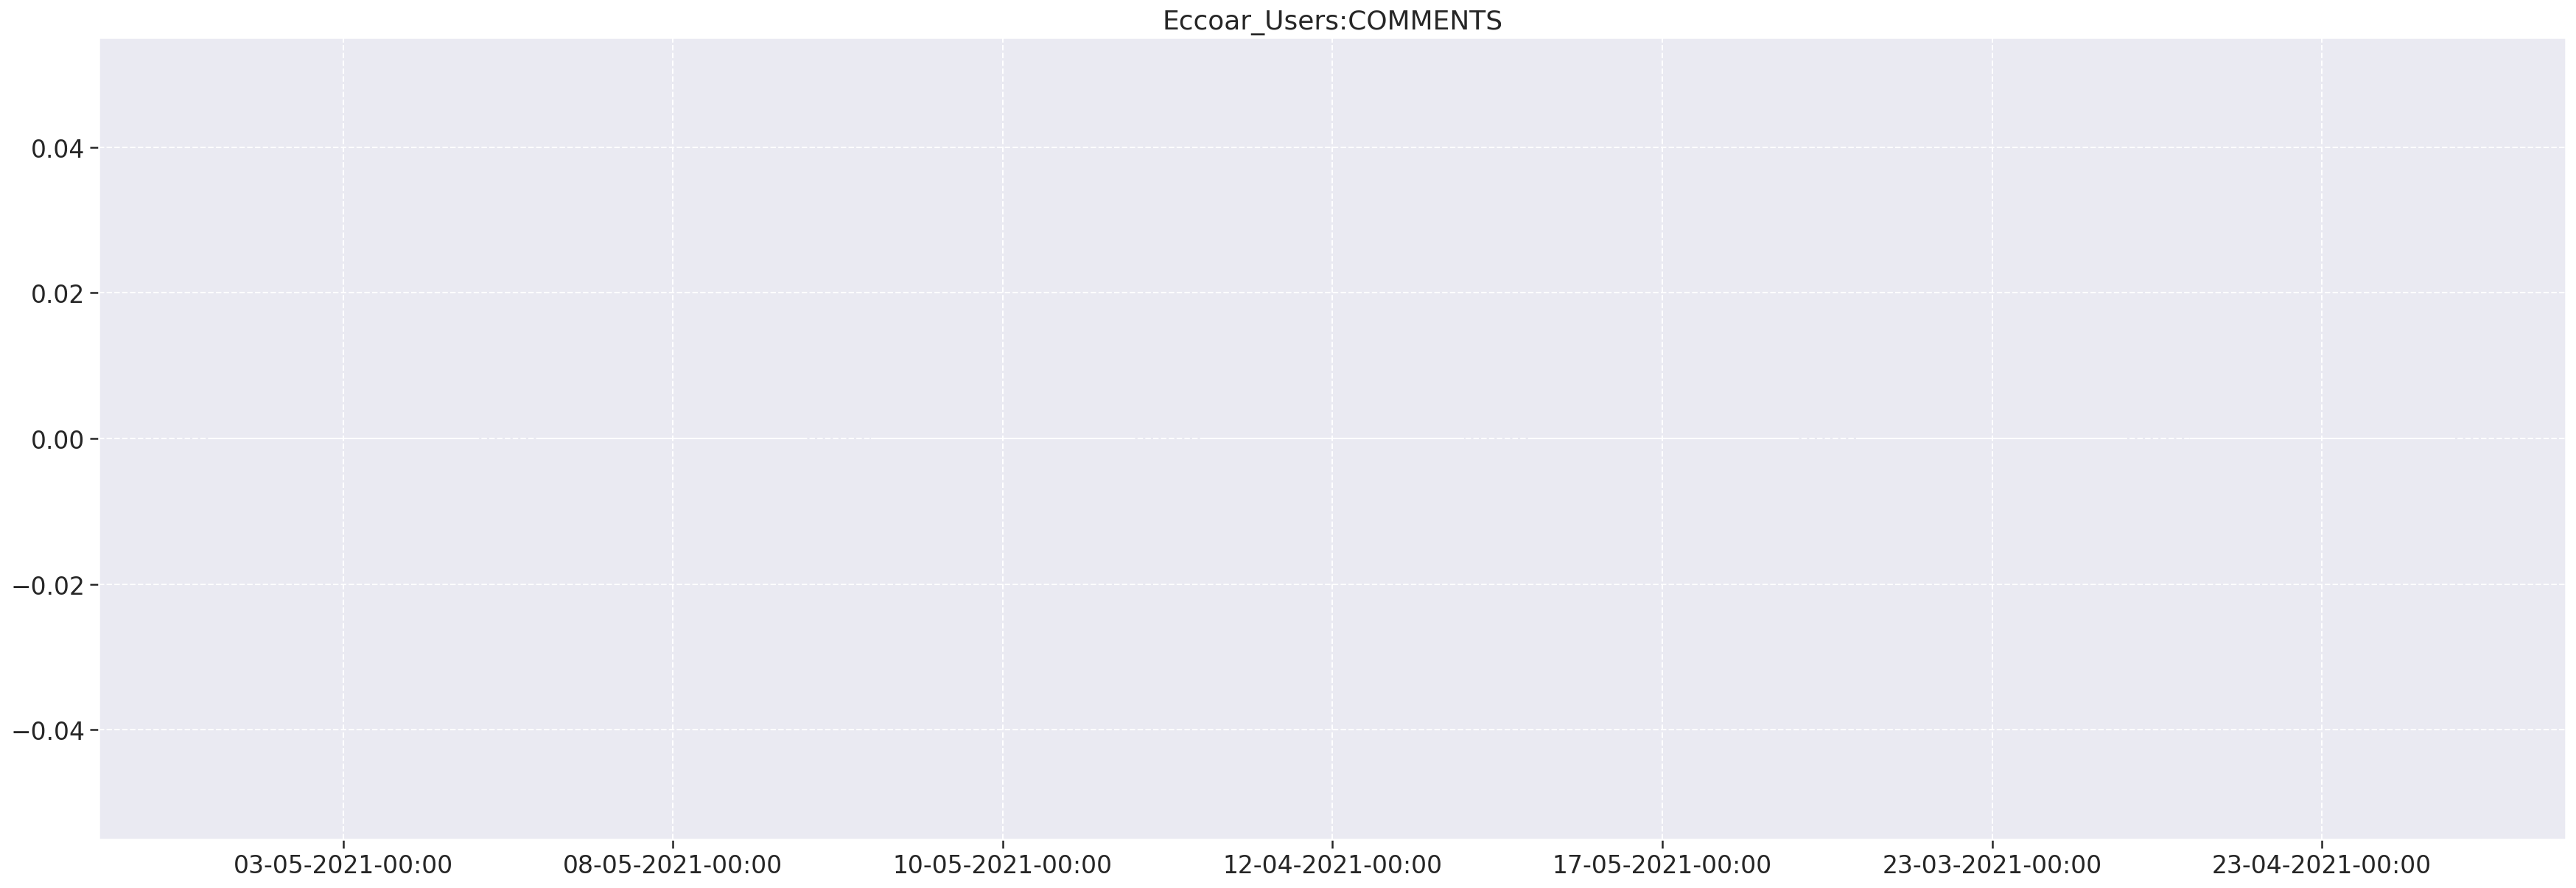

In [289]:
generate_histogram('m2', 'COMMENTS', 'b')

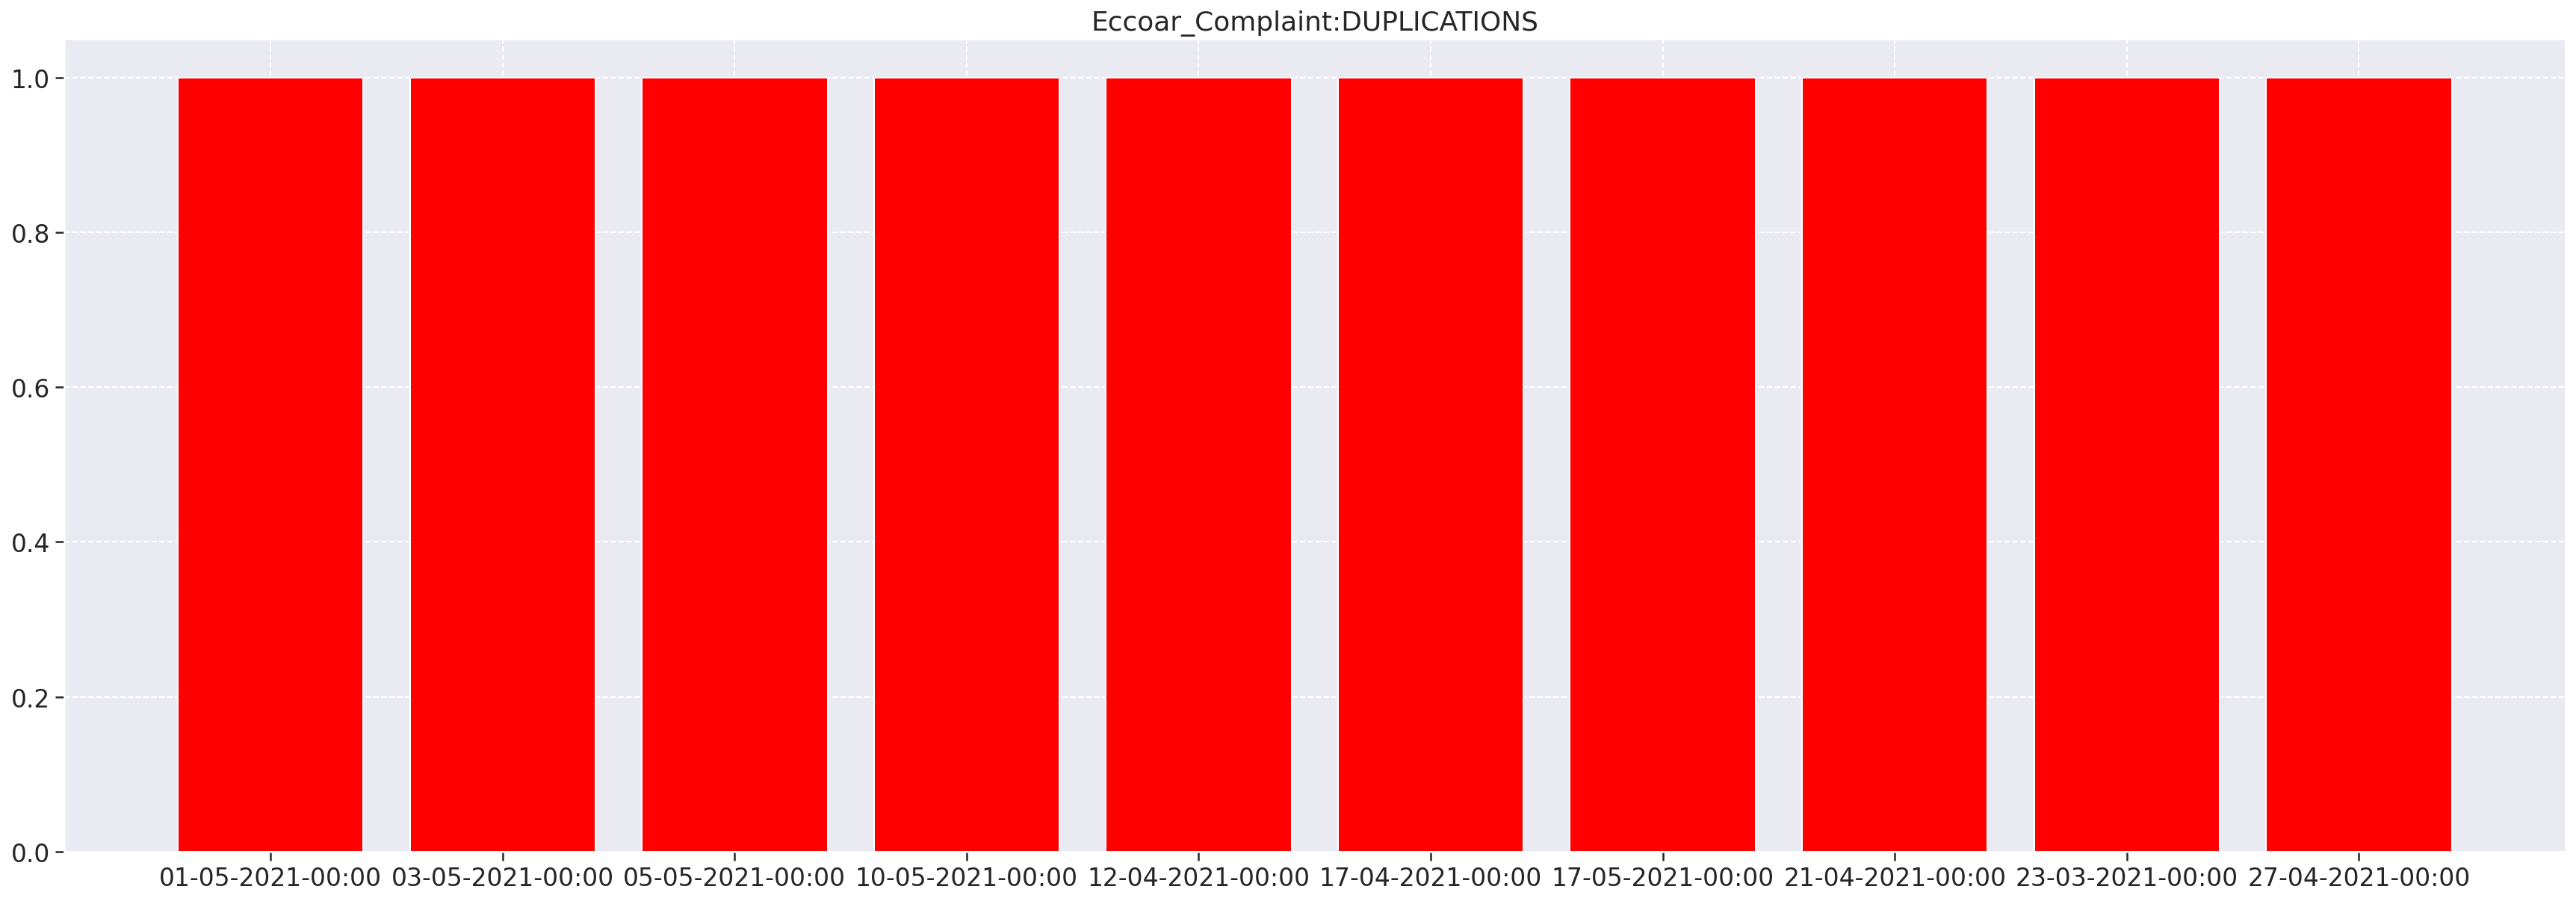

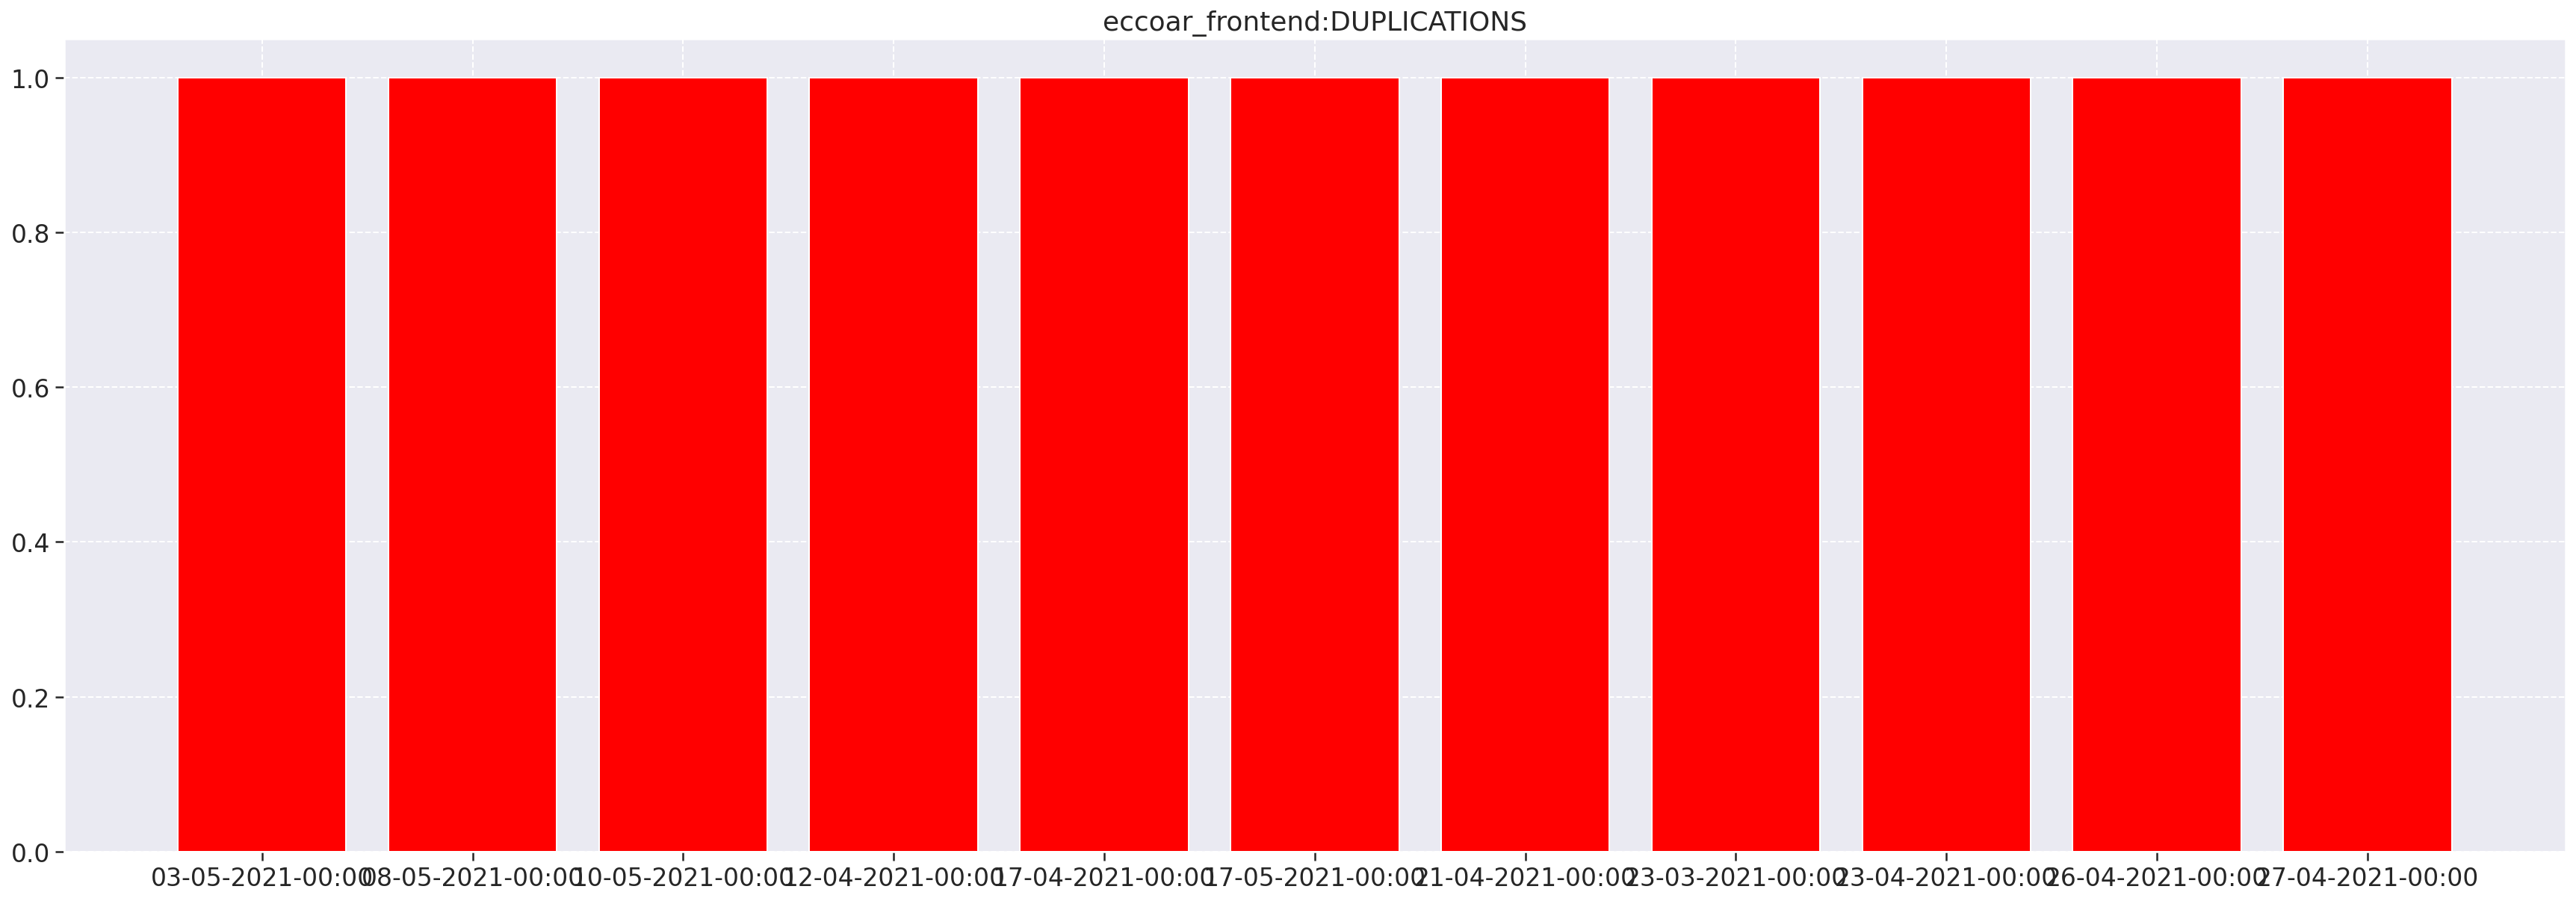

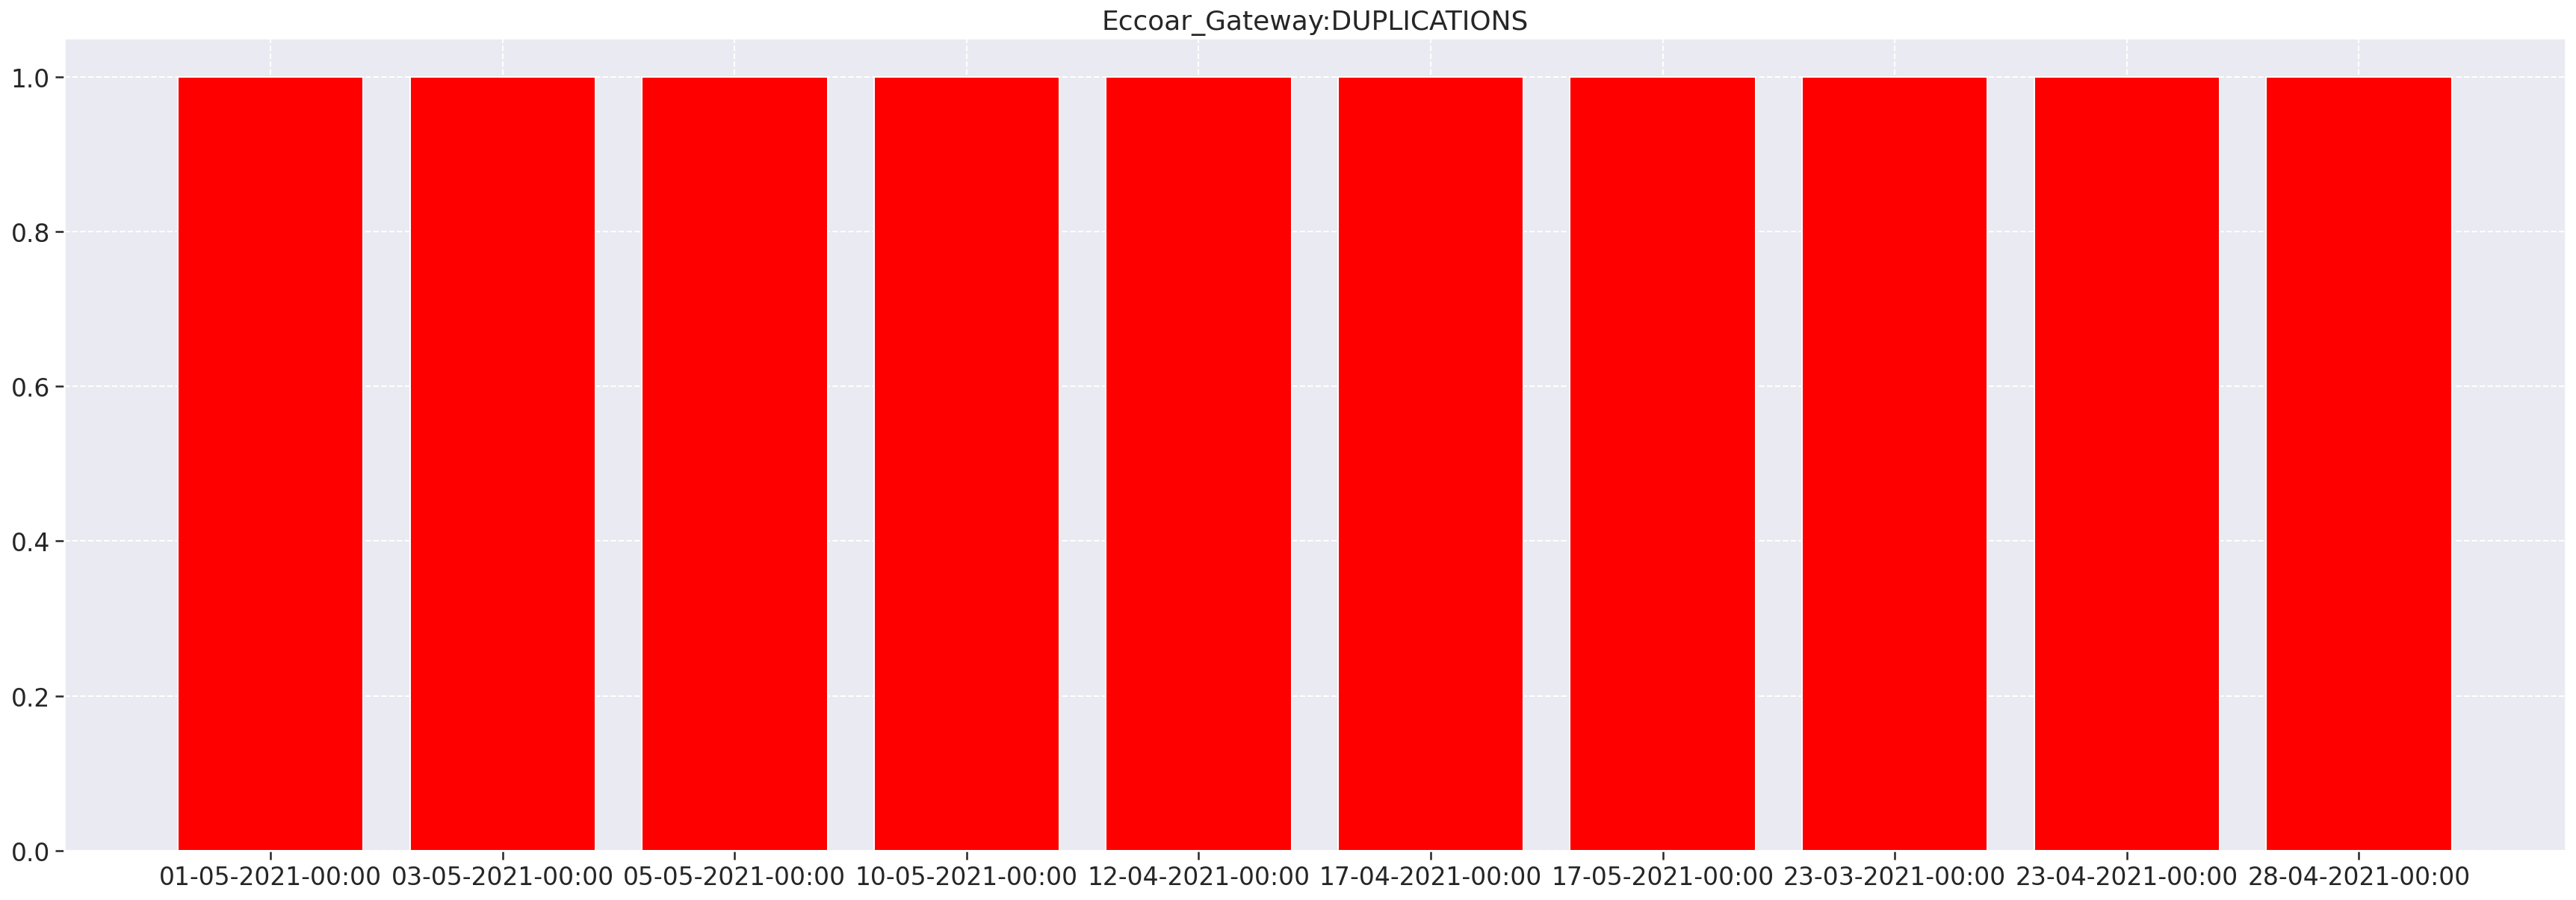

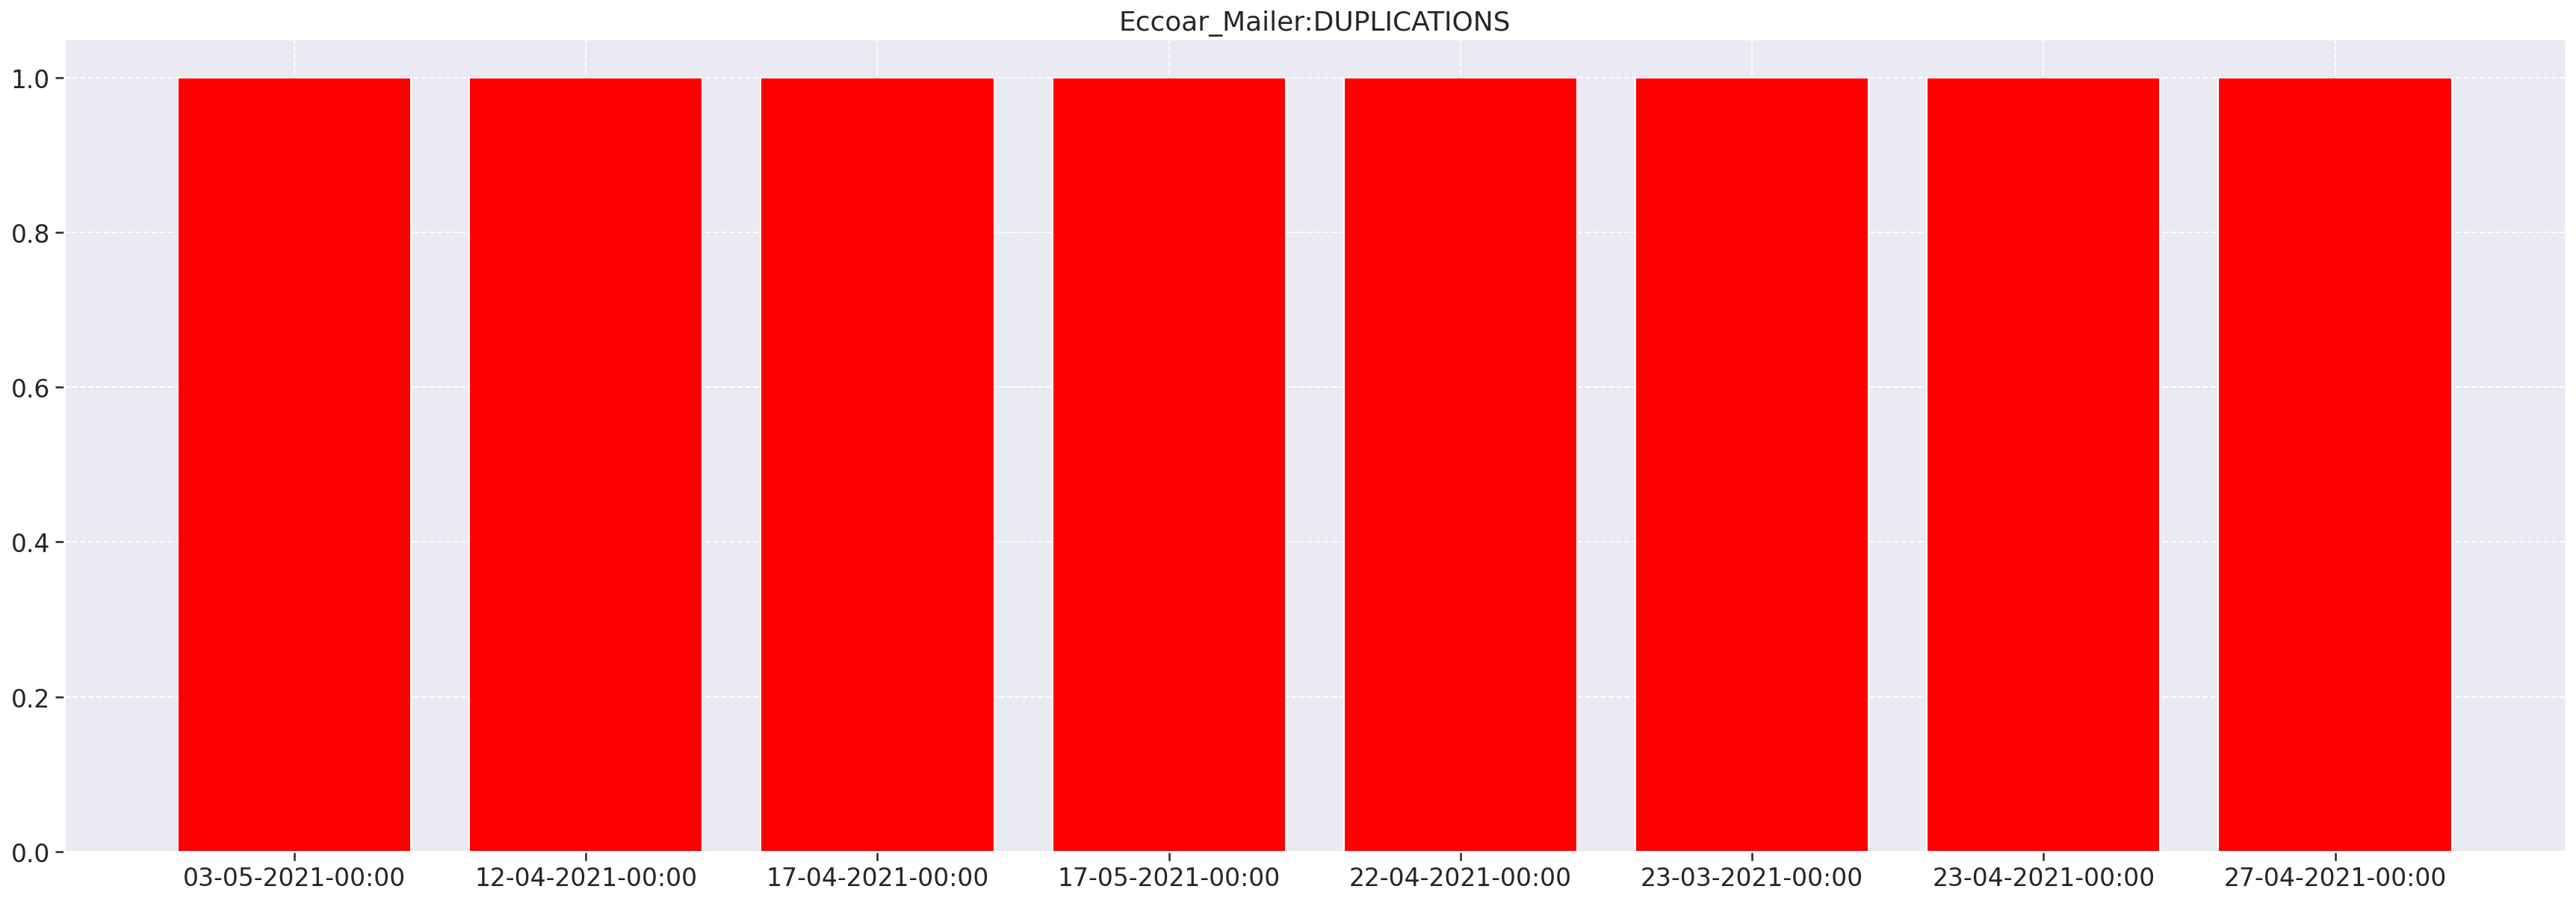

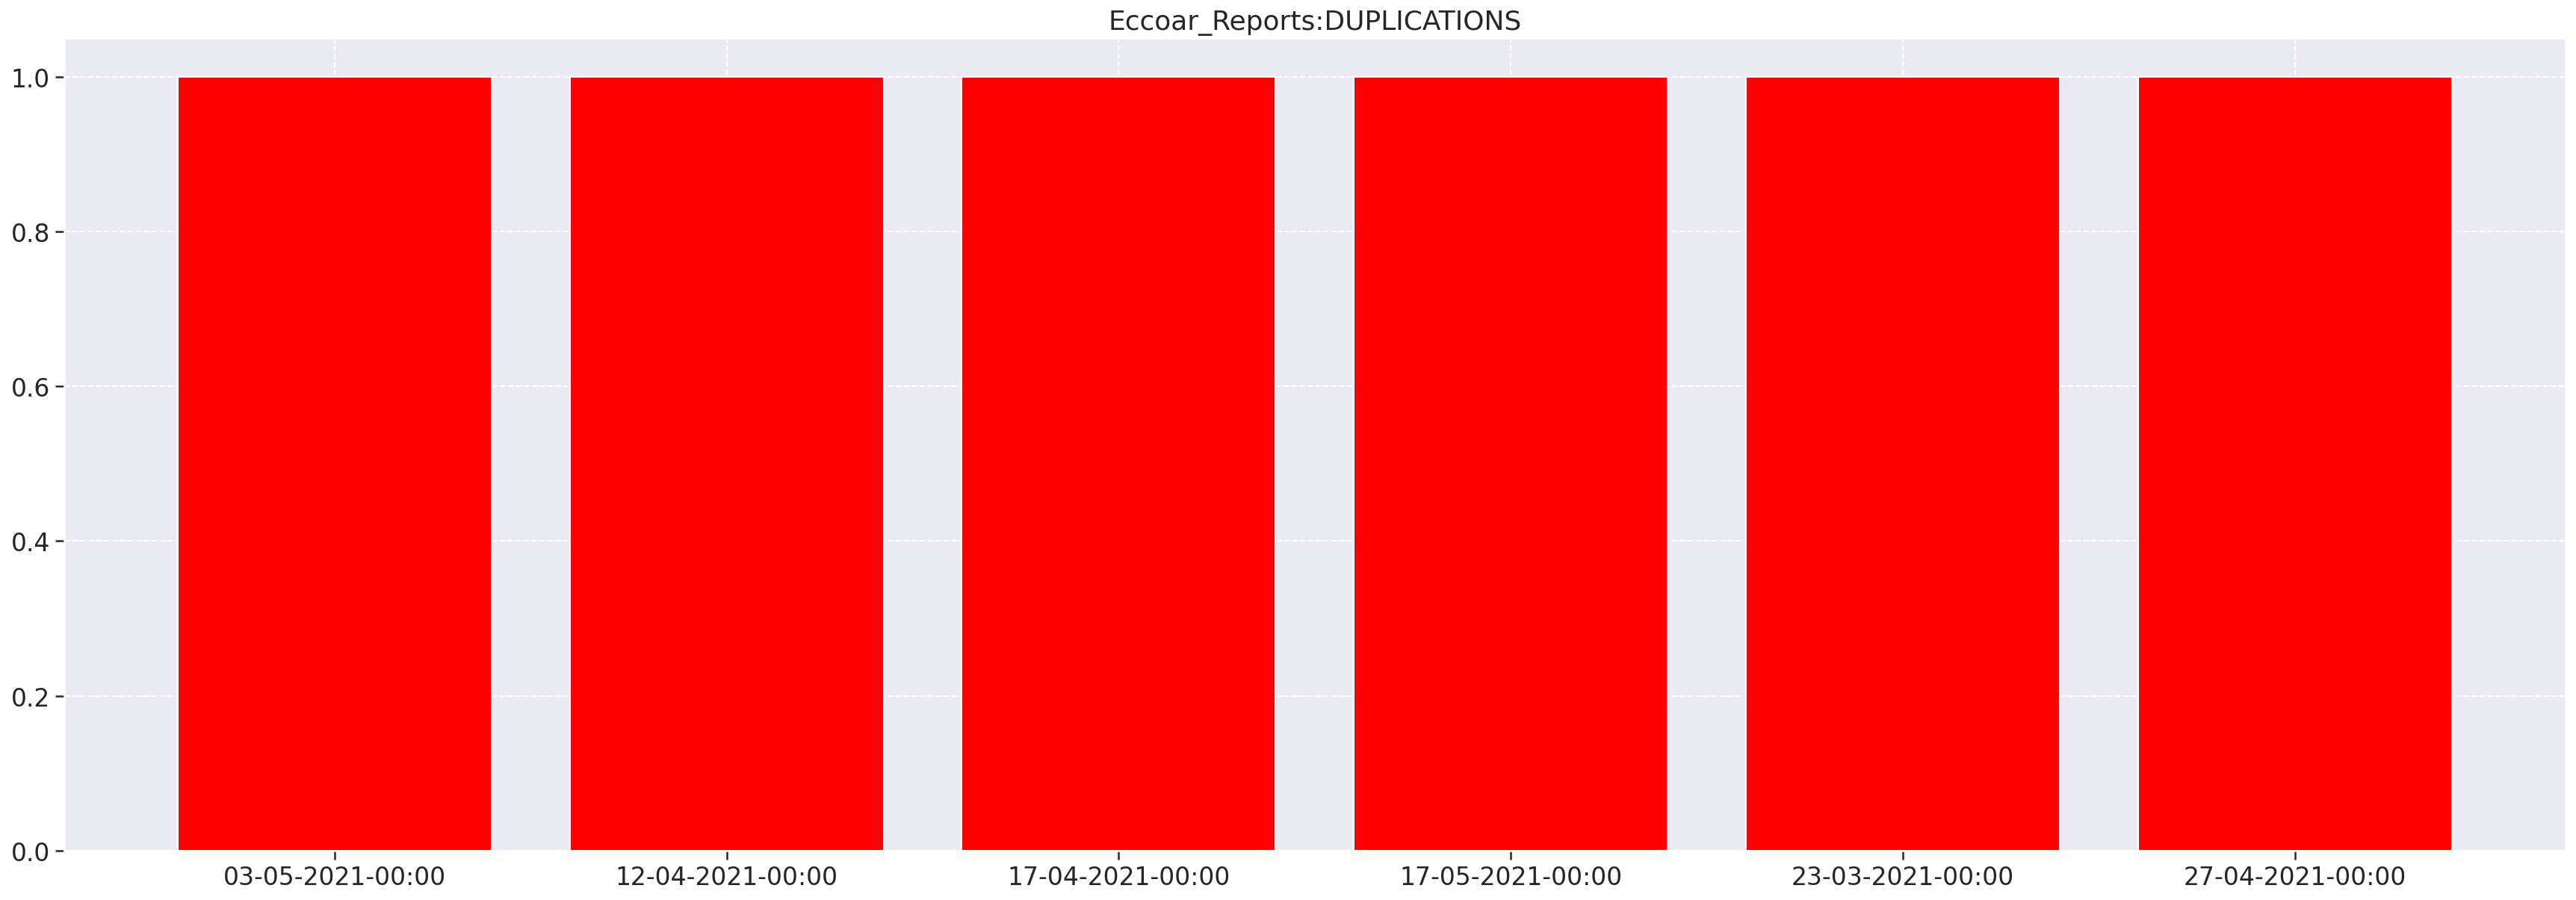

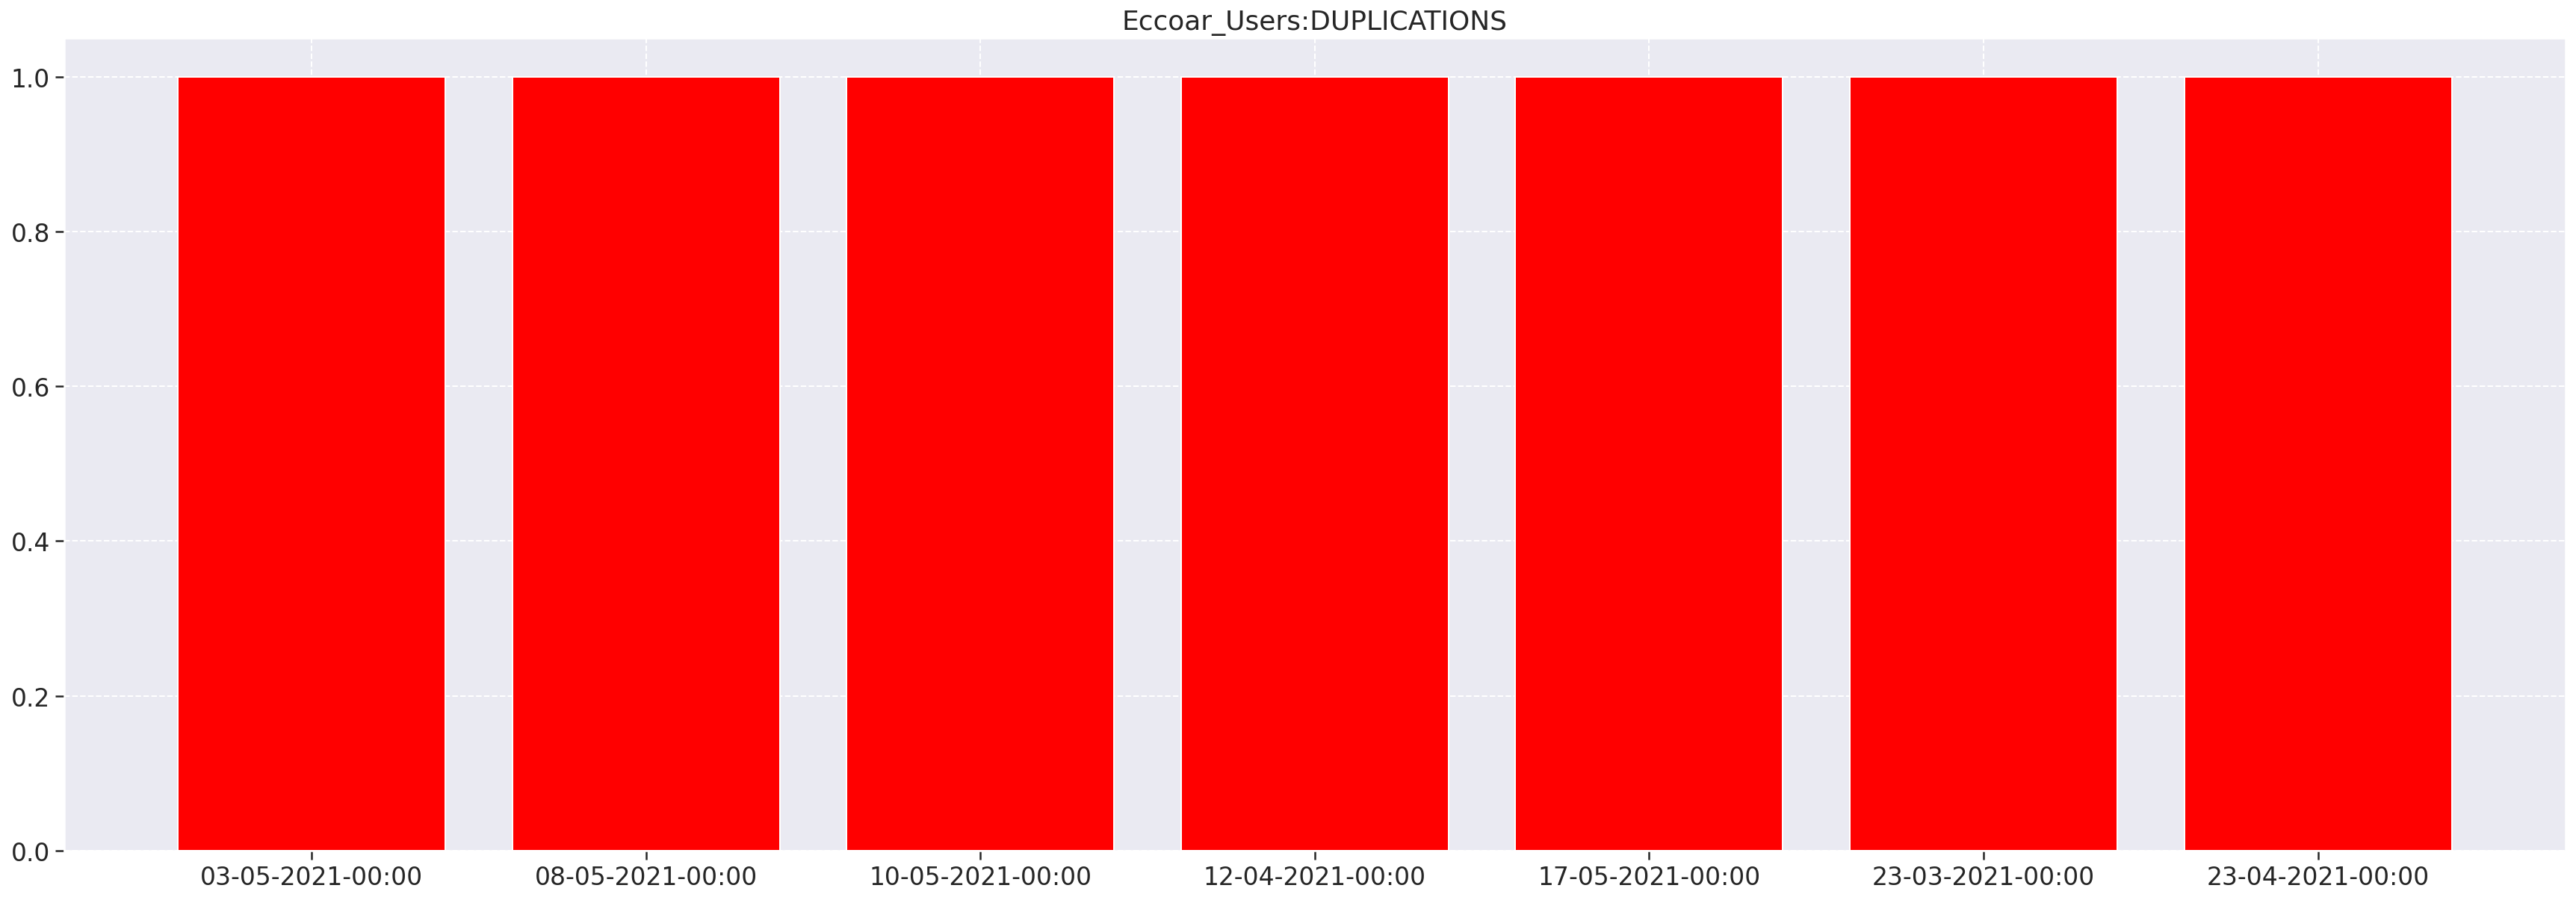

In [290]:
generate_histogram('m3', 'DUPLICATIONS', 'red')

# DataFrame

In [291]:
all_metrics_df = pd.DataFrame()

for repository, metrics_df in repository_metrics.items():
    all_metrics_df = pd.concat([all_metrics_df, metrics_df], ignore_index=True)

all_metrics_df['ac2'] = all_metrics_df['asc2'] * 1
all_metrics_df['totalAC2'] = all_metrics_df['asc2'] * 1

In [292]:
all_metrics_df

m1        m2   m3     m7     m9        repository           version  \
0   0.578947  0.000000  1.0  85.17  86.02  Eccoar_Complaint  01-05-2021-00:00   
1   0.578947  0.000000  1.0  85.17  86.02  Eccoar_Complaint  03-05-2021-00:00   
2   0.700000  0.000000  1.0  85.17  86.02  Eccoar_Complaint  05-05-2021-00:00   
3   0.700000  0.000000  1.0  85.17  86.02  Eccoar_Complaint  10-05-2021-00:00   
4   0.533333  0.000000  1.0  85.17  86.02  Eccoar_Complaint  12-04-2021-00:00   
5   0.533333  0.000000  1.0  85.17  86.02  Eccoar_Complaint  17-04-2021-00:00   
6   0.666667  0.000000  1.0  85.17  86.02  Eccoar_Complaint  17-05-2021-00:00   
7   0.588235  0.000000  1.0  85.17  86.02  Eccoar_Complaint  21-04-2021-00:00   
8   0.666667  0.000000  1.0  85.17  86.02  Eccoar_Complaint  23-03-2021-00:00   
9   0.555556  0.000000  1.0  85.17  86.02  Eccoar_Complaint  27-04-2021-00:00   
10  0.906250  0.031250  1.0  85.17  86.02   eccoar_frontend  03-05-2021-00:00   
11  0.906250  0.031250  1.0  85.17  86.02   eccoar_frontend  08-05-2021-00:00   
12  0.906250  0.031250  1.0  85.17  86.02   eccoar_frontend  10-05-2021-00:00   
13  0.875000  0.041667  1.0  85.17  86.02   eccoar_frontend  12-04-2021-00:00   
14  0.875000  0.041667  1.0  85.17  86.02   eccoar_frontend  17-04-2021-00:00   
15  0.911765  0.029412  1.0  85.17  86.02   eccoar_frontend  17-05-2021-00:00   
16  0.875000  0.041667  1.0  85.17  86.02   eccoar_frontend  21-04-2021-00:00   
17  0.850000  0.050000  1.0  85.17  86.02   eccoar_frontend  23-03-2021-00:00   
18  0.888889  0.037037  1.0  85.17  86.02   eccoar_frontend  23-04-2021-00:00   
19  0.888889  0.037037  1.0  85.17  86.02   eccoar_frontend  26-04-2021-00:00   
20  0.906250  0.031250  1.0  85.17  86.02   eccoar_frontend  27-04-2021-00:00   
21  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  01-05-2021-00:00   
22  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  03-05-2021-00:00   
23  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  05-05-2021-00:00   
24  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  10-05-2021-00:00   
25  1.000000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  12-04-2021-00:00   
26  1.000000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  17-04-2021-00:00   
27  0.909091  0.000000  1.0  85.17  86.02    Eccoar_Gateway  17-05-2021-00:00   
28  1.000000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  23-03-2021-00:00   
29  1.000000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  23-04-2021-00:00   
30  0.875000  0.000000  1.0  85.17  86.02    Eccoar_Gateway  28-04-2021-00:00   
31  0.600000  0.000000  1.0  85.17  86.02     Eccoar_Mailer  03-05-2021-00:00   
32  0.666667  0.000000  1.0  85.17  86.02     Eccoar_Mailer  12-04-2021-00:00   
33  0.666667  0.000000  1.0  85.17  86.02     Eccoar_Mailer  17-04-2021-00:00   
34  0.600000  0.000000  1.0  85.17  86.02     Eccoar_Mailer  17-05-2021-00:00   
35  0.666667  0.000000  1.0  85.17  86.02     Eccoar_Mailer  22-04-2021-00:00   
36  0.714286  0.000000  1.0  85.17  86.02     Eccoar_Mailer  23-03-2021-00:00   
37  0.666667  0.000000  1.0  85.17  86.02     Eccoar_Mailer  23-04-2021-00:00   
38  0.600000  0.000000  1.0  85.17  86.02     Eccoar_Mailer  27-04-2021-00:00   
39  0.700000  0.000000  1.0  85.17  86.02    Eccoar_Reports  03-05-2021-00:00   
40  0.777778  0.000000  1.0  85.17  86.02    Eccoar_Reports  12-04-2021-00:00   
41  0.777778  0.000000  1.0  85.17  86.02    Eccoar_Reports  17-04-2021-00:00   
42  0.700000  0.000000  1.0  85.17  86.02    Eccoar_Reports  17-05-2021-00:00   
43  1.000000  0.000000  1.0  85.17  86.02    Eccoar_Reports  23-03-2021-00:00   
44  0.700000  0.000000  1.0  85.17  86.02    Eccoar_Reports  27-04-2021-00:00   
45  0.666667  0.000000  1.0  85.17  86.02      Eccoar_Users  03-05-2021-00:00   
46  0.666667  0.000000  1.0  85.17  86.02      Eccoar_Users  08-05-2021-00:00   
47  0.666667  0.000000  1.0  85.17  86.02      Eccoar_Users  10-05-2021-00:00   
48  1.000000  0.000000  1.0  85.17  86.02

In [293]:
metrics_df.to_excel('data/metrics_df.xlsx', index = False)

In [294]:
corrMatrix = pd.DataFrame()
corrMatrix = all_metrics_df.corr()

In [295]:
corrMatrix

m1        m2  m3  m7  m9     ncloc  asc2      asc1  ac2  \
m1        1.000000  0.387957 NaN NaN NaN  0.257513   NaN  0.995720  NaN   
m2        0.387957  1.000000 NaN NaN NaN  0.799148   NaN  0.471479  NaN   
m3             NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   
m7             NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   
m9             NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   
ncloc     0.257513  0.799148 NaN NaN NaN  1.000000   NaN  0.326527  NaN   
asc2           NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   
asc1      0.995720  0.471479 NaN NaN NaN  0.326527   NaN  1.000000  NaN   
ac2            NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   
totalAC2       NaN       NaN NaN NaN NaN       NaN   NaN       NaN  NaN   

          totalAC2  
m1             NaN  
m2             NaN  
m3             NaN  
m7             NaN  
m9             NaN  
ncloc          NaN  
asc2           NaN  
asc1           NaN  
ac2            NaN  
totalAC2       NaN